<a href="https://colab.research.google.com/github/tluistorres/Cursos/blob/main/curso_modelo_atraso_voo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **<font color=green>Aula 01 - Explorando os dados</font>**

In [1]:
import pandas as pd
import numpy as np
import sklearn
import seaborn as sns
import yellowbrick

print(f'Versão do pandas: {pd.__version__}')
print(f'Versão do numpy: {np.__version__}')
print(f'Versão do scikit-learn (sklearn): {sklearn.__version__}')
print(f'Versão do seaborn: {sns.__version__}')
print(f'Versão do yellowbrick: {yellowbrick.__version__}')

Versão do pandas: 2.2.2
Versão do numpy: 2.0.2
Versão do scikit-learn (sklearn): 1.6.1
Versão do seaborn: 0.13.2
Versão do yellowbrick: 1.5


### Entendendo o conjunto de dados

Neste curso, vamos aprender como construir um modelo de regressão para prever os atrasos em voos. Para isso, vamos utilizar as bibliotecas Pandas, NumPy, scikit-learn, Seaborn e Yellowbrick nas seguintes versões:

| *Biblioteca* | *Versão* |
| -------------- | ----------- |
| pandas | 1.5.3 |
| numpy | 1.23.5 |
| scikit-learn (sklearn) | 1.2.2 |
| seaborn | 0.12.2 |
| yellowbrick | 1.5 |



Neste [arquivo CSV](https://), você encontra o material com os dados que vamos trabalhar durante o curso.

## Ambiente de análise

Vamos usar uma ferramenta do Google chamada Colaboratory que é um Jupyter notebook e não requer configuração para ser utilizado. Para usar o Google Colaboratory é necessário ter uma conta Gmail, pois todo notebook ficará armazenado no Google Drive.

Para mais informações sobre esse ambiente, você pode assistir ao vídeo “Trabalhando com arquivos no Google Colab”:

Podemos solucionar, ou mesmo otimizar, essa etapa de atraso de voos conhecendo-os. Sendo assim, podemos construir um modelo de machine learning que seja capaz de prever esse atraso no voo, e a saída desse modelo de machine learning poderá ser utilizada como entrada para outros processos de otimização para melhorar ainda mais a operação desse aeroporto.

Como vamos inserir esses dados em um modelo de machine learning e ele precisa de dados, é ideal conhecermos esses dados. Então, nesta aula, vamos justamente conhecer os dados com os quais trabalhamos!

## Entendendo o conjunto de dados

## Importação dos dados


Começaremos no Google Colab. A primeira coisa que vamos fazer será renomear o notebook como modelo-atraso-voo.ipynb para identificá-lo melhor. Em seguida, vamos importar os dados.

Clicaremos no quarto ícone na aba mais à esquerda e depois em "Fazer upload para o armazenamento da sessão", correspondente ao primeiro ícone na aba "Arquivos". Vamos procurar o conjunto de dados flights, conjunto de dados de voo.

Após clicar em "Abrir", surgirá um aviso de que ele vai ser salvo em outro lugar. Podemos clicar em "OK". Feito isso, aguardamos os dados serem carregados para o ambiente do Google Colab.

## Leitura dos dados

Uma vez carregado o conjunto de dados, precisamos ler esses dados. Para isso, é necessária uma biblioteca muito interessante e muito utilizada em Data Science: a Pandas. Como fazemos essa leitura?

Primeiro, devemos importar a biblioteca com o seguinte comando:

In [3]:
import pandas as pd

Após importar a biblioteca, vamos executar a célula com "Shift + Enter" para criar outra célula abaixo. Agora temos que ler os dados. Esses dados estão em um formato chamado CSV. Como ler um CSV no Pandas?

Para isso, utilizamos o comando pd.read_csv(), para o qual passamos o caminho do arquivo. O arquivo está solto na pasta, então vamos simplesmente copiar o nome do arquivo e colar entre aspas simples e entre parênteses.

## Atribuição a uma variável

Agora vamos atribuir o que escrevemos na célula anterior a uma variável específica chamada dados. Para conferir que deu certo, vamos visualizar as 5 primeiras linhas usando o comando head().

In [2]:
dados = pd.read_csv('flights.csv')
dados.head()

,flight_id,airline,aircraft_type,schengen,origin,arrival_time,departure_time,day,year,is_holiday,delay
0,26,MM,Airbus A320,non-schengen,TCY,8.885071,10.885071,0,2010,False,70.205981
1,10,YE,Airbus A320,non-schengen,TCY,8.939996,11.939996,0,2010,False,38.484609
2,3,BZ,Embraer E175,schengen,TZF,18.635384,22.635384,0,2010,False,2.388305
3,28,BZ,Airbus A330,non-schengen,EMM,15.967963,17.967963,0,2010,False,19.138491
4,15,BZ,Airbus A330,non-schengen,FJB,16.571894,19.571894,0,2010,False,15.016271


Vamos executar novamente com "Shift + Enter". Teremos o mesmo conjunto de dados apresentado acima, e já percebemos que conseguimos tirar algumas informações. Temos uma coluna chamada flight_id (identificador do voo); a airline (companhia aérea); o tipo da aeronave, que é aircraft_type; schengen, que indica se o voo é do espaço Schengen ou não.

    O termo "Schengen" está relacionado com o Acordo de Schengen, um acordo europeu que tem implicações em termos de logística aeroportuária, mas não está diretamente relacionado com as operações aeroportuárias em si.

O aeroporto de origem (origin) está em siglas. Por exemplo: o aeroporto de Congonhas recebe a sigla CGH. Temos o arrival_time (hora de chegada), departure_time (hora de saída), o dia (day), e o ano que é correspondente a esse dia (year). Por exemplo: temos o dia 0 em 2010, então é 1º de janeiro de 2010.

Por fim, temos a coluna is_holiday, se é um feriado ou não, e a coluna delay, o atraso em minutos.

Importante notar que a hora em arrival_time está em formato decimal. Por exemplo: como seria 8.88 em horas? Poderíamos fazer um cálculo simples. Seria 0.88 multiplicado por 60 para saber a quantidade em minutos. Teríamos, basicamente, 8 horas e 52 minutos.

O mesmo processo se repete para departure_time. Multiplicamos os números após a vírgula por 60 para saber a quantidade de minutos. Teremos, assim, o tempo tanto em horas quanto em minutos.

## Visualizando as últimas linhas

Já conseguimos visualizar as linhas e sabemos o que é cada uma das colunas. O que podemos fazer agora é visualizar as últimas linhas. Verificar, por exemplo, quantas amostras temos no nosso conjunto de dados. Para isso, podemos usar o comando dados.tail(). Assim, visualizamos as últimas 5 amostras.

dados.tail()

In [ ]:
dados.tail()

,flight_id,airline,aircraft_type,schengen,origin,arrival_time,departure_time,day,year,is_holiday,delay
71170,3,BZ,Embraer E175,schengen,TZF,18.635384,22.635384,364,2022,True,25.677277
71171,17,BZ,Airbus A330,non-schengen,CNU,16.718722,21.718722,364,2022,True,52.624348
71172,7,MM,Boeing 787,schengen,TZF,8.564949,13.564949,364,2022,True,56.167080
71173,5,BZ,Airbus A320,schengen,ZQO,9.344097,12.344097,364,2022,True,56.758844
71174,29,BZ,Boeing 737,schengen,ZQO,8.591208,11.591208,364,2022,True,41.401648


Percebemos que vai até a linha 71.174. Como começa em 0, consequentemente, temos 71.175 amostras no nosso conjunto de dados. Outra coisa que podemos fazer é visualizar a quantidade de colunas.

## Visualizando a quantidade de colunas

Para evitar contar manualmente, utilizamos o método shape, então digitamos dados.shape em uma nova célula.

In [ ]:
dados.shape

(71175, 11)

Como retorno, temos exatamente o que acabamos de executar: 71.175 linhas e 11 colunas ao todo. Já conseguimos ter essas duas informações, mas não conseguimos ter informações e estatísticas mais descritivas. Por exemplo: qual o valor médio das colunas numéricas? Qual o valor máximo? Qual a mediana? Não temos essas informações só com o que executamos.

Para obter essas informações, vamos executar o método describe(), ou seja, dados.describe() em uma nova célula.

In [ ]:
dados.describe()

,flight_id,arrival_time,departure_time,day,year,delay
count,71175.000000,71175.000000,71175.000000,71175.000000,71175.000000,71175.000000
mean,15.465135,13.283159,16.480222,182.000000,2016.000000,12.548378
std,8.649646,4.023380,4.143705,105.366769,3.741684,23.125349
min,1.000000,7.065594,10.065594,0.000000,2010.000000,-41.028033
25%,8.000000,8.939996,12.668655,91.000000,2013.000000,-4.412876
50%,15.000000,14.258911,16.376052,182.000000,2016.000000,9.740454
75%,23.000000,16.909690,20.041281,273.000000,2019.000000,27.650853
max,30.000000,19.341235,23.341235,364.000000,2022.000000,125.632352


Percebemos que não há 11 colunas, justamente porque estão retiradas as colunas categóricas. Temos flight_id, arrival_time, departure_time, day, year e delay. Não faz tanto sentido analisar a coluna flight_id, pois é um identificador. Então, vamos partir para o arrival_time.

Em arrival_time, temos: a média (mean); o desvio padrão (std); o valor mínimo (min); o primeiro quartil (25%); a mediana (50%), que é o valor que está no meio do conjunto de dados, nesse caso, 14.25; o terceiro quartil (75%), que é 16.9; e o valor máximo (max) que temos de arrival_time, ou seja, o maior valor que um avião chegou nesse aeroporto foi às 19 horas e 34 minutos. Multiplicamos por 60 para saber a quantidade exata de minutos.

Em compensação, o valor máximo do departure_time, isto é, a hora de saída, é 23.34. Multiplicamos novamente por 60 para saber a quantidade exata de minutos. Temos o valor médio 16 para o departure_time e o valor médio 13 para o arrival_time, por exemplo, e temos essas mesmas estatísticas para as outras colunas.

## Analisando a coluna delay

Como nossa variável alvo, isto é, o problema de negócio com os dados que tentamos resolver é relacionado ao atraso, precisamos analisar a coluna delay. A média do atraso é 12 minutos, o desvio padrão é 23, o valor mínimo é -41, ou seja, houve voos que adiantaram, e o valor máximo é de 125 minutos, ou seja, houve aviões que atrasaram até 2 horas e 5 minutos, o que é bastante tempo. Como fazer para visualizar estatísticas descritivas para variáveis categóricas?

Podemos executar o mesmo método. Vamos copiar dados.describe(), colar em uma nova célula abaixo, e adicionar o parâmetro include que será igual a 'O'.

In [ ]:
dados.describe(include='O')

,airline,aircraft_type,schengen,origin
count,71175,71175,71175,71175
unique,3,6,2,10
top,BZ,Airbus A320,schengen,TZF
freq,47598,30778,42569,14162


Primeiramente, temos a coluna airline, que é a companhia aérea. São três companhias aéreas diferentes, e a que mais aparece (top) é a BZ, com a frequência (freq) de 47598. Podemos replicar essas análises para as outras três colunas. Assim, conseguimos ter uma análise mais descritiva de nossas colunas categóricas.

## Extraindo mais informações

Já conseguimos extrair bastante informação com os métodos que executamos, mas há outro método que fornece informações bastante relevantes: o método info(). Vamos executar em uma nova célula dados.info().

In [ ]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71175 entries, 0 to 71174
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   flight_id       71175 non-null  int64  
 1   airline         71175 non-null  object 
 2   aircraft_type   71175 non-null  object 
 3   schengen        71175 non-null  object 
 4   origin          71175 non-null  object 
 5   arrival_time    71175 non-null  float64
 6   departure_time  71175 non-null  float64
 7   day             71175 non-null  int64  
 8   year            71175 non-null  int64  
 9   is_holiday      71175 non-null  bool   
 10  delay           71175 non-null  float64
dtypes: bool(1), float64(3), int64(3), object(4)
memory usage: 5.5+ MB


Temos o RangeIndex, que indica a quantidade de linhas do conjunto de dados, que varia de 0 a 71.174; bem como o número de colunas, totalizando 11. Nesse caso, temos duas informações muito relevantes: as colunas Non-Null Count, que é a quantidade de valores não nulos, e Dtype, que é o tipo da coluna.

Percebemos que todas as colunas têm 71.175 valores não nulos. Isso indica que não há dados nulos no nosso conjunto de dados, o que significa que não precisamos nos preocupar com esse tipo de tratamento.

Outra coisa que percebemos é o tipo dos dados. Todos os tipos estão correspondentes com as informações, então também não precisamos nos preocupar com a conversão do tipo da coluna para a tipagem correta, pois já estão na tipagem correta.

## Conclusão

Conseguimos tirar essas duas informações que são muito relevantes. Porém, construímos uma análise estatística basicamente com números. Para visualizar as informações de forma mais abrangente, o ideal construir gráficos!

## Finalidade do método Describe

A Estatística Descritiva é um ramo da Estatística que utiliza várias técnicas para descrever e resumir um conjunto de dados. Ela é extremamente útil na análise inicial de dados, fornecendo um resumo rápido e eficiente para os(as) pesquisadores(as). Um dos métodos mais usados na estatística descritiva é o describe().

Nesse sentido: qual é a finalidade principal do método describe no Pandas e quais estatísticas são geradas por ele?

Calcula estatísticas resumidas dos dados em um DataFrame, incluindo: contagem, média, desvio padrão, mínimo, quartis e máximo.


O método describe é uma ferramenta poderosa que fornece estatísticas descritivas de um conjunto de dados. Este método calcula várias estatísticas resumidas de uma só vez, incluindo a contagem (número de elementos), média, desvio padrão (medida de dispersão dos dados), mínimo (o menor valor), os quartis (25%, 50% e 75% - correspondentes ao primeiro quartil, mediana e terceiro quartil, respectivamente) e o máximo (o maior valor). Além disso, é possível obter as estatística descritivas para as variáveis categóricas: df.describe(include=['O'])

Construímos nossas análises estatísticas dos dados, mas para termos uma análise ainda mais abrangente, o ideal é construir análises gráficas. É isso que vamos fazer neste vídeo!

### Visualizações gráficas dos dados

Começaremos no ambiente de desenvolvimento do Google Colab, a partir do momento que deixamos no vídeo passado. Deixamos uma célula de markdown pré-pronta, com o título "Visualizações gráficas dos dados", para deixar nosso notebook mais organizado, e também preparamos uma célula de código para digitarmos.

Como vamos trabalhar com gráficos, o ideal é trazer bibliotecas que trabalhem com gráficos em Python. Vamos trabalhar com duas: Matplotlib e Seaborn. Então, vamos importá-las para o nosso ambiente. Para isso, fazemos import matplotlib.pyplot as plt, que é o apelido dessa biblioteca na comunidade, e import seaborn as sns, que também é o apelido da biblioteca. Vamos executar a célula com ""Shift + Enter"".

### Visualizações gráficas dos dados

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

Agora as bibliotecas estão no nosso ambiente de desenvolvimento. Na próxima célula, vamos colar um código pré-pronto. O ideal é que você pause o vídeo, copie o código para o seu notebook, e depois retorne para explicarmos linha a linha.

## Primeiro gráfico

Na primeira linha, onde temos average_delay, nós agrupamos pela companhia aérea, porque queremos construir um gráfico de atrasos médios por companhia aérea. Como queremos saber a média do atraso, usamos ['delay'].mean().

Para ficar mais evidente o que fizemos, vamos criar uma nova célula acima, colar a primeira linha do código e imprimi-la digitando average_delay na segunda linha da célula.

In [ ]:
average_delay = dados.groupby('airline')['delay'].mean().reset_index()
average_delay

,airline,delay
0,BZ,3.077595
1,MM,40.498007
2,YE,25.772248


Qual a necessidade do reset_index()? Se não o colocássemos, seria retornada uma series, e queremos trabalhar com esse conjunto de dados como um DataFrame. Por isso, usamos o .reset_index(). Assim, temos um DataFrame e conseguimos trabalhar de forma mais fácil, referenciando as colunas airline e delay.

    Podemos excluir a nova célula criada e retornar para a anterior.

Na linha seguinte, temos o método sns.barplot(), onde no eixo x adicionamos airline, no eixo y, delay, e em data, adicionamos o DataFrame average_delay que mostramos anteriormente.

Em seguida, adicionamos o título "Companhias aéreas vs atrasos médios", nomeando o eixo x como "Companhias aéreas" e o eixo y como "Atraso médios em minutos". Na última linha do primeiro gráfico, imprimimos com plt.show().

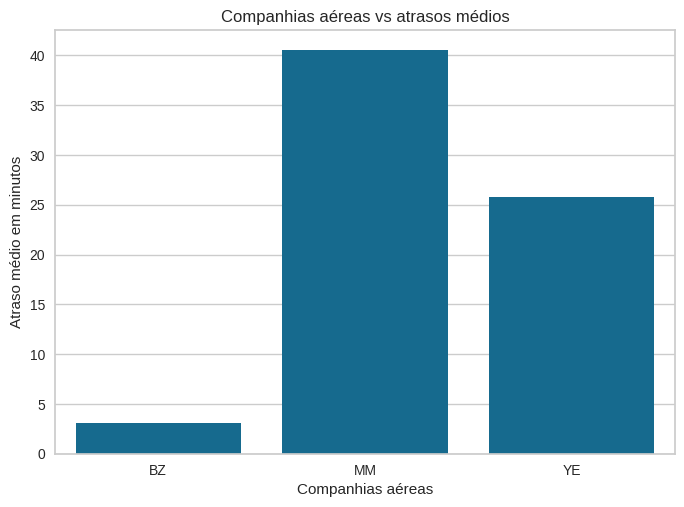

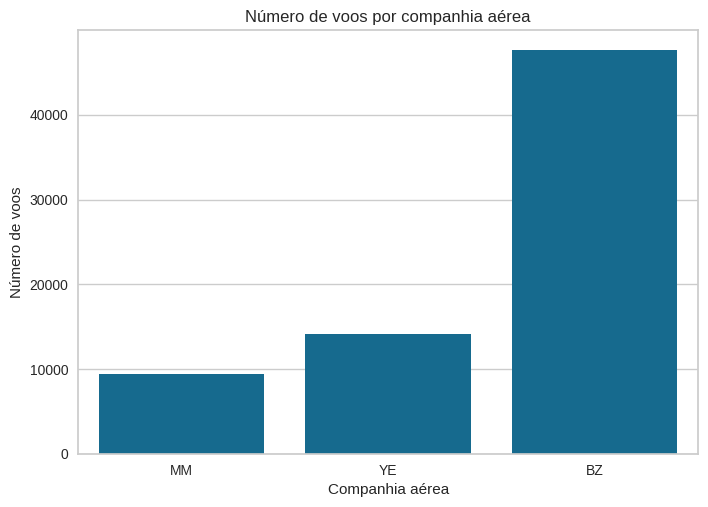

In [ ]:
average_delay = dados.groupby('airline')['delay'].mean().reset_index()
sns.barplot(x='airline', y='delay', data=average_delay)
plt.title('Companhias aéreas vs atrasos médios')
plt.xlabel('Companhias aéreas')
plt.ylabel('Atraso médio em minutos')
plt.show()

sns.countplot(data=dados, x='airline')
plt.title('Número de voos por companhia aérea')
plt.xlabel('Companhia aérea')
plt.ylabel('Número de voos')
plt.show()

Qual a necessidade do reset_index()? Se não o colocássemos, seria retornada uma series, e queremos trabalhar com esse conjunto de dados como um DataFrame. Por isso, usamos o .reset_index(). Assim, temos um DataFrame e conseguimos trabalhar de forma mais fácil, referenciando as colunas airline e delay.

Podemos excluir a nova célula criada e retornar para a anterior.

Na linha seguinte, temos o método sns.barplot(), onde no eixo x adicionamos airline, no eixo y, delay, e em data, adicionamos o DataFrame average_delay que mostramos anteriormente.

Em seguida, adicionamos o título "Companhias aéreas vs atrasos médios", nomeando o eixo x como "Companhias aéreas" e o eixo y como "Atraso médios em minutos". Na última linha do primeiro gráfico, imprimimos com plt.show().

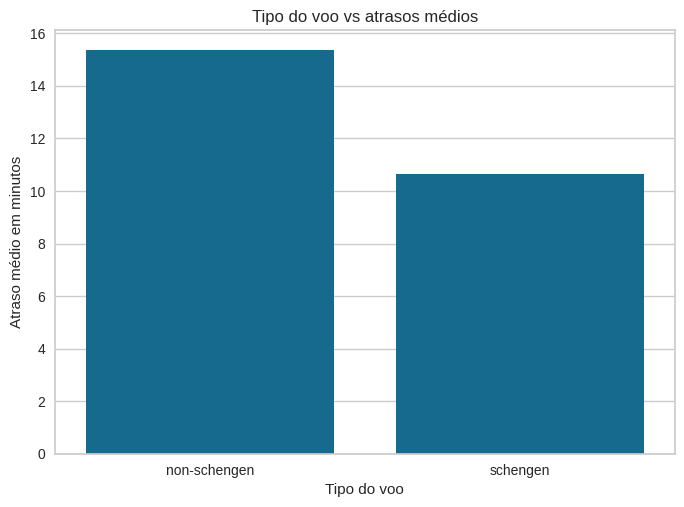

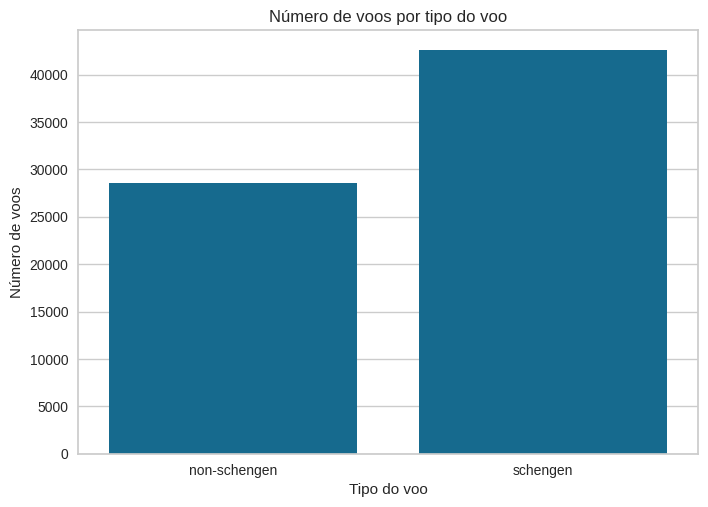

In [ ]:
average_delay = dados.groupby('schengen')['delay'].mean().reset_index()
sns.barplot(x='schengen', y='delay', data=average_delay)
plt.title('Tipo do voo vs atrasos médios')
plt.xlabel('Tipo do voo')
plt.ylabel('Atraso médio em minutos')
plt.show()

sns.countplot(data=dados, x='schengen')
plt.title('Número de voos por tipo do voo')
plt.xlabel('Tipo do voo')
plt.ylabel('Número de voos')
plt.show()

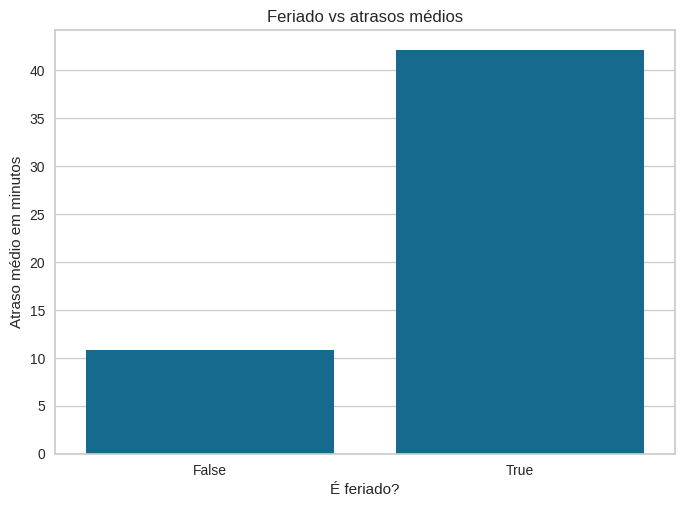

In [ ]:
average_delay = dados.groupby('is_holiday')['delay'].mean().reset_index()
sns.barplot(x='is_holiday', y='delay', data=average_delay)
plt.title('Feriado vs atrasos médios')
plt.xlabel('É feriado?')
plt.ylabel('Atraso médio em minutos')
plt.show()

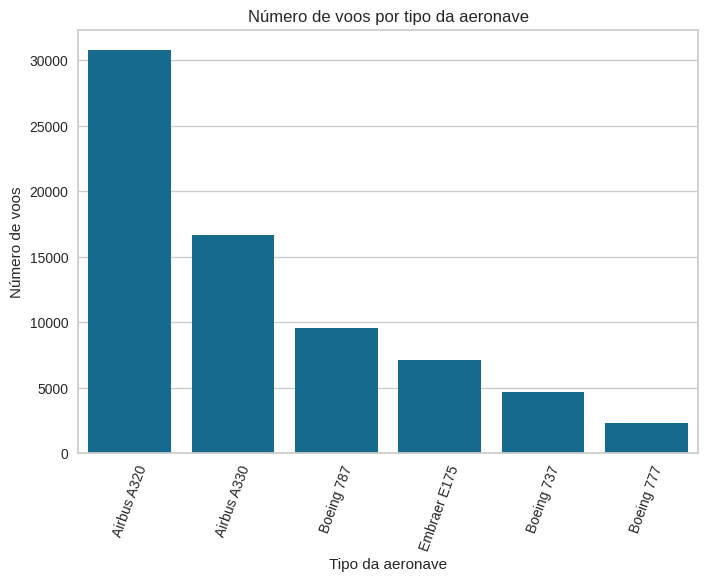

In [ ]:
order = dados['aircraft_type'].value_counts().index
sns.countplot(data=dados, x='aircraft_type', order = order)
plt.title('Número de voos por tipo da aeronave')
plt.xticks(rotation=70)
plt.xlabel('Tipo da aeronave')
plt.ylabel('Número de voos')
plt.show()

No primeiro gráfico, percebemos que a companhia aérea com mais atraso médio é a MM, seguida por YE e por último a BZ. Já no segundo gráfico, mesmo a BZ tendo o menor atraso, é a companhia aérea que mais tem voos, com mais de 40.000 voos, seguida por YE e por último MM. Ou seja, a MM é a que tem menos voos e atrasa mais.

## Terceiro e quarto gráficos

Agora, vamos construir um gráfico do tipo de voo, ou seja, se é Schengen ou não. Vamos copiar o código da célula anterior, mas em vez de agrupar por airline, agruparemos por schengen, e ajustaremos os títulos e eixos conforme o contexto.

Para começar, vamos selecionar airline dentro de groupby() e usar o atalho "Ctrl + Shift + L" para selecionar todas as ocorrências de airline na célula e substituir por schengen. Assim, fizemos a alteração necessária tanto em barplot() quanto em countplot().

Quanto aos títulos, no lugar de "Companhias aéreas vs atrasos médios" teremos "Tipo do voo vs atrasos médios", com "Tipo do voo" no eixo x e "Atraso médio em minutos" no eixo y. Da mesma forma, no lugar de "Número de voos por companhia aérea" teremos "Número de voos por tipo do voo", com "Tipo do voo" no eixo x e "Número de voos" no eixo y.

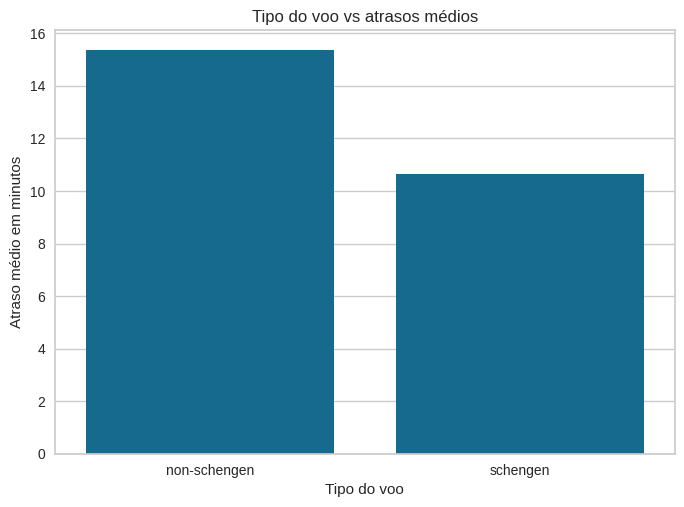

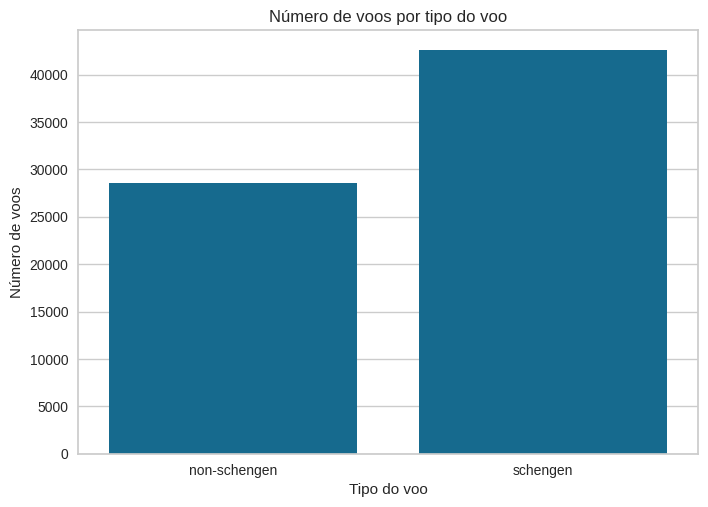

In [ ]:
average_delay = dados.groupby('schengen')['delay'].mean().reset_index()
sns.barplot(x='schengen', y='delay', data=average_delay)
plt.title('Tipo do voo vs atrasos médios')
plt.xlabel('Tipo do voo')
plt.ylabel('Atraso médio em minutos')
plt.show()

sns.countplot(data=dados, x='schengen')
plt.title('Número de voos por tipo do voo')
plt.xlabel('Tipo do voo')
plt.ylabel('Número de voos')
plt.show()

No primeiro gráfico, percebemos que os voos fora do espaço Schengen tendem a atrasar mais, em média 15 minutos, enquanto os que são do espaço Schengen atrasam em média 10 minutos.

Entretanto, mesmo o tipo do voo sendo non-schengen, eles aparecem em menos quantidade no conjunto de dados, e ainda assim são os que atrasam mais. Enquanto isso, os voos do tipo schengen aparecem em muita quantidade; em compensação, atrasam menos.

## Quinto gráfico

A seguir, vamos analisar se os atrasos em feriados são maiores ou menores do que em dias não feriados. Para isso, criaremos uma nova célula e ajustaremos o código anterior para a coluna is_holiday, alterando títulos e eixos para refletir a análise de feriado versus atraso médio.

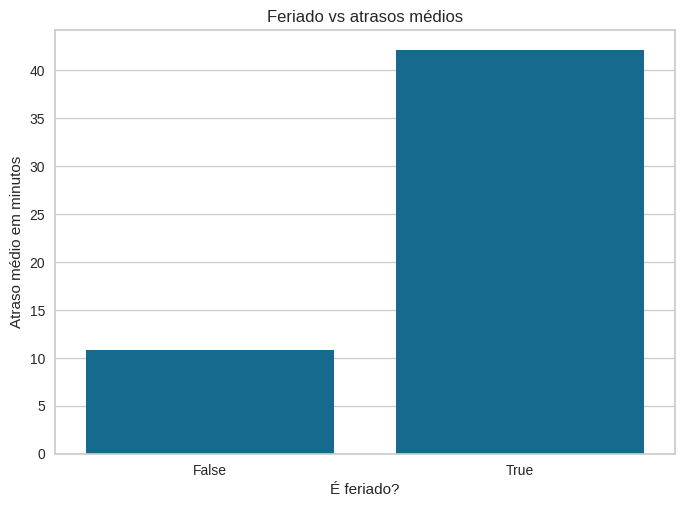

In [ ]:
average_delay = dados.groupby('is_holiday')['delay'].mean().reset_index()
sns.barplot(x='is_holiday', y='delay', data=average_delay)
plt.title('Feriado vs atrasos médios')
plt.xlabel('É feriado?')
plt.ylabel('Atraso médio em minutos')
plt.show()

## Sexto gráfico

Outra análise que podemos é sobre o tipo de aeronave. Pegamos o segundo gráfico que construímos, um countplot(), e adicionamos em uma nova célula. Queremos saber a contagem de amostras por tipo de aeronave. Alteramos o eixo x para aircraft_type e ajustamos os títulos e eixos. Para organizar o gráfico, adicionamos uma ordenação decrescente e rotacionamos os nomes das aeronaves em 70 graus com plt.xticks(rotation=70).

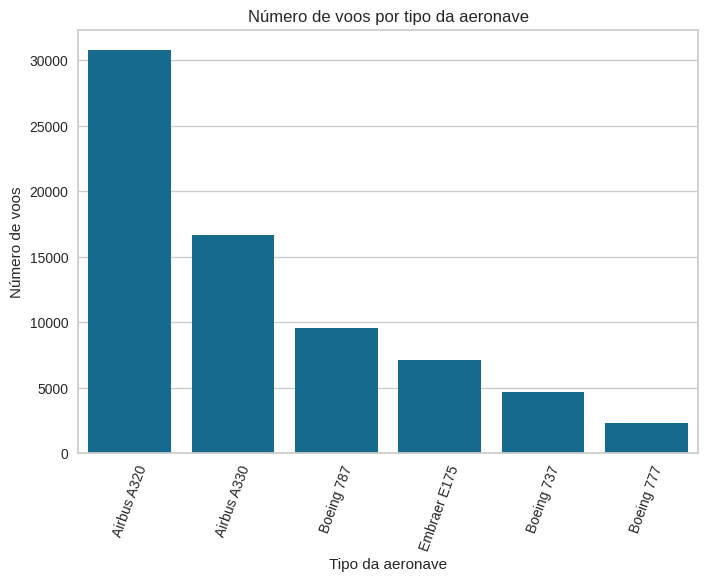

In [ ]:
order = dados['aircraft_type'].value_counts().index
sns.countplot(data=dados, x='aircraft_type', order = order)
plt.title('Número de voos por tipo da aeronave')
plt.xticks(rotation=70)
plt.xlabel('Tipo da aeronave')
plt.ylabel('Número de voos')
plt.show()

## Para saber mais: o Espaço Schengen

O Espaço Schengen é uma área geográfica que engloba a maioria dos países europeus, onde os controles de fronteira foram eliminados para permitir a livre circulação de pessoas entre os países membros. Essa área é denominada em referência ao Acordo de Schengen, assinado em 1985 na vila de Schengen, em Luxemburgo, e implementado em 1995.

O acordo foi nomeado após o local da assinatura, mas o tratado Schengen em si foi um desenvolvimento do Acordo de Schengen de 1990.

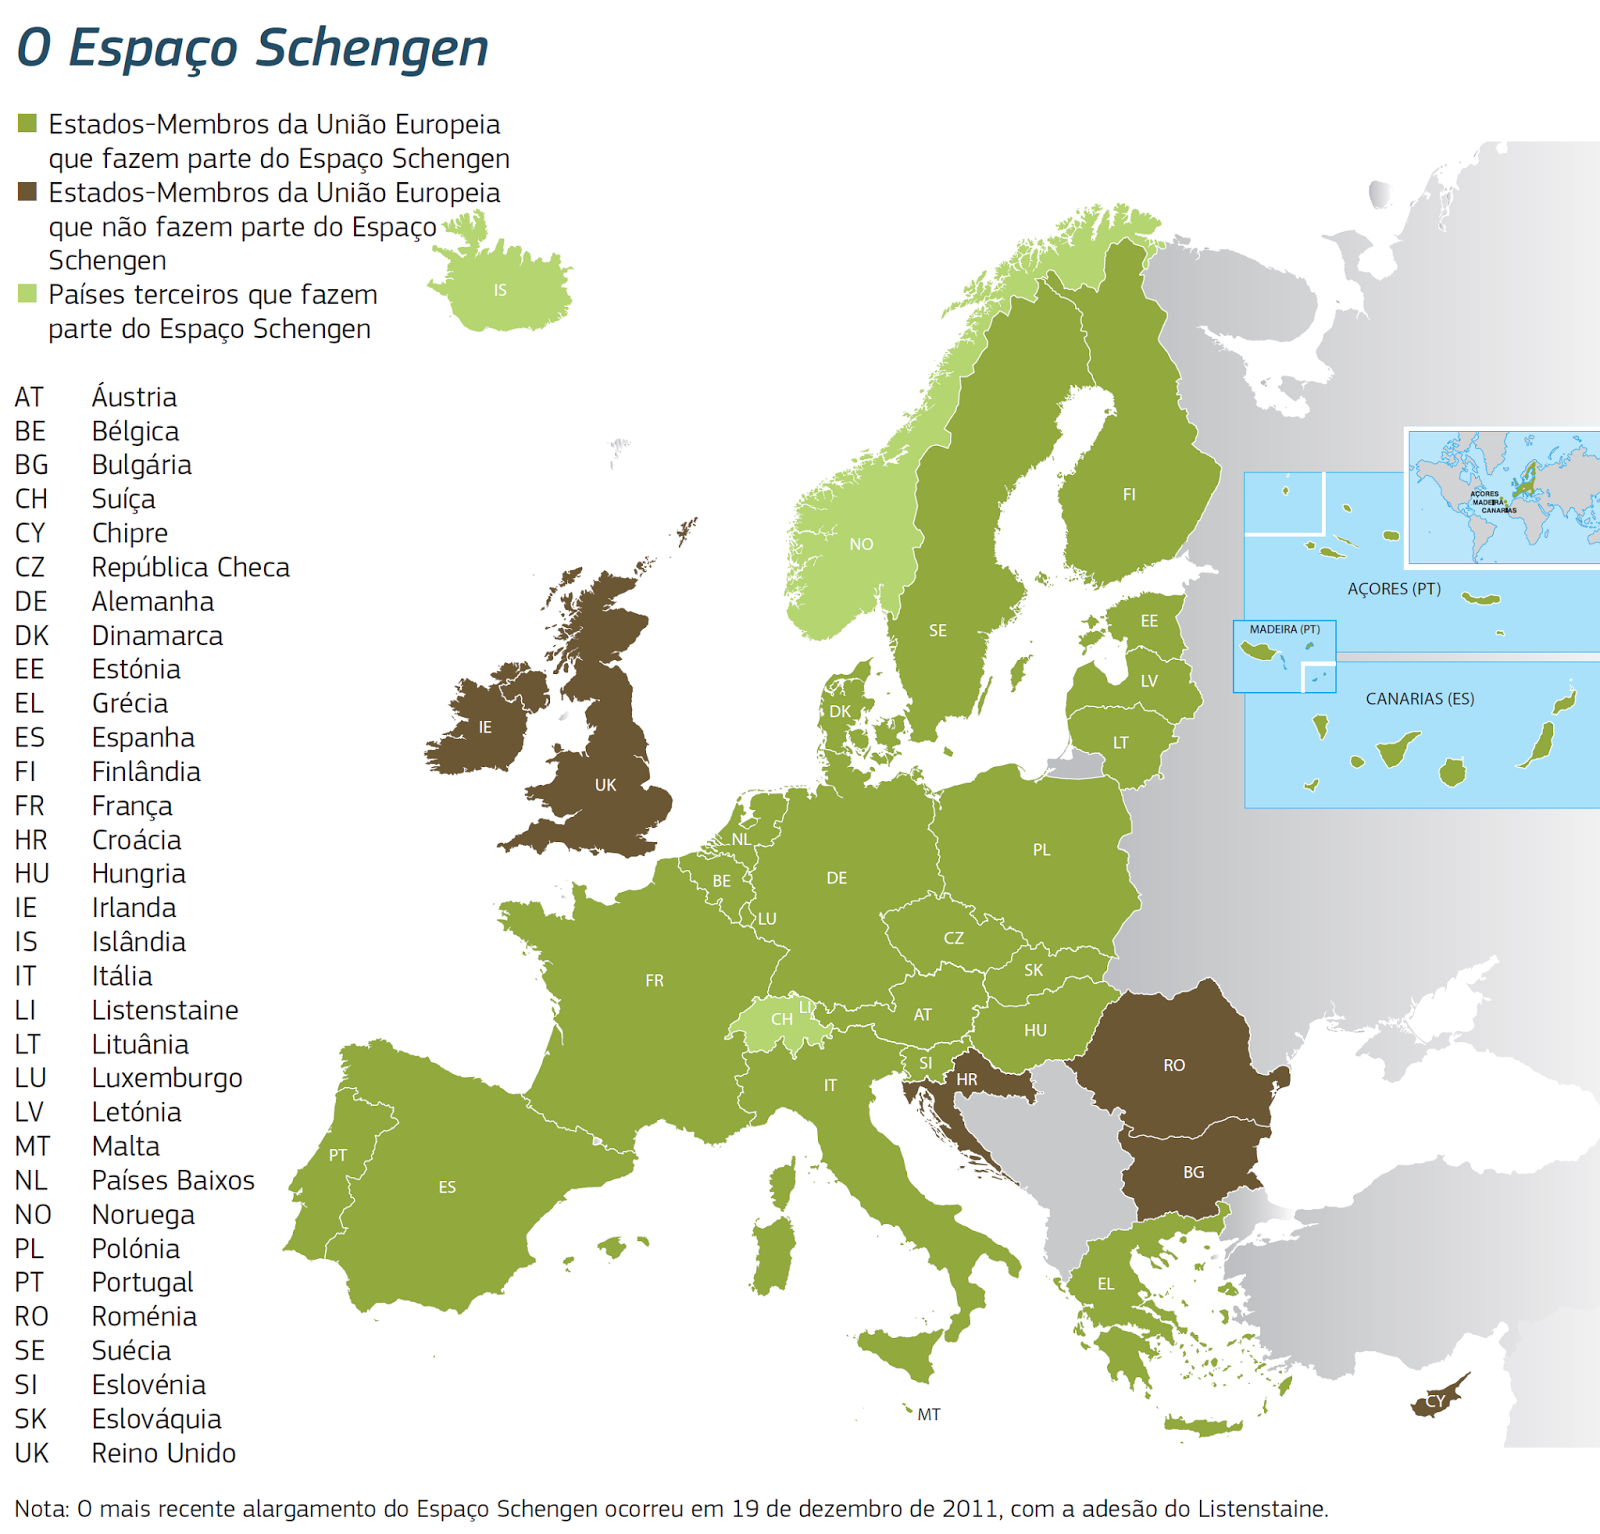

Fonte: [Mapa da Espaço Shengen em 2017](https://)

Os países que fazem parte do Espaço Schengen aboliram os controles de fronteira nas fronteiras internas, o que significa que não é necessário apresentar um passaporte ou passar por verificações de imigração ao viajar entre esses países. Já nas fronteiras externas é mais rigoroso e comum, para garantir a segurança e o controle da imigração.

Atualmente, a maioria dos países da União Europeia (UE) faz parte do Espaço Schengen, juntamente com Noruega, Islândia, Suíça e Liechtenstein que não são membros da UE. No entanto, é importante notar que nem todos os países da UE aderiram ao Acordo de Schengen.

A livre circulação dentro do Espaço Schengen facilita as viagens e o comércio entre os países membros, tornando-o uma parte fundamental da integração europeia e um exemplo de cooperação transfronteiriça em questões de segurança e imigração.



Realizamos a análise gráfica das nossas variáveis do conjunto de dados. Chegou a hora de construir outras visualizações para identificarmos os padrões em outras variáveis, incluindo a variável target, isto é, a variável delay.

Como identificar padrões das variáveis de forma mais abrangente?

Analisando a distribuição dos dados
Para isso, começaremos no Google Colab. Vamos utilizar novamente o notebook para construir essas visualizações. Deixamos uma célula de markdown novamente para organizar o notebook, intitulada "Analisando a distribuição dos dados", exatamente o que vamos fazer neste vídeo.

Deixamos também uma célula de código pronta para digitarmos. Já temos nossas bibliotecas importadas, principalmente a Matplotlib e a Seaborn, então não precisamos mais importar. O que precisamos fazer é utilizá-las.

## Criando histogramas

Para construir uma visualização interessante para analisar a distribuição de uma variável, precisamos utilizar um gráfico que chamamos de histograma. O histograma serve justamente para isso. O Seaborn já tem um método que implementa esse histograma de forma bem fácil para nós. Como utilizamos ele? Digitamos sns.histplot().

Precisamos passar alguns parâmetros, como, por exemplo, data. O conjunto de dados que estamos trabalhando é o dados. A variável que vai estar no eixo x, que é justamente a variável que queremos analisar a distribuição, será a arrival_time.

### Analisando a distribuição dos dados

<Axes: xlabel='arrival_time', ylabel='Count'>

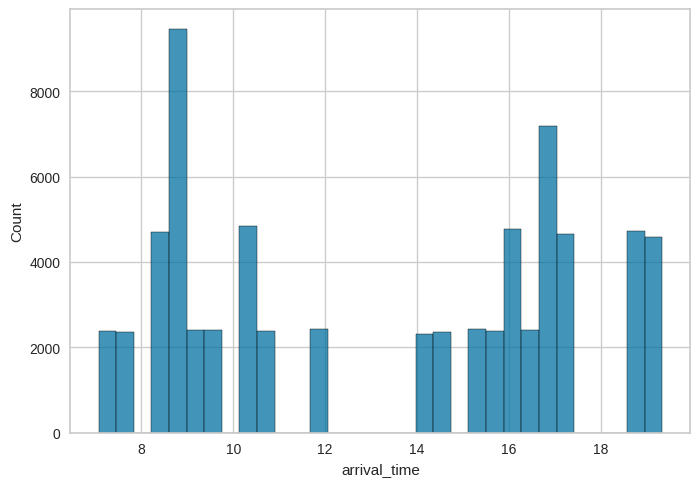

In [ ]:
sns.histplot(data=dados, x='arrival_time')

Foi construído um gráfico onde são exibidas algumas barras, que chamamos de bins. Esses bins são intervalos que dividem o nosso conjunto de dados, isto é, a variável arrival_time, em partes iguais. Porém, não sabemos exatamente quantas barras existem no gráfico, e se isso pode ou não afetar a nossa análise.

Antes, vamos colocar outro parâmetro no método histplot(), chamado kde. Basicamente, será uma curva que vai resumir a distribuição dos dados.

<Axes: xlabel='arrival_time', ylabel='Count'>

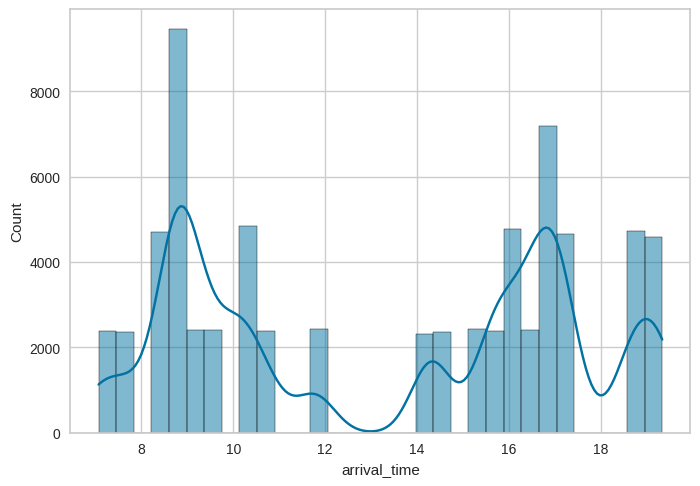

In [ ]:
sns.histplot(data=dados, x='arrival_time', kde=True)

Notamos o seguinte: no horário de chegada, há um certo pico por volta das 9 horas da manhã e depois decai por volta do almoço. Quando estamos por volta das 16, 17 horas, novamente, sobe um pouco. Então, são esses os horários em que há mais voos chegando no aeroporto: por volta das 9 e por volta das 17, com o pico subindo e descendo.

    Não notamos nenhuma distribuição assimétrica, nem à direita, nem à esquerda.

Há outro parâmetro que podemos mudar: o bins. Por exemplo, se colocarmos bins=10, como fica a distribuição?

<Axes: xlabel='arrival_time', ylabel='Count'>

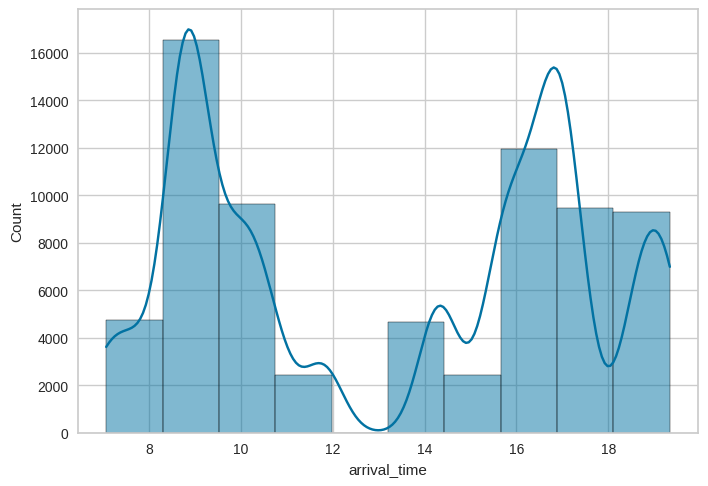

In [ ]:
sns.histplot(data=dados, x='arrival_time', kde=True, bins=10)

Percebemos que já mudou o nosso gráfico. Ele ficou levemente diferente. Se colocarmos bins=100, por exemplo, não conseguimos extrair muita informação do gráfico gerado. Será que não há uma forma de encontrarmos uma largura de bin ideal, de forma que fique mais correto? A resposta é sim!

Aplicando a Regra de Freedman-Diaconis
Existe uma regra chamada Regra de Freedman-Diaconis, que fala justamente disso. Ela pode ser utilizada para selecionar a largura dos comprimentos a serem usados em um histograma, conforme indicado na página da Wikipedia.

Vamos utilizar essa regra. Mas como ela é aplicada? Ela determina a largura do bin, que é igual a 2 vezes o intervalo interquartil dividido pela raiz cúbica do número de observações. Vamos implementar essa regra na prática.



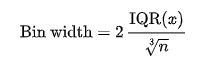

Para isso, criaremos uma célula acima da célula de histograma que estamos desenvolvendo. Já deixamos o código pré-pronto, seguindo o mesmo padrão. Recomendamos que você pause o vídeo, copie para o seu notebook, e volte para a explicação.

In [ ]:
import numpy as np

def calcular_largura_bin(df, coluna):
    Q75, Q25 = np.percentile(df[coluna], [75 ,25])
    IQR = Q75 - Q25
    largura_bin = 2 * IQR * np.power(len(df[coluna]), -1/3)
    return largura_bin

Na primeira linha, colocamos import numpy as np, importando a biblioteca NumPy e dando o apelido de np. Em seguida, definimos a função calcular_largura_bin(). Passamos para ela dois parâmetros: o DataFrame (df) e a coluna que queremos calcular a largura do bin. Na próxima linha, colocamos Q75 e Q25, referenciando o primeiro e o terceiro quartil, e utilizamos np.percentile(df[coluna], [75, 25]), que são os quartis que queremos, o terceiro e o primeiro.

Depois, calculamos o intervalo interquartil existente na fórmula que acabamos de mostrar. Basta subtrair o terceiro do primeiro. O intervalo interquartil é Q3 menos Q1.

A próxima coisa que precisamos fazer é justamente calcular a largura do bin. Para isso, basta aplicar diretamente a fórmula com largura_bin = 2 * IQR * np.power(len(df[coluna]), -1/3).

Isso seria basicamente multiplicar o intervalo interquartil por 2, multiplicar pelo número de observações, que é o n, elevado a -1/3, o que é a mesma coisa que multiplicar o n elevado a 1/3 elevado a -1. Qualquer número elevado a -1 é o inverso desse número. Por exemplo: se fizermos 2 elevado a -1, temos o mesmo que 1 sobre 2. Como o número de observações está no denominador, precisamos elevá-lo a um expoente negativo.

Por fim, retornamos a largura do bin com return largura_bin.

Vamos aplicar agora e pegar a largura do bin na célula abaixo. Porém, há um detalhe: não temos largura do bin.. Felizmente, no Seaborn, há um parâmetro de largura de bin, o binwidth, que será igual ao que vamos calcular agora.

In [ ]:
sns.histplot(data=dados, x='arrival_time', kde=True, binwidth=)

Vamos executar a célula anterior para definir a função. Em seguida, iremos copiar o nome da função calcular_largura_bin() e colar na primeira linha célula abaixo. O df que passaremos será dados, enquanto a coluna será arrival_time.

Feito isso, vamos atribuir a função a uma variável que chamaremos de largura_bin_at, de arrival_time. Agora podemos passar essa variável para o parâmetro binwidth.

<Axes: xlabel='arrival_time', ylabel='Count'>

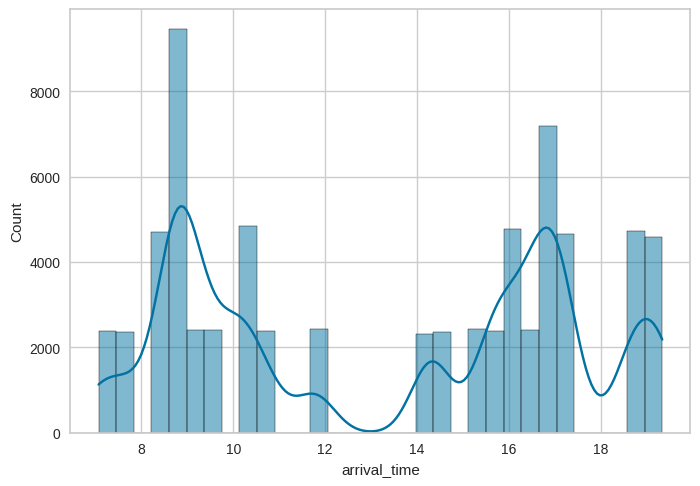

In [ ]:
largura_bin_at = calcular_largura_bin(dados, 'arrival_time')

sns.histplot(data=dados, x='arrival_time', kde=True, binwidth=largura_bin_at)

O histograma foi modificado e melhorado. Se quisermos visualizar com a largura, podemos criar uma nova célula, digitar largura_bin_at e visualizar que a largura dos bins é 0.38.

In [ ]:
largura_bin_at

np.float64(0.3846176245547029)

## Criando o histograma de departure_time

Fizemos o histograma para a variável arrival_time, ou seja, o horário de chegada. Agora vamos construir para departure_time, o horário de saída que calculamos. Vamos conferir se existe algum padrão nisso.

Vamos copiar e colar o código da célula anterior em uma nova célula, mas em vez de arrival_time, colocaremos departure_time e executaremos com "Shift + Enter".

<Axes: xlabel='departure_time', ylabel='Count'>

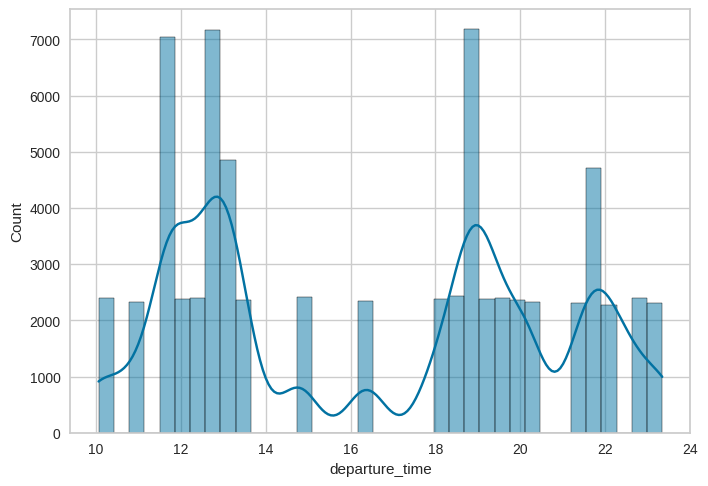

In [ ]:
largura_bin_dt = calcular_largura_bin(dados, 'departure_time')

sns.histplot(data=dados, x='departure_time', kde=True, binwidth=largura_bin_dt)

Percebemos que a relação permanece. Notamos que por volta do meio-dia há um pico, onde tem mais voos, depois tem um decaimento, e logo em seguida um pico novamente. Provavelmente, esses voos que saem ao meio-dia são aqueles que chegam às 9 horas, como vimos anteriormente. Essa relação também permanece para 18, 19 horas. Por volta de 19 horas, o voo que chega às 17, sai às 19. É de se esperar isso também.

## Criando o histograma de delay

Construímos o histograma com duas variáveis, e percebemos que não há nenhuma assimetria entre elas, não existe um padrão muito bem definido. Agora vamos construir para a variável target.

Para isso, como é uma quantidade de código considerável, já deixamos pré-pronto os comandos. Novamente, dê uma pausa, copie esse código para o seu notebook e volte para continuarmos a explicação.

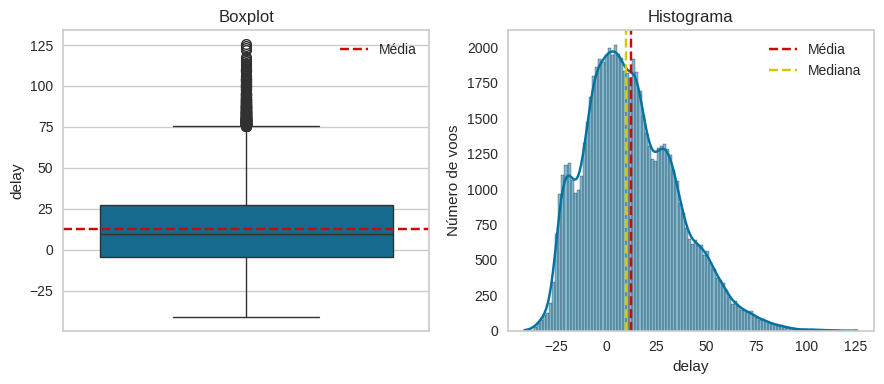

In [ ]:
mean_delay = dados['delay'].mean()
median_delay = dados['delay'].median()

fig, axes = plt.subplots(1, 2, figsize=(9, 4))

sns.boxplot(data=dados, y='delay', ax=axes[0])
axes[0].set_title('Boxplot')

axes[0].axhline(y=mean_delay, color='r', linestyle='--', label='Média')
axes[0].legend()

largura_bin_delay = calcular_largura_bin(dados, 'delay')
sns.histplot(data=dados, x='delay', ax=axes[1], kde=True, binwidth=largura_bin_delay)
plt.ylabel('Número de voos')
plt.grid(False)
axes[1].set_title('Histograma')

axes[1].axvline(x=mean_delay, color='r', linestyle='--', label='Média')
axes[1].axvline(x=median_delay, color='y', linestyle='--', label='Mediana')
axes[1].legend()

plt.tight_layout()
plt.show()

Nas duas primeiras linhas, calculamos a média e a mediana do delay (mean_delay e median_delay), que é a variável target, e depois atribuímos subplots(). subplots() são vários gráficos em um. Atribuímos a duas variáveis: a fig e axes. axes são exatamente os subplots().

Em seguida, construímos o primeiro boxplot(). Para isso, digitamos sns.boxplot(), atribuímos data a dados, que é um DataFrame, o y será o delay, e ax será axes[0], aonde o gráfico estará. Além disso, atribuímos o título "Boxplot".

Depois, colocamos uma linha horizontal com a média na cor vermelha, no caso color='r' significa red (vermelho). O estilo da linha (linestyle) é tracejado (--), e o label é "Média". Além disso, imprimimos a legenda.

O outro gráfico que construímos é um histplot(). Consiste na mesma coisa que construímos anteriormente, em que data é igual a dados, x é delay, será o segundo gráfico, por isso axes[1], e o kde é igual a True. Aprendemos como ter a largura dos bins correta. Então, copiamos o código de largura_bin_at da célula acima e fizemos as alterações necessárias.

Também passamos o parâmetro binwidth igual a largura_bin_delay. No ylabel(), temos o número de voos. Colocamos plt.grid(False) na linha abaixo, porque não queremos as grades, pois elas poluem visualmente o gráfico, e colocamos um título para o gráfico de "Histograma".

Depois colocamos duas linhas verticais: uma com a média, na cor vermelha, novamente com o estilo tracejado e com o label "Média"; e outra com a mediana, na cor amarela, novamente tracejada com o label "Mediana". Além disso, imprimimos a legenda do gráfico e colocamos plt.tight_layout() para os gráficos subplots() não ficarem sobrepostos, para as informações não ficarem juntas. Por fim, usamos o método plt.show() para imprimir.

Vamos executar com "Ctrl + Enter". O que temos no nosso boxplot?

Percebemos que é um bonito boxplot. Apesar de ter alguns pontos acima do limite superior, eles não causam deformação no boxplot. São candidatos a outliers, mas provavelmente são alguns casos pontuais do nosso conjunto de dados, com a média por volta dos 15, aproximadamente. Temos o Q1, o primeiro quartil; a mediana um pouco acima do zero; o terceiro quartil; e a média com a linha vermelha, conforme definimos.

Analisando a distribuição da variável target, imprimimos a média e a mediana, mas percebemos que ela é levemente assimétrica à direita, mas essa assimetria não prejudica a qualidade dos dados. É de se esperar essa assimetria, que a distribuição fosse feita dessa forma, mas ela está, de certa forma, próxima do normal, não está tão assimétrica à direita.

Percebemos, inclusive, que a média está bem próxima da mediana, o que é um bom sinal, indica que é uma boa variável para utilizarmos em nosso conjunto de dados. Então, essa relação permanece, a relação de assimetria à direita, onde a média é maior que a mediana, que é maior do que a moda, mas esses valores estão, de certa forma, bem próximos.

## Conclusão

Portanto, não há nenhum tratamento que precisamos fazer na variável target. Chegou a hora de, a partir dessas análises, fazer o tratamento para inserir esses dados em um modelo de machine learning, deixá-los preparados para inserir em um modelo e ele conseguir entender esses dados de forma apropriada.





Ao final, conseguimos construir gráficos descritivos das nossas informações e extrair informações relevantes do nosso conjunto de dados. Resta visualizar a distribuição das variáveis, incluindo a variável alvo, para analisarmos como essa variável se comporta!

In [ ]:
import numpy as np

def calcular_largura_bin(df, coluna):
    Q75, Q25 = np.percentile(df[coluna], [75 ,25])
    IQR = Q75 - Q25
    largura_bin = 2 * IQR * np.power(len(df[coluna]), -1/3)
    return largura_bin

<Axes: xlabel='arrival_time', ylabel='Count'>

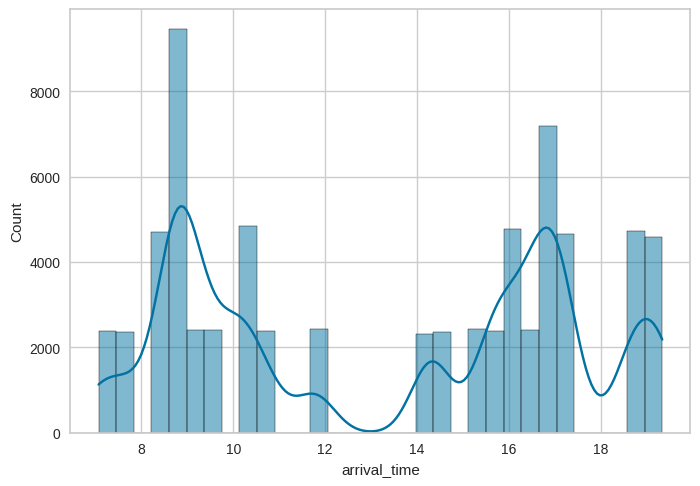

In [ ]:
largura_bin_at = calcular_largura_bin(dados, 'arrival_time')

sns.histplot(data=dados, x='arrival_time', kde=True, binwidth=largura_bin_at)

<Axes: xlabel='departure_time', ylabel='Count'>

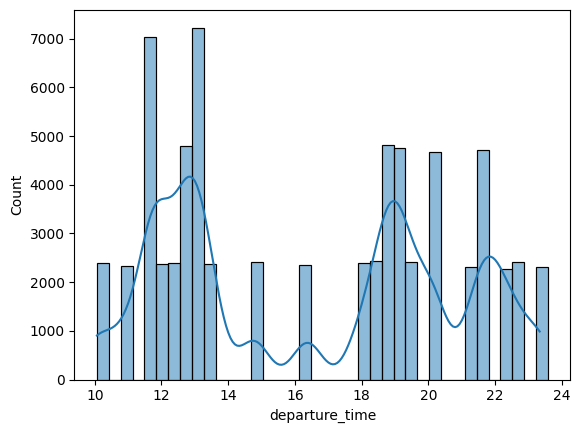

In [ ]:
largura_bin_dt = calcular_largura_bin(dados, 'departure_time')

sns.histplot(data=dados, x='departure_time', kde=True, binwidth=largura_bin_dt)

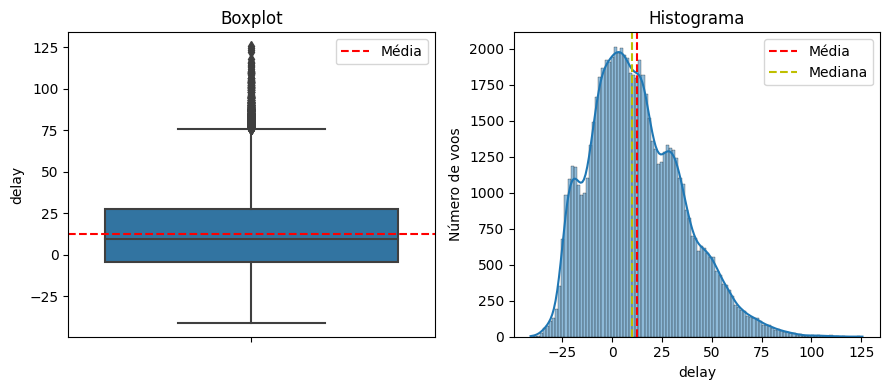

In [ ]:
mean_delay = dados['delay'].mean()
median_delay = dados['delay'].median()

fig, axes = plt.subplots(1, 2, figsize=(9, 4))

sns.boxplot(data=dados, y='delay', ax=axes[0])
axes[0].set_title('Boxplot')

axes[0].axhline(y=mean_delay, color='r', linestyle='--', label='Média')
axes[0].legend()

largura_bin_delay = calcular_largura_bin(dados, 'delay')
sns.histplot(data=dados, x='delay', ax=axes[1], kde=True, binwidth=largura_bin_delay)
plt.ylabel('Número de voos')
plt.grid(False)
axes[1].set_title('Histograma')

axes[1].axvline(x=mean_delay, color='r', linestyle='--', label='Média')
axes[1].axvline(x=median_delay, color='y', linestyle='--', label='Mediana')
axes[1].legend()

plt.tight_layout()
plt.show()

## Objetivo do boxplot

O boxplot, também conhecido como diagrama de caixa, é uma representação gráfica que nos permite visualizar a distribuição dos dados de uma forma mais clara e objetiva. Ele é composto por: um retângulo que representa a mediana e os quartis dos dados, além de linhas que se estendem para fora do retângulo, que mostram a amplitude dos dados, conforme a imagem abaixo:

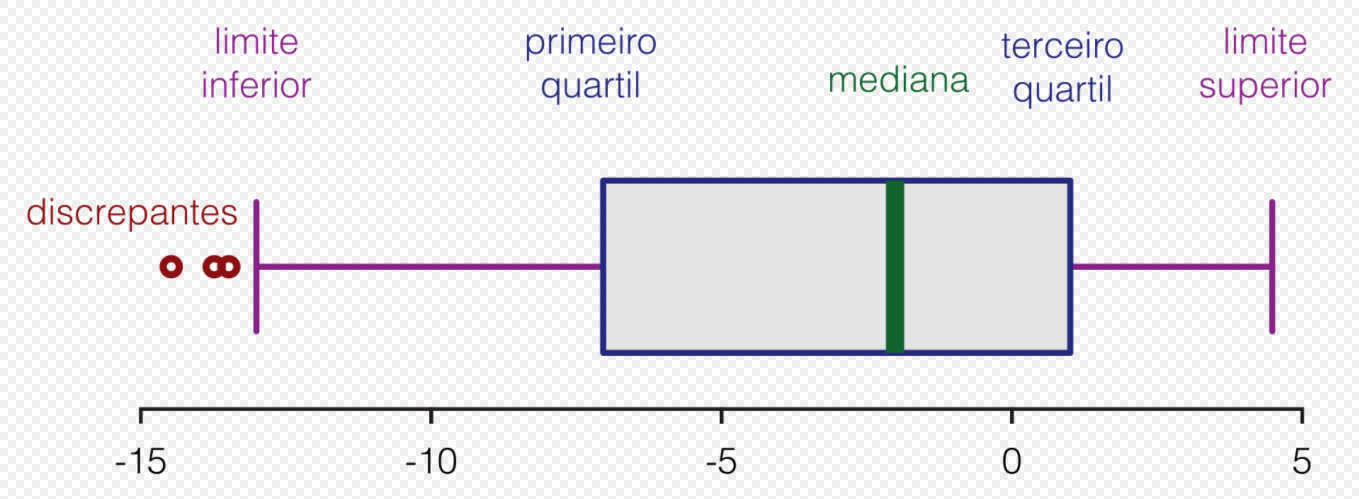

Onde:

- O limite inferior é o valor mínimo que um dado pode ter sem ser considerado um valor atípico (outlier). Ele é calculado como Q1 - 1,5 x IQR (onde IQR é a amplitude interquartil, ou seja, a diferença entre o terceiro quartil e o primeiro quartil).

- O primeiro quartil (Q1) é o valor que divide os dados em 25% abaixo e 75% acima dele. Ou seja, 25% dos dados estão abaixo do Q1 e 75% estão acima.

- A mediana é o valor que divide os dados em 50% abaixo e 50% acima dele.
O terceiro quartil (Q3) é o valor que divide os dados em 75% abaixo e 25% acima dele. Ou seja, 75% dos dados estão abaixo do Q3 e 25% estão acima.

- O limite superior é o valor máximo que um dado pode ter sem ser considerado um valor atípico. Ele é calculado como Q3 + 1,5 x IQR.

- Diante disso, podemos dizer que finalidade do boxplot é:


Visualizar a distribuição dos dados e identificar possíveis candidatos a outliers.


O boxplot é usado para visualizar a distribuição dos dados e identificar possíveis outliers. Ele mostra os quartis (Q1, Q2 e Q3), a mediana (Q2), além de indicar a presença de valores extremos ou discrepantes

## Faça como eu fiz

Nesta aula, realizamos a análise exploratória dos dados construindo gráficos e analisando as estatísticas descritivas do conjunto de dados referente aos atrasos de voos.

Então, chegou o momento de você realizar o passo a passo executado durante a aula.

Caso tenha dúvidas, confira o andamento do seu projeto ao clicar na opção Opinião da pessoa instrutora na sequência.

Opinião do instrutor

1 - O primeiro passo é fazer a leitura do arquivo CSV utilizando o Pandas:

In [ ]:
import pandas as pd
dados = pd.read_csv('flights.csv')

2 - Imprima as estatísticas descritivas utilizando os métodos describe e info.

In [ ]:
dados.describe()  # Estatística descritivas para as variáveis numéricas

,flight_id,arrival_time,departure_time,day,year,delay
count,71175.000000,71175.000000,71175.000000,71175.000000,71175.000000,71175.000000
mean,15.465135,13.283159,16.480222,182.000000,2016.000000,12.548378
std,8.649646,4.023380,4.143705,105.366769,3.741684,23.125349
min,1.000000,7.065594,10.065594,0.000000,2010.000000,-41.028033
25%,8.000000,8.939996,12.668655,91.000000,2013.000000,-4.412876
50%,15.000000,14.258911,16.376052,182.000000,2016.000000,9.740454
75%,23.000000,16.909690,20.041281,273.000000,2019.000000,27.650853
max,30.000000,19.341235,23.341235,364.000000,2022.000000,125.632352


In [ ]:
dados.describe(include='O')  # Estatística descritivas para as variáveis do tipo “object”

,airline,aircraft_type,schengen,origin
count,71175,71175,71175,71175
unique,3,6,2,10
top,BZ,Airbus A320,schengen,TZF
freq,47598,30778,42569,14162


In [ ]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71175 entries, 0 to 71174
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   flight_id       71175 non-null  int64  
 1   airline         71175 non-null  object 
 2   aircraft_type   71175 non-null  object 
 3   schengen        71175 non-null  object 
 4   origin          71175 non-null  object 
 5   arrival_time    71175 non-null  float64
 6   departure_time  71175 non-null  float64
 7   day             71175 non-null  int64  
 8   year            71175 non-null  int64  
 9   is_holiday      71175 non-null  bool   
 10  delay           71175 non-null  float64
dtypes: bool(1), float64(3), int64(3), object(4)
memory usage: 5.5+ MB


3 - Construa as visualizações gráficas:

In [ ]:
# Importando as bibliotecas necessárias

import matplotlib.pyplot as plt
import seaborn as sns

Em seguida, vamos construir dois gráficos: um de "Companhias aéreas vs Atrasos médios", para ser possível identificar qual companhia aérea possui maior atraso médio; e outro de "Número de voos por companhia aérea".

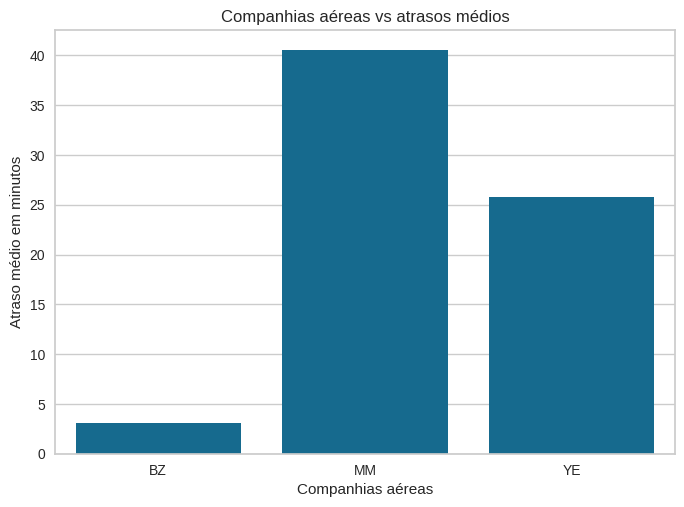

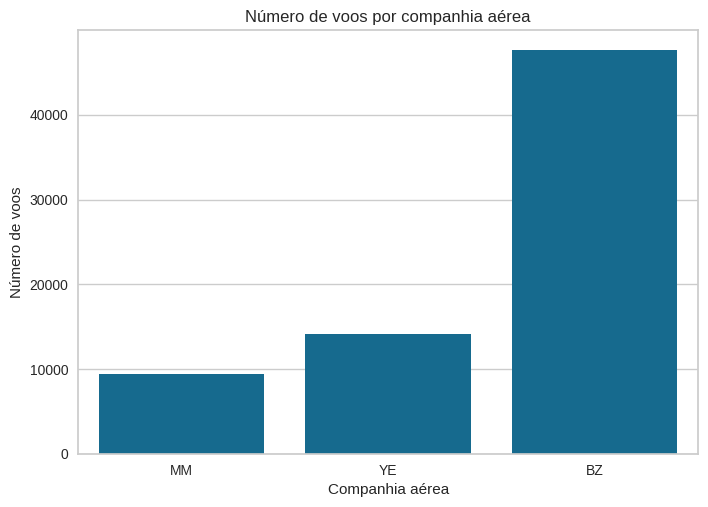

In [ ]:
average_delay = dados.groupby('airline')['delay'].mean().reset_index()
sns.barplot(x='airline', y='delay', data=average_delay)
plt.title('Companhias aéreas vs atrasos médios')
plt.xlabel('Companhias aéreas')
plt.ylabel('Atraso médio em minutos')
plt.show()

sns.countplot(data=dados, x='airline')
plt.title('Número de voos por companhia aérea')
plt.xlabel('Companhia aérea')
plt.ylabel('Número de voos')
plt.show()

Os próximos gráficos a serem construídos são: Tipo do voo vs Atrasos médios e Número de voos por tipo do voo

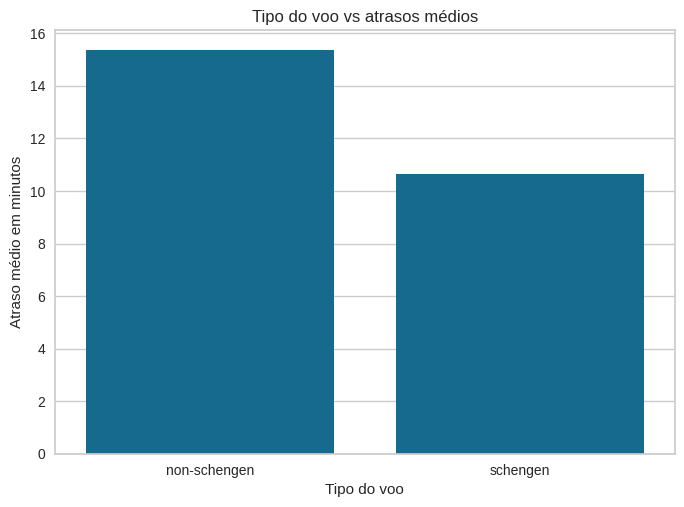

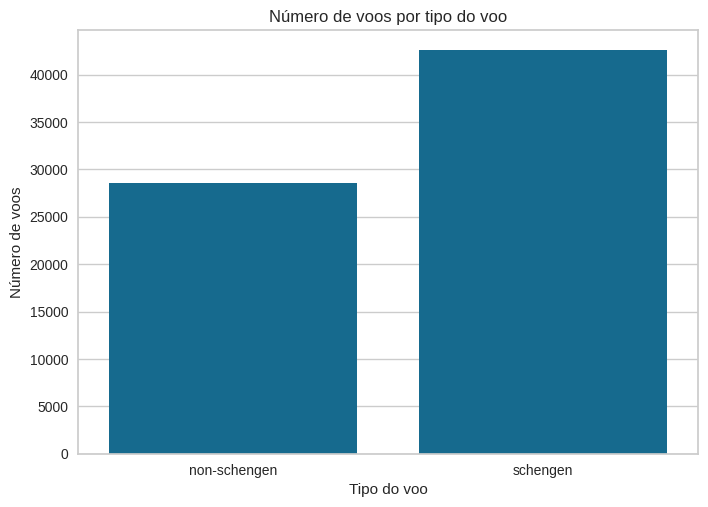

In [ ]:
average_delay = dados.groupby('schengen')['delay'].mean().reset_index()
sns.barplot(x='schengen', y='delay', data=average_delay)
plt.title('Tipo do voo vs atrasos médios')
plt.xlabel('Tipo do voo')
plt.ylabel('Atraso médio em minutos')
plt.show()

sns.countplot(data=dados, x='schengen')
plt.title('Número de voos por tipo do voo')
plt.xlabel('Tipo do voo')
plt.ylabel('Número de voos')
plt.show()

Vamos construir também um gráfico para analisar se há mais atrasos em feriados:

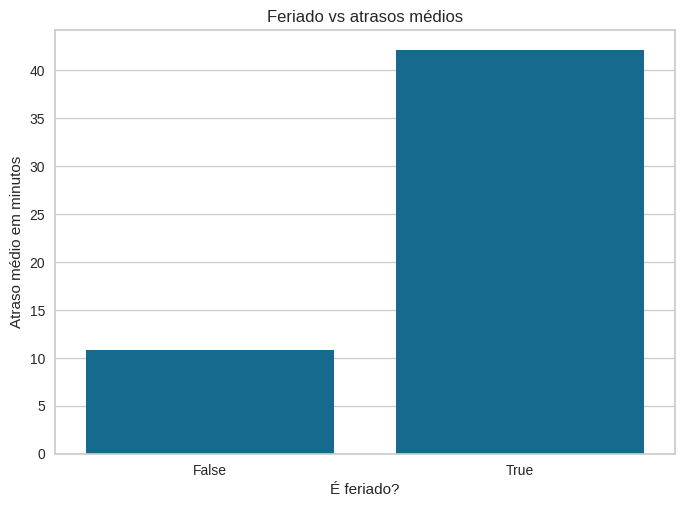

In [ ]:
average_delay = dados.groupby('is_holiday')['delay'].mean().reset_index()
sns.barplot(x='is_holiday', y='delay', data=average_delay)
plt.title('Feriado vs atrasos médios')
plt.xlabel('É feriado?')
plt.ylabel('Atraso médio em minutos')
plt.show()

O próximo gráfico é o de Número de voos por tipo da aeronave:

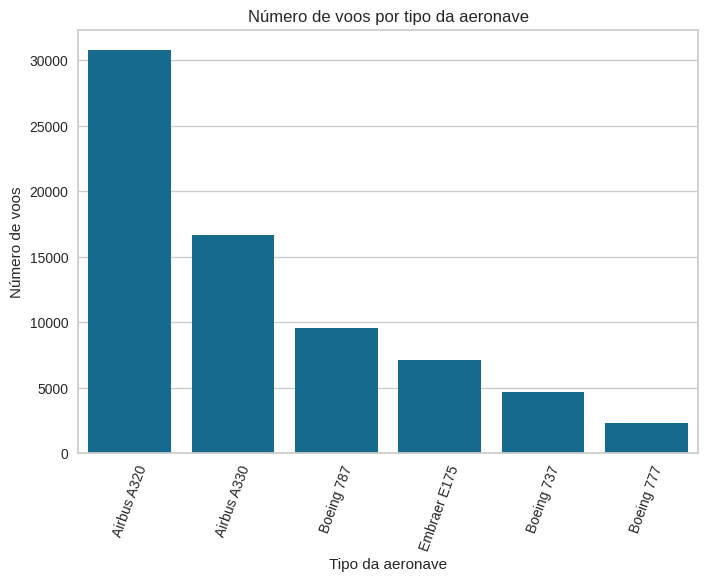

In [ ]:
order = dados['aircraft_type'].value_counts().index
sns.countplot(data=dados, x='aircraft_type', order = order)
plt.title('Número de voos por tipo da aeronave')
plt.xticks(rotation=70)
plt.xlabel('Tipo da aeronave')
plt.ylabel('Número de voos')
plt.show()

4 - Analise a distribuição dos dados.

É importante analisar a distribuição dos dados antes de inserir em um modelo de regressão para garantir que o modelo seja apropriado para os dados. A distribuição deles pode afetar a precisão do modelo, por isso, é importante garantir que os dados estejam distribuídos de maneira adequada antes de realizar a análise. Além disso, a análise da distribuição dos dados pode ajudar a identificar valores discrepantes e decidir como lidar com eles antes de realizar a análise.

O primeiro passo é definir uma largura para os bins. Bins, em um histograma, são intervalos de valores que são usados para agrupar os dados em classes. Para definir essa largura vamos utilizar a Regra Freedman-Diaconis que matematicamente é definida como:



In [ ]:
import numpy as np

def calcular_largura_bin(df, coluna):
    Q75, Q25 = np.percentile(df[coluna], [75 ,25])
    IQR = Q75 - Q25
    largura_bin = 2 * IQR * np.power(len(df[coluna]), -1/3)
    return largura_bin

Agora vamos construir os histogramas para o horário de chegada e o horário de partida dos aviões

<Axes: xlabel='arrival_time', ylabel='Count'>

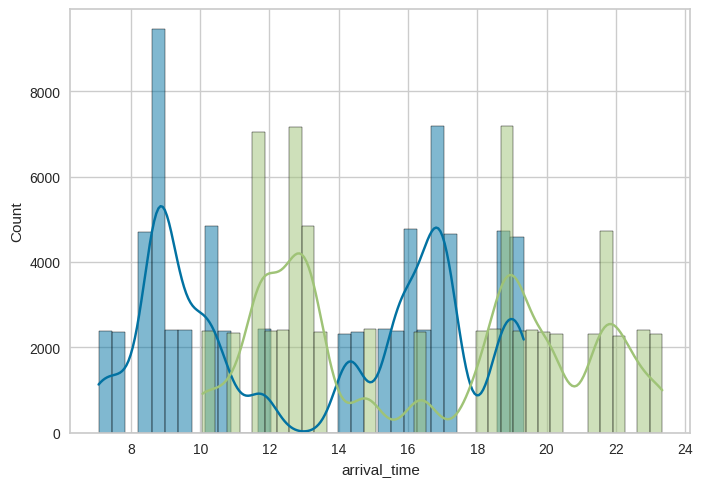

In [ ]:
largura_bin_at = calcular_largura_bin(dados, 'arrival_time')
largura_bin_dt = calcular_largura_bin(dados, 'departure_time')
sns.histplot(data=dados, x='arrival_time', kde=True, binwidth=largura_bin_at)
sns.histplot(data=dados, x='departure_time', kde=True, binwidth=largura_bin_dt)

E por último vamos construir um boxplot e um histograma da variável target (delay).

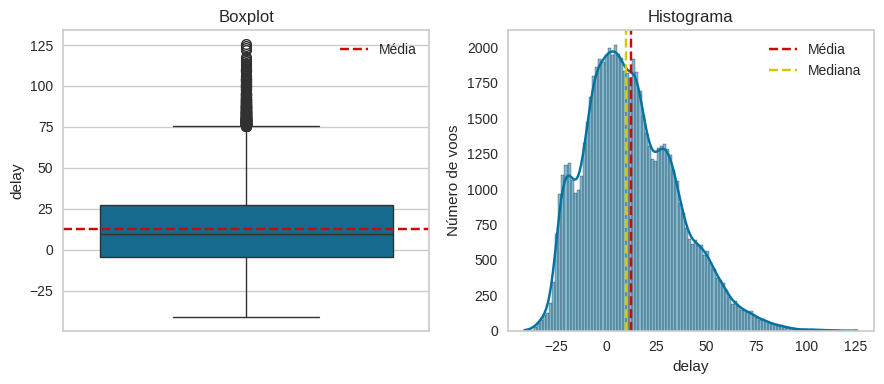

In [ ]:
mean_delay = dados['delay'].mean()
median_delay = dados['delay'].median()

fig, axes = plt.subplots(1, 2, figsize=(9, 4))

sns.boxplot(data=dados, y='delay', ax=axes[0])
axes[0].set_title('Boxplot')

axes[0].axhline(y=mean_delay, color='r', linestyle='--', label='Média')
axes[0].legend()

largura_bin_delay = calcular_largura_bin(dados, 'delay')
sns.histplot(data=dados, x='delay', ax=axes[1], kde=True, binwidth=largura_bin_delay)
plt.ylabel('Número de voos')
plt.grid(False)
axes[1].set_title('Histograma')

axes[1].axvline(x=mean_delay, color='r', linestyle='--', label='Média')
axes[1].axvline(x=median_delay, color='y', linestyle='--', label='Mediana')
axes[1].legend()

plt.tight_layout()
plt.show()

## O que aprendemos?

## Nessa aula, você aprendeu

  - Analisar as estatísticas descritivas dos dados;

  - Obter informações relevantes dos dados como a quantidade de dados nulos e a tipagem das colunas;

  - Construir a análise gráfica dos dados;

  - Construir a visualização gráfica da distribuição dos dados.


# **<font color=green fontsize=6>Aula 02 - Criando novas colunas**

Conseguimos extrair informações do nosso conjunto de dados, realizando:

 - Análise exploratória;

 - Análise estatística;

 - Análise gráfica.

Chegou a hora de transformarmos e prepararmos as nossas features para inserirmos no modelo de Machine Learning, mais especificamente em um modelo de regressão.

## Como obter novas colunas?

Como podemos obter novas colunas a partir das que já temos para, assim, construirmos modelos de Machine Learning ainda melhores? Para responder essa pergunta, vamos acessar o Colab!

Nosso Colab está pré-pronto e com a célula de código para ser editada. Vamos analisar as colunas que temos passando dados.head(). Vamos visualizar somente uma amostra, porque só queremos analisar as colunas.

In [ ]:
dados.head(1)

,flight_id,airline,aircraft_type,schengen,origin,arrival_time,departure_time,day,year,is_holiday,delay,date,day_name,is_weekend
0,26,MM,Airbus A320,0,TCY,8.885071,10.885071,0,2010,0,70.205981,2010-01-01,Friday,0


Observando nosso conjunto de dados, temos a coluna day e a coluna year, onde year é o ano e day refere-se ao dia daquele ano. Por exemplo, essa primeira amostra é 0 de 2010. Significa que é o primeiro dia de 2010, ou seja, primeiro de janeiro de 2010.

A nossa intenção é utilizar essa informação para gerar novas colunas. A partir dessa data, podemos, por exemplo, determinar que dia da semana é. É uma segunda? É uma terça? É uma quarta? Ou podemos dizer ainda se é ou não no final de semana, se é um sábado ou se é um domingo, para facilitar as nossas análises dos voos nesses dias. Então, como podemos fazer isso?

O primeiro passo é deixar essa informação de maneira que o Pandas consiga entender. Da forma como está, isso não é possível. Vamos ter que concatenar essas duas informações, deixar ela na seguinte forma: se é 0 de 2010, então vamos colocar 2010-0. Mais adiante, comentamos sobre o zero.

Para concatenar, uma forma muito fácil é utilizar strings (cadeias de caracteres). Então, vamos transformar a coluna year em string. Para isso, vamos escrever:

In [ ]:
dados['year'].astype(str)

,year
0,2010
1,2010
2,2010
3,2010
4,2010
...,...
71170,2022
71171,2022
71172,2022
71173,2022


Temos que fazer isso também para o dia, precisamos dessas duas informações. Então, vamos copiar o código, colar na célula embaixo, substituir year por day e executar novamente com o comando "Shift + Enter".

In [ ]:
dados['day'].astype(str)

,day
0,0
1,0
2,0
3,0
4,0
...,...
71170,364
71171,364
71172,364
71173,364


Porém, há um detalhe, o método que vamos utilizar do Pandas não consegue interpretar o zero como sendo o dia, apenas a partir do 1. Então, primeiro de janeiro de 2010, por exemplo, vai ter que ser 2010-1.

Para resolver esse problema, vamos adicionar colchetes envolvendo dados['day'] e inserir +1. Assim, conseguiremos realizar a conversão.

In [ ]:
(dados['day'] + 1).astype(str)

,day
0,1
1,1
2,1
3,1
4,1
...,...
71170,365
71171,365
71172,365
71173,365


O que temos que fazer agora é justamente concatenar. Então, vamos copiar o código e colar no primeiro trecho, onde convertemos o year após os sinais de + '-' +. Desta maneira, transformaremos o dia em string

In [ ]:
print(dados['day'].head())  # primeiros valores
print(dados['day'].tail())  # últimos valores

0    3
1    3
2    3
3    3
4    3
Name: day, dtype: int64
71170    367
71171    367
71172    367
71173    367
71174    367
Name: day, dtype: int64


In [ ]:
dados['day'] = dados['day'] - 2
dados['date'] = dados['year'].astype(str) + '-' + dados['day'].astype(str)

In [ ]:
dados['year'].astype(str) + '-' + dados['day'].astype(str)

,0
0,2010-1
1,2010-1
2,2010-1
3,2010-1
4,2010-1
...,...
71170,2022-365
71171,2022-365
71172,2022-365
71173,2022-365


Agora vamos converter para a data: primeiro de janeiro de 2010 ou 31 de dezembro de 2022, para as cinco últimas amostras. Vamos utilizar o pd.to_datetime(), envolver todo o nosso código de concatenação nos parênteses.

Como segundo argumento do to_datetime(), vamos passar o format, referente ao formato dessa nossa concatenação. Ela está no formato %Y-%j.

Talvez o %j não seja tão familiar, mas de acordo com a documentação do datetime do próprio Python, %j é o dia do ano com o número decimal com zeros à esquerda, que é justamente o que temos.

In [ ]:
pd.to_datetime(dados['year'].astype(str) + '-' + dados['day'].astype(str), format='%Y-%j')

,0
0,2010-01-01
1,2010-01-01
2,2010-01-01
3,2010-01-01
4,2010-01-01
...,...
71170,2022-12-31
71171,2022-12-31
71172,2022-12-31
71173,2022-12-31


Agora vamos criar uma nova coluna e chamaremos de dados['date'], igual ao que acabamos de criar. Também passaremos dados.head().

In [ ]:
dados['date'] = pd.to_datetime(dados['year'].astype(str) + '-' + dados['day'].astype(str), format='%Y-%j')
dados.head()

,flight_id,airline,aircraft_type,schengen,origin,arrival_time,departure_time,day,year,is_holiday,delay,date,day_name,is_weekend,new_column
0,26,MM,Airbus A320,0,TCY,8.885071,10.885071,1,2010,0,70.205981,2010-01-01,Friday,0,2010-0
1,10,YE,Airbus A320,0,TCY,8.939996,11.939996,1,2010,0,38.484609,2010-01-01,Friday,0,2010-0
2,3,BZ,Embraer E175,1,TZF,18.635384,22.635384,1,2010,0,2.388305,2010-01-01,Friday,0,2010-0
3,28,BZ,Airbus A330,0,EMM,15.967963,17.967963,1,2010,0,19.138491,2010-01-01,Friday,0,2010-0
4,15,BZ,Airbus A330,0,FJB,16.571894,19.571894,1,2010,0,15.016271,2010-01-01,Friday,0,2010-0


Uma coluna date foi gerada, que é exatamente a coluna que criamos com a data. Agora ficou muito mais fácil pegar o dia. Como podemos fazer para saber qual o dia da semana, se é uma segunda, terça, quarta, e assim sucessivamente, e se é um final de semana ou não?

Vamos começar por se é um final de semana ou não. Existe um método do Pandas que é o .dt.weekday. Ele retorna o dia da semana, sendo que a segunda-feira é representada por zero e a sexta-feira é representada por seis.

    Caso queira saber mais sobre o método dt.weekday, basta acessar a documentação do Pandas

Para saber se é um final de semana ou não, ou seja, se é um cinco ou seis, vamos copiar a declaração do método na documentação e colar em uma nova célula de código.

In [ ]:
dados['dia_da_semana'] = dados['date'].dt.weekday

In [ ]:
dados['date'].dt.weekday

,date
0,4
1,4
2,4
3,4
4,4
...,...
71170,5
71171,5
71172,5
71173,5


Estamos interessados em saber se é ou não, portanto, obter um True ou False. Para isso, vamos colocar .isin([5, 6]). Se o valor retornado for cinco ou seis, ou seja, sábado e domingo, será True, do contrário, será False.

In [ ]:

dados['date'].dt.weekday.isin([5, 6])

,date
0,False
1,False
2,False
3,False
4,False
...,...
71170,True
71171,True
71172,True
71173,True


O retorno é como esperávamos, com True ou False. Vamos atribuir esse trecho de código a uma variável que chamaremos de dados['is_weekend'], para final de semana ou não.

In [ ]:
dados['is_weekend'] = dados['date'].dt.weekday.isin([5,6])

Realizada essa atribuição, o que temos que fazer agora é verificar qual o nome do dia. Para isso, vamos criar uma nova célula de código e consultaremos, na documentação do Pandas, pandas.Series.dt.day_name(), que retorna o nome do dia.

Novamente, vamos copiar essa declaração, colar em uma nova célula de código, apagar onde tem pandas.Series, referenciar a nossa series, que é dados['date'].dt.day_name().

Ou seja, ele está retornando se é "Friday" (sexta-feira) ou "Saturday" (sábado).

In [ ]:
dados['is_weekend'] = dados['date'].dt.day_name()
dados.loc[~dados['date'].dt.weekday.isin([5, 6]), 'is_weekend'] = 'Dia de semana'

As cinco primeiro amostras são "Friday" e as cinco últimas, "Saturday". Vamos atribuir esse código a uma variável que chamaremos de dados['day_name']. Também passaremos dados.head() em outra linha para verificarmos esse dado.

In [ ]:
dados['day_name'] = dados['date'].dt.day_name()
dados.head(10)

,flight_id,airline,aircraft_type,schengen,origin,arrival_time,departure_time,day,year,is_holiday,delay,date,day_name,is_weekend,new_column,dia_da_semana
0,26,MM,Airbus A320,0,TCY,8.885071,10.885071,1,2010,0,70.205981,2010-01-01,Friday,Dia de semana,2010-0,4
1,10,YE,Airbus A320,0,TCY,8.939996,11.939996,1,2010,0,38.484609,2010-01-01,Friday,Dia de semana,2010-0,4
2,3,BZ,Embraer E175,1,TZF,18.635384,22.635384,1,2010,0,2.388305,2010-01-01,Friday,Dia de semana,2010-0,4
3,28,BZ,Airbus A330,0,EMM,15.967963,17.967963,1,2010,0,19.138491,2010-01-01,Friday,Dia de semana,2010-0,4
4,15,BZ,Airbus A330,0,FJB,16.571894,19.571894,1,2010,0,15.016271,2010-01-01,Friday,Dia de semana,2010-0,4
5,27,BZ,Airbus A320,1,AUZ,14.376052,16.376052,1,2010,0,9.842977,2010-01-01,Friday,Dia de semana,2010-0,4
6,25,BZ,Boeing 777,0,CSF,19.341235,23.341235,1,2010,0,39.012804,2010-01-01,Friday,Dia de semana,2010-0,4
7,28,BZ,Airbus A330,0,EMM,15.967963,17.967963,1,2010,0,12.546978,2010-01-01,Friday,Dia de semana,2010-0,4
8,22,YE,Airbus A320,0,MWL,8.794147,11.794147,1,2010,0,44.969728,2010-01-01,Friday,Dia de semana,2010-0,4
9,8,BZ,Airbus A320,1,ZQO,15.729617,18.729617,1,2010,0,20.957860,2010-01-01,Friday,Dia de semana,2010-0,4


Nas duas últimas colunas, retornamos se é um final de semana ou não, is_weekend, e na última coluna, o nome desse dia, conforme queríamos no início.

## Conclusão

Conseguimos criar novas colunas a partir das colunas que tínhamos. Agora, para trabalhar com as demais colunas, vamos nos preocupar com as variáveis categóricas. Até mais!

# Para saber mais: o que é feature engineering?

Feature engineering é um conceito fundamental no campo da ciência de dados e aprendizado de máquina, e desempenha um papel crucial no processo de desenvolvimento de modelos preditivos e analíticos. Essa técnica envolve a criação, transformação e seleção de variáveis, também conhecidas como "features", a partir dos dados brutos disponíveis, a fim de melhorar o desempenho dos modelos. Mas o que seriam features?

## O que são features?

Features são as variáveis ou atributos que um modelo de machine learning utiliza para fazer previsões ou classificações. Elas representam as informações que o modelo tem à sua disposição para aprender padrões nos dados. Por exemplo, se estivermos construindo um modelo para prever o preço de uma casa, as features podem incluir o número de quartos, a metragem quadrada, a localização geográfica, a proximidade de escolas, entre outras.

## A importância do Feature Engineering:

 - Melhora o desempenho do modelo: Escolher as features certas e transformá-las adequadamente pode resultar em modelos mais precisos e eficientes. Features bem projetadas podem capturar informações relevantes e eliminar ruído nos dados.

 - Reduz a dimensionalidade: Em datasets com muitas features, a dimensionalidade dos dados pode se tornar um problema. O feature engineering pode ajudar a reduzir a quantidade de features, mantendo apenas aquelas que são realmente informativas para o modelo.

## Técnicas de Feature Engineering:

Existem várias técnicas de feature engineering, incluindo:

 1 - Criação de features: Isso envolve a criação de novas features com base nas existentes. Por exemplo, combinar as features de metragem e valor de um imóvel para criar uma feature que representa o valor por metro quadrado daquele imóvel. Ou ainda, se você tem dados de data e hora, pode criar uma nova característica que representa o dia da semana. Isso pode ser útil porque talvez haja padrões que ocorrem em dias específicos da semana.

 2 - Transformação de features: Pode-se aplicar funções matemáticas às features existentes para torná-las mais adequadas para o modelo. Exemplos incluem aplicar logaritmos ou escalonar valores para reduzir a escala em que a variável está.

 3 - Seleção de features: Nem todas as features são igualmente importantes. A seleção de features envolve identificar e manter apenas as mais relevantes para o problema em questão.

## Feature engineering e sua importância

Na área de ciência de dados e aprendizado de máquina, um conceito fundamental é o "Feature Engineering" (Engenharia de Features). Essa técnica desempenha um papel crucial no desenvolvimento de modelos preditivos e analíticos, permitindo que as pessoas cientistas de dados extraiam informações valiosas dos dados. Nesse sentido, o que é Feature Engineering e por que ela é importante?

Feature Engineering envolve a criação, transformação e seleção de variáveis a partir de dados brutos.


O Feature Engineering é um processo que envolve a criação, transformação e seleção de variáveis a partir de dados brutos. O objetivo é melhorar a precisão do modelo, fornecendo informações mais significativas e relevantes


# Feature encoding

Construímos novas colunas para o conjunto de dados, incluindo uma variável categórica: a dname. Porém, antes de inserirmos um modelo de Machine Learning (Aprendizado de Máquina), precisamos trabalhar com essas variáveis categóricas.

Isso acontece porque a maioria dos algoritmos de Machine Learning exige que os dados de entrada sejam numéricos, enquanto as variáveis categóricas representam categorias, como tipo, cor, tipo de cliente, entre outros.

Como podemos fazer a transformação dessas variáveis categóricas para deixá-las prontas para que qualquer modelo de Machine Learning consiga interpretar e aceitar esses dados?

## Trabalhando com variáveis

No Google Colab, vamos começar pela variável categórica binária, onde os valores são somente dois: sim ou não. Como identificar essas variáveis? O Pandas fornece um método que é dados.nunique(). Executando com o comando "Shift + Enter", recebemos um retorno composto de algumas variáveis com dois valores únicos: schengen, is_holiday e is_weekend.

Para verificar quais são esses valores únicos, podemos colocar, em uma nova célula de código, dados[].unique(). Porém, precisamos referenciar qual coluna queremos visualizar. Começaremos com a de schengen.

## Feature engineering

In [ ]:
dados['date'] = pd.to_datetime(dados['year'].astype(str) + '-' + (dados['day'] + 1).astype(str), format='%Y-%j')
dados.head()

,flight_id,airline,aircraft_type,schengen,origin,arrival_time,departure_time,day,year,is_holiday,delay,date,day_name,is_weekend,new_column,dia_da_semana
0,26,MM,Airbus A320,0,TCY,8.885071,10.885071,1,2010,0,70.205981,2010-01-02,Friday,Dia de semana,2010-0,4
1,10,YE,Airbus A320,0,TCY,8.939996,11.939996,1,2010,0,38.484609,2010-01-02,Friday,Dia de semana,2010-0,4
2,3,BZ,Embraer E175,1,TZF,18.635384,22.635384,1,2010,0,2.388305,2010-01-02,Friday,Dia de semana,2010-0,4
3,28,BZ,Airbus A330,0,EMM,15.967963,17.967963,1,2010,0,19.138491,2010-01-02,Friday,Dia de semana,2010-0,4
4,15,BZ,Airbus A330,0,FJB,16.571894,19.571894,1,2010,0,15.016271,2010-01-02,Friday,Dia de semana,2010-0,4


In [ ]:
dados['is_weekend'] = dados['date'].dt.weekday.isin([5, 6])
dados.head()

,flight_id,airline,aircraft_type,schengen,origin,arrival_time,departure_time,day,year,is_holiday,delay,date,day_name,is_weekend,new_column,dia_da_semana
0,26,MM,Airbus A320,0,TCY,8.885071,10.885071,1,2010,0,70.205981,2010-01-02,Friday,True,2010-0,4
1,10,YE,Airbus A320,0,TCY,8.939996,11.939996,1,2010,0,38.484609,2010-01-02,Friday,True,2010-0,4
2,3,BZ,Embraer E175,1,TZF,18.635384,22.635384,1,2010,0,2.388305,2010-01-02,Friday,True,2010-0,4
3,28,BZ,Airbus A330,0,EMM,15.967963,17.967963,1,2010,0,19.138491,2010-01-02,Friday,True,2010-0,4
4,15,BZ,Airbus A330,0,FJB,16.571894,19.571894,1,2010,0,15.016271,2010-01-02,Friday,True,2010-0,4


In [ ]:
dados['day_name'] = dados['date'].dt.day_name()
dados.head()

,flight_id,airline,aircraft_type,schengen,origin,arrival_time,departure_time,day,year,is_holiday,delay,date,day_name
0,26,MM,Airbus A320,non-schengen,TCY,8.885071,10.885071,0,2010,False,70.205981,2010-01-01,Friday
1,10,YE,Airbus A320,non-schengen,TCY,8.939996,11.939996,0,2010,False,38.484609,2010-01-01,Friday
2,3,BZ,Embraer E175,schengen,TZF,18.635384,22.635384,0,2010,False,2.388305,2010-01-01,Friday
3,28,BZ,Airbus A330,non-schengen,EMM,15.967963,17.967963,0,2010,False,19.138491,2010-01-01,Friday
4,15,BZ,Airbus A330,non-schengen,FJB,16.571894,19.571894,0,2010,False,15.016271,2010-01-01,Friday


### Feature Encoding

In [ ]:
dados.nunique()

,0
flight_id,30
airline,3
aircraft_type,6
schengen,2
origin,10
arrival_time,30
departure_time,30
day,365
year,13
is_holiday,2


In [ ]:
dados['is_holiday'].unique()

array([0, 1])

In [ ]:
dados['is_weekend'].unique()

array([1, 0])

    array([False, True])

O que temos que fazer é substituir esses valores categóricos binários por 0 e 1. O non-schengen será zero; schengen será 1; False será zero; e True será 1. O objetivo é inserí-los no nosso conjunto de dados e deixá-los numéricos.

Para isso, criamos uma nova célula de código, começando com schengen:

In [ ]:
dados['schengen'] = dados['schengen'].replace({'non-schengen': 0, 'schengen': 1})
dados['is_holiday'] = dados['is_holiday'].replace({False: 0, True: 1})
dados['is_weekend'] = dados['is_weekend'].replace({False: 0, True: 1})
dados.head()

/tmp/ipython-input-81-2385380026.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  dados['is_weekend'] = dados['is_weekend'].replace({False: 0, True: 1})


,flight_id,airline,aircraft_type,schengen,origin,arrival_time,departure_time,day,year,is_holiday,delay,date,day_name,is_weekend,new_column,dia_da_semana
0,26,MM,Airbus A320,0,TCY,8.885071,10.885071,1,2010,0,70.205981,2010-01-02,Friday,1,2010-0,4
1,10,YE,Airbus A320,0,TCY,8.939996,11.939996,1,2010,0,38.484609,2010-01-02,Friday,1,2010-0,4
2,3,BZ,Embraer E175,1,TZF,18.635384,22.635384,1,2010,0,2.388305,2010-01-02,Friday,1,2010-0,4
3,28,BZ,Airbus A330,0,EMM,15.967963,17.967963,1,2010,0,19.138491,2010-01-02,Friday,1,2010-0,4
4,15,BZ,Airbus A330,0,FJB,16.571894,19.571894,1,2010,0,15.016271,2010-01-02,Friday,1,2010-0,4


assamos dados['schenhen'] e para substituir os valores, usamos .replace({}). Nas chaves, definimos quais valores. O non-schengen foi referenciado como zero e schengen como 1.

Executando o código, uma series composta de zero e 1 da coluna schengen foi criada.

In [ ]:
variaveis_categoricas = ['airline', 'aircraft_type', 'origin', 'day_name']

In [ ]:
df_encoded = pd.get_dummies(data=dados, columns=variaveis_categoricas, dtype=int)
df_encoded.head()

,flight_id,schengen,arrival_time,departure_time,day,year,is_holiday,delay,date,is_weekend,...,origin_TCY,origin_TZF,origin_ZQO,day_name_Friday,day_name_Monday,day_name_Saturday,day_name_Sunday,day_name_Thursday,day_name_Tuesday,day_name_Wednesday
0,26,0,8.885071,10.885071,1,2010,0,70.205981,2010-01-02,1,...,1,0,0,1,0,0,0,0,0,0
1,10,0,8.939996,11.939996,1,2010,0,38.484609,2010-01-02,1,...,1,0,0,1,0,0,0,0,0,0
2,3,1,18.635384,22.635384,1,2010,0,2.388305,2010-01-02,1,...,0,1,0,1,0,0,0,0,0,0
3,28,0,15.967963,17.967963,1,2010,0,19.138491,2010-01-02,1,...,0,0,0,1,0,0,0,0,0,0
4,15,0,16.571894,19.571894,1,2010,0,15.016271,2010-01-02,1,...,0,0,0,1,0,0,0,0,0,0


In [ ]:
dados['schengen'] = dados['schengen'].replace({'non-schengen': 0, 'schengen': 1})

Para as demais variáveis, copiaremos essa linha, colaremos em outra linha e faremos as devidas substituições. Utilizamos "Ctrl + D" para selecionar a próxima ocorrência e "Ctrl + V" para colar, evitando repetições.

In [ ]:
dados['schengen'] = dados['schengen'].replace({'non-schengen': 0, 'schengen': 1})
dados['is_holiday'] = dados['is_holiday'].replace({False: 0, True: 1})
dados['is_weekend'] = dados['is_weekend'].replace({False: 0, True: 1})

Após isso, adicionamos uma nova linha com dados.head().

In [ ]:
dados['schengen'] = dados['schengen'].replace({'non-schengen': 0, 'schengen': 1})
dados['is_holiday'] = dados['is_holiday'].replace({False: 0, True: 1})
dados['is_weekend'] = dados['is_weekend'].replace({False: 0, True: 1})
dados.head()

,flight_id,airline,aircraft_type,schengen,origin,arrival_time,departure_time,day,year,is_holiday,delay,date,day_name,is_weekend,new_column,dia_da_semana
0,26,MM,Airbus A320,0,TCY,8.885071,10.885071,1,2010,0,70.205981,2010-01-02,Friday,1,2010-0,4
1,10,YE,Airbus A320,0,TCY,8.939996,11.939996,1,2010,0,38.484609,2010-01-02,Friday,1,2010-0,4
2,3,BZ,Embraer E175,1,TZF,18.635384,22.635384,1,2010,0,2.388305,2010-01-02,Friday,1,2010-0,4
3,28,BZ,Airbus A330,0,EMM,15.967963,17.967963,1,2010,0,19.138491,2010-01-02,Friday,1,2010-0,4
4,15,BZ,Airbus A330,0,FJB,16.571894,19.571894,1,2010,0,15.016271,2010-01-02,Friday,1,2010-0,4


As variáveis categóricas binárias foram substituídas.

Tratadas as variáveis categóricas binárias, precisamos trabalhar com as variáveis que têm mais de duas categorias:

 - airline, com 3 valores;

 - aircraft_type, com 6 valores;

 - origin, com 10 valores;

 - day_name, com 7 valores.

O primeiro passo é criar uma lista com o nome dessas variáveis:

In [ ]:
variaveis_categoricas = ['airline', 'aircraft_type', 'origin', 'day_name']

Agora temos uma lista com o nome das nossas variáveis categóricas (com mais de duas categorias) executamos com "Shit + Enter" para atribuir e o próximo passo é realizar a transformação dessas variáveis.

Para isso, utilizaremos o método pd.get_dummies() do Pandas. Ele cria novas colunas binárias com zeros e uns, indicando a presença ou ausência do valor de uma coluna.

Vamos passar pd e referenciar o método da biblioteca Pandas, get_dummies(). Nos parênteses, definimos nosso banco de dados, data=dados, e as nossas colunas, columns, que são as variáveis categóricas que acabamos de visualizar.

Além disso, podemos passar .head(2) para visualizarmos apenas dois resultados.

In [ ]:
pd.get_dummies(data=dados, columns=variaveis_categoricas, dtype=int).head(2)

,flight_id,schengen,arrival_time,departure_time,day,year,is_holiday,delay,date,is_weekend,...,origin_TCY,origin_TZF,origin_ZQO,day_name_Friday,day_name_Monday,day_name_Saturday,day_name_Sunday,day_name_Thursday,day_name_Tuesday,day_name_Wednesday
0,26,0,8.885071,10.885071,1,2010,0,70.205981,2010-01-02,1,...,1,0,0,1,0,0,0,0,0,0
1,10,0,8.939996,11.939996,1,2010,0,38.484609,2010-01-02,1,...,1,0,0,1,0,0,0,0,0,0


Executando com o comando "Ctrl + Enter", notaremos que várias colunas foram criadas, por exemplo, origin_TCY, origin_TZF. Significa que a primeira amostra possui o valor TCY na coluna origin.

A day_name_Friday possui valor 1. Significa que tinha o valor "friday" na coluna day_name. Essa análise vale para as outras colunas que foram criadas.

Agora, temos que atribuir esse código a outro dataframe que chamaremos de df_encoded. Também podemos eliminar o head(2) e passar df_encoded.head() para visualizarmos as cinco primeiras amostras.

In [ ]:
df_encoded = pd.get_dummies(data=dados, columns=variaveis_categoricas, dtype=int)
df_encoded.head()

,flight_id,schengen,arrival_time,departure_time,day,year,is_holiday,delay,date,is_weekend,...,origin_TCY,origin_TZF,origin_ZQO,day_name_Friday,day_name_Monday,day_name_Saturday,day_name_Sunday,day_name_Thursday,day_name_Tuesday,day_name_Wednesday
0,26,0,8.885071,10.885071,1,2010,0,70.205981,2010-01-02,1,...,1,0,0,1,0,0,0,0,0,0
1,10,0,8.939996,11.939996,1,2010,0,38.484609,2010-01-02,1,...,1,0,0,1,0,0,0,0,0,0
2,3,1,18.635384,22.635384,1,2010,0,2.388305,2010-01-02,1,...,0,1,0,1,0,0,0,0,0,0
3,28,0,15.967963,17.967963,1,2010,0,19.138491,2010-01-02,1,...,0,0,0,1,0,0,0,0,0,0
4,15,0,16.571894,19.571894,1,2010,0,15.016271,2010-01-02,1,...,0,0,0,1,0,0,0,0,0,0


## Conclusão

Com isso, transformamos as variáveis categóricas, tanto binárias quanto as que têm mais de duas categorias. Porém, surge a questão: existem variáveis no nosso conjunto de dados que não são relevantes para o problema e nem para o nosso modelo de Machine Learning? Faremos essa análise no próximo vídeo.

## Para saber mais: get_dummies vs OneHotEncoder

Existem duas maneiras de aplicar a codificação dummy: uma usando a função get_dummies da biblioteca Pandas e a outra utilizando o OneHotEncoder da biblioteca Scikit-Learn.

Dito isso, cabe a pergunta: qual é a diferença entre esses dois métodos e qual deles deve ser escolhido?

A Alura disponibiliza um artigo que aborda as distinções entre esses métodos e orienta sobre quando utilizar cada um. Para obter uma compreensão mais detalhada, confira o artigo intitulado [get_dummies vs OneHotEncoder: qual método escolher?](https:// [texto do link](https://))

# Limpando os Dados

Criamos novas colunas para o nosso conjunto de dados e transformamos as variáveis categóricas. No entanto, durante o processo, notamos que algumas variáveis talvez não tenham tanto sentido estarem presentes no conjunto de dados.

Então, é aconselhável remover essas colunas porque isso pode aumentar o desempenho do nosso modelo de Machine Learning, reduzir a complexidade ao diminuirmos a quantidade de colunas para o modelo aprender a detectar os padrões e também podemos diminuir o tempo de treinamento necessário para obter o modelo.

## Quais colunas remover? Por que removê-las? Como?

Para isso, vamos voltar um pouco nos nossos histogramas, o que já nos desperta certo alerta, porque a arrival_time (Hora de Chegada) e departure_time (Hora de Saída) possuem praticamente a mesma forma na distribuição da hora de chegada e da hora de saída.

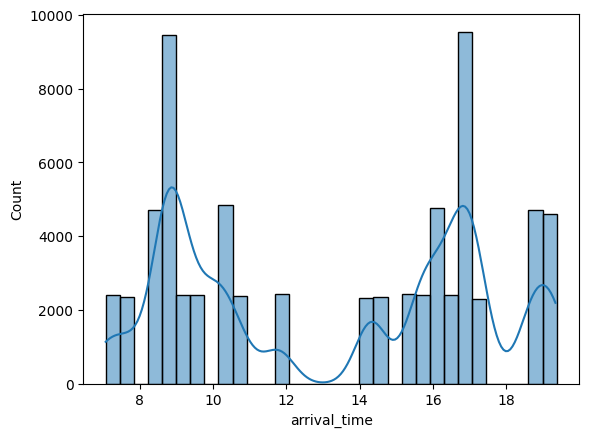

Como podemos fazer uma análise mais numérica dessas duas variáveis? Vamos utilizar a análise de correlação.

## Análise de correlação

A análise de correlação nos retorna um índice que varia de -1 a 1, onde -1 indica uma correlação negativa perfeita e significa que se uma variável cresce, a outra decresce na mesma proporção, ou seja, são inversas.

Já o 1 indica uma correlação positiva perfeita, que mostra que se uma variável cresce, a outra cresce na mesma proporção, ou se uma variável decresce, a outra decresce na mesma proporção. Então, vamos fazer essa análise para essas duas variáveis!

Primeiro, selecionamos as duas colunas que queremos:

In [ ]:
dados[['arrival_time', 'departure_time']]

,arrival_time,departure_time
0,8.885071,10.885071
1,8.939996,11.939996
2,18.635384,22.635384
3,15.967963,17.967963
4,16.571894,19.571894
...,...,...
71170,18.635384,22.635384
71171,16.718722,21.718722
71172,8.564949,13.564949
71173,9.344097,12.344097


(Trecho de tabela com total de 5 linhas e 36 colunas)

Faz sentido o flight_id (Identificador de Voo) estar no nosso conjunto de dados? Não faz sentido inserir um identificador para o modelo de Machine Learning no conjunto de dados.

Vamos remover a departure_time e temos outras três colunas, day, year e date. Por que não faz sentido termos essas três colunas no conjunto de dados? Porque não estamos fazendo análise de série temporal, não queremos prever, por exemplo, qual será o atraso em 2025.

Nós estamos interessados em fazer previsões pontuais para as amostras, então, não faz sentido ter essas três colunas referentes a datas no conjunto de dados. Sendo assim, vamos remover:

 - flight_id;

 - departure_time;

 - day;

 - year;

 - date.

E como removemos um conjunto de colunas no Pandas? O primeiro passo é selecionar o conjunto de dados que queremos. Pode ser dados ou df_encoded, vai dar na mesma.

In [ ]:
df_encoded[['arrival_time', 'departure_time']].corr()

,arrival_time,departure_time
arrival_time,1.000000,0.973797
departure_time,0.973797,1.000000


Executamos com o comando "Shift + Enter" para verificar se selecionamos corretamente. Ok, está correto! Para fazer a análise de correlação, o Pandas fornece um método: o .corr().

Executando essa célula com "Shift + Enter", percebemos que uma matriz foi retornada, onde arrival_time com arrival_time é 1, ela com ela mesma é 1, faz sentido, e arrival_time com departure_time é 0.97, que é muito próximo de 1.

Isso indica que a correlação está muito próxima de ser uma positiva perfeita. E isso nos dá a informação de que as duas colunas transmitem praticamente a mesma informação, então não faz sentido ter as duas. Vamos remover uma das duas e fica a nosso critério escolher qual remover.

Detectamos uma, mas existem mais. Vamos analisar de acordo com o nosso conjunto de dados.

In [ ]:
df_clean = df_encoded.drop(['flight_id', 'departure_time', 'day', 'year', 'date'], axis=1)
df_clean.head()

,schengen,arrival_time,is_holiday,delay,is_weekend,new_column,dia_da_semana,airline_BZ,airline_MM,airline_YE,...,origin_TCY,origin_TZF,origin_ZQO,day_name_Friday,day_name_Monday,day_name_Saturday,day_name_Sunday,day_name_Thursday,day_name_Tuesday,day_name_Wednesday
0,0,8.885071,0,70.205981,1,2010-0,4,0,1,0,...,1,0,0,1,0,0,0,0,0,0
1,0,8.939996,0,38.484609,1,2010-0,4,0,0,1,...,1,0,0,1,0,0,0,0,0,0
2,1,18.635384,0,2.388305,1,2010-0,4,1,0,0,...,0,1,0,1,0,0,0,0,0,0
3,0,15.967963,0,19.138491,1,2010-0,4,1,0,0,...,0,0,0,1,0,0,0,0,0,0
4,0,16.571894,0,15.016271,1,2010-0,4,1,0,0,...,0,0,0,1,0,0,0,0,0,0


Em seguida, precisamos indicar qual colunas queremos remover de df_encoded. Então, adicionamos .drop(), abrimos a lista e indicamos quais variáveis vamos remover:

Como queremos remover colunas, temos que passar o eixo das colunas, que no caso é axis=1.

In [ ]:
print(df_encoded.columns)

Index(['schengen', 'arrival_time', 'is_holiday', 'delay', 'is_weekend',
       'new_column', 'dia_da_semana', 'airline_BZ', 'airline_MM', 'airline_YE',
       'aircraft_type_Airbus A320', 'aircraft_type_Airbus A330',
       'aircraft_type_Boeing 737', 'aircraft_type_Boeing 777',
       'aircraft_type_Boeing 787', 'aircraft_type_Embraer E175', 'origin_AUZ',
       'origin_CNU', 'origin_CSF', 'origin_EMM', 'origin_FJB', 'origin_MWL',
       'origin_PUA', 'origin_TCY', 'origin_TZF', 'origin_ZQO',
       'day_name_Friday', 'day_name_Monday', 'day_name_Saturday',
       'day_name_Sunday', 'day_name_Thursday', 'day_name_Tuesday',
       'day_name_Wednesday'],
      dtype='object')


In [ ]:
df_encoded.drop(["is_holiday", "is_weekend"], axis=1, inplace=True)

Desta forma, conseguimos remover essas colunas do nosso conjunto de dados, mas não estamos atribuindo, precisamos atribuir a alguma coisa. Para isso, vou atribuir a um novo dataframe que chamaremos de df_clean. Ele será igual a df_encoded.drop.

In [ ]:
print(df_encoded.columns)


Index(['schengen', 'arrival_time', 'delay', 'new_column', 'dia_da_semana',
       'airline_BZ', 'airline_MM', 'airline_YE', 'aircraft_type_Airbus A320',
       'aircraft_type_Airbus A330', 'aircraft_type_Boeing 737',
       'aircraft_type_Boeing 777', 'aircraft_type_Boeing 787',
       'aircraft_type_Embraer E175', 'origin_AUZ', 'origin_CNU', 'origin_CSF',
       'origin_EMM', 'origin_FJB', 'origin_MWL', 'origin_PUA', 'origin_TCY',
       'origin_TZF', 'origin_ZQO', 'day_name_Friday', 'day_name_Monday',
       'day_name_Saturday', 'day_name_Sunday', 'day_name_Thursday',
       'day_name_Tuesday', 'day_name_Wednesday'],
      dtype='object')


In [ ]:
df_clean = df_encoded.copy()
df_clean.head()


,schengen,arrival_time,delay,new_column,dia_da_semana,airline_BZ,airline_MM,airline_YE,aircraft_type_Airbus A320,aircraft_type_Airbus A330,...,origin_TCY,origin_TZF,origin_ZQO,day_name_Friday,day_name_Monday,day_name_Saturday,day_name_Sunday,day_name_Thursday,day_name_Tuesday,day_name_Wednesday
0,0,8.885071,70.205981,2010-0,4,0,1,0,1,0,...,1,0,0,1,0,0,0,0,0,0
1,0,8.939996,38.484609,2010-0,4,0,0,1,1,0,...,1,0,0,1,0,0,0,0,0,0
2,1,18.635384,2.388305,2010-0,4,1,0,0,0,0,...,0,1,0,1,0,0,0,0,0,0
3,0,15.967963,19.138491,2010-0,4,1,0,0,0,1,...,0,0,0,1,0,0,0,0,0,0
4,0,16.571894,15.016271,2010-0,4,1,0,0,0,1,...,0,0,0,1,0,0,0,0,0,0


In [ ]:
# df_clean = df_encoded.drop(["flight_id", "departure_time", "day", "year", "date"], axis=1)
# df_clean.head(), não funcionou.

In [ ]:
df_clean = df_encoded.copy()
df_clean.head()

,schengen,arrival_time,delay,new_column,dia_da_semana,airline_BZ,airline_MM,airline_YE,aircraft_type_Airbus A320,aircraft_type_Airbus A330,...,origin_TCY,origin_TZF,origin_ZQO,day_name_Friday,day_name_Monday,day_name_Saturday,day_name_Sunday,day_name_Thursday,day_name_Tuesday,day_name_Wednesday
0,0,8.885071,70.205981,2010-0,4,0,1,0,1,0,...,1,0,0,1,0,0,0,0,0,0
1,0,8.939996,38.484609,2010-0,4,0,0,1,1,0,...,1,0,0,1,0,0,0,0,0,0
2,1,18.635384,2.388305,2010-0,4,1,0,0,0,0,...,0,1,0,1,0,0,0,0,0,0
3,0,15.967963,19.138491,2010-0,4,1,0,0,0,1,...,0,0,0,1,0,0,0,0,0,0
4,0,16.571894,15.016271,2010-0,4,1,0,0,0,1,...,0,0,0,1,0,0,0,0,0,0


Executando essa célula com "Shift + Enter", teremos conseguido eliminar as variáveis que não são importantes para o nosso problema.

## Conclusão

Com os dados tratados e transformados, é hora de seguir para o próximo passo, que é justamente a criação do modelo de Machine Learning. E é isso que faremos na próxima aula!

## Mão na massa: como utilizar o OneHotEncoder do Sklearn?

Existem algumas formas de realizar a codificação dummy das variáveis que são categóricas. Duas delas são usando o método get_dummies da biblioteca Pandas e o OneHotEncoder da biblioteca sklearn. Durante o curso, optamos pela primeira abordagem. Conforme o código abaixo:

In [ ]:
categorical_vars = ['airline', 'aircraft_type', 'origin', 'day_of_week']
df_encoded = pd.get_dummies(df, columns=categorical_vars, dtype=int)
df_encoded.head()

Agora é o momento de colocar em prática outra abordagem!

Aplique a codificação dummy no código da aula utilizando o OneHotEncoder do Scikit-Learn em vez do get_dummies da biblioteca pandas.

Dica: você pode consultar o artigo [get_dummies vs OneHotEncoder](https://): qual método escolher? para entender as diferenças entre get_dummies e OneHotEncoder.

## Opinião do instrutor

Para utilizar o OneHotEncoder ao invés do get_dummies da biblioteca Pandas podemos fazer da seguinte forma:

In [ ]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder

colunas_categoricas = ['airline', 'aircraft_type', 'origin', 'day_name']

one_hot_enc = make_column_transformer(
    (OneHotEncoder(handle_unknown = 'ignore'),
    colunas_categoricas),
    remainder='passthrough')

dados = one_hot_enc.fit_transform(dados)
dados = pd.DataFrame(dados, columns=one_hot_enc.get_feature_names_out())
dados

,onehotencoder__airline_BZ,onehotencoder__airline_MM,onehotencoder__airline_YE,onehotencoder__aircraft_type_Airbus A320,onehotencoder__aircraft_type_Airbus A330,onehotencoder__aircraft_type_Boeing 737,onehotencoder__aircraft_type_Boeing 777,onehotencoder__aircraft_type_Boeing 787,onehotencoder__aircraft_type_Embraer E175,onehotencoder__origin_AUZ,...,remainder__arrival_time,remainder__departure_time,remainder__day,remainder__year,remainder__is_holiday,remainder__delay,remainder__date,remainder__is_weekend,remainder__new_column,remainder__dia_da_semana
0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,8.885071,10.885071,1,2010,0,70.205981,2010-01-02,1,2010-0,4
1,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,8.939996,11.939996,1,2010,0,38.484609,2010-01-02,1,2010-0,4
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,18.635384,22.635384,1,2010,0,2.388305,2010-01-02,1,2010-0,4
3,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,15.967963,17.967963,1,2010,0,19.138491,2010-01-02,1,2010-0,4
4,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,16.571894,19.571894,1,2010,0,15.016271,2010-01-02,1,2010-0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71170,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,18.635384,22.635384,365,2022,1,25.677277,2023-01-01,1,2022-364,5
71171,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,16.718722,21.718722,365,2022,1,52.624348,2023-01-01,1,2022-364,5
71172,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,8.564949,13.564949,365,2022,1,56.16708,2023-01-01,1,2022-364,5
71173,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,9.344097,12.344097,365,2022,1,56.758844,2023-01-01,1,2022-364,5


Analisando o código acima passo a passo:

1 - from sklearn.compose import make_column_transformer

Este é um import do método make_column_transformer da biblioteca sklearn.compose. Este método é usado para aplicar transformações específicas a colunas específicas de um DataFrame.

2 - from sklearn.preprocessing import OneHotEncoder

Este é um import do OneHotEncoder da biblioteca sklearn.preprocessing. Este é o método que realmente realiza a codificação one-hot.

3 - colunas_categoricas = ['airline', 'aircraft_type', 'origin', 'day_name']

Aqui, estamos definindo uma lista de nomes de colunas que queremos transformar usando a codificação one-hot, que são as mesmas definidas utilizando o get_dummies.

4 - one_hot_enc = make_column_transformer((OneHotEncoder(handle_unknown = 'ignore'), colunas_categoricas), remainder='passthrough')

Aqui, estamos criando um ColumnTransformer que aplica o OneHotEncoder às colunas especificadas em colunas_categoricas. O argumento handle_unknown='ignore' significa que o OneHotEncoder ignorará quaisquer categorias desconhecidas que possam aparecer durante a transformação. O argumento remainder='passthrough' significa que qualquer coluna que não seja especificada para a transformação será passada através sem alterações.

5 - dados = one_hot_enc.fit_transform(dados)

Aqui, estamos aplicando a transformação ao DataFrame dados. O método fit_transform ajusta o transformador aos dados e, em seguida, transforma os dados.

6 - dados = pd.DataFrame(dados, columns=one_hot_enc.get_feature_names_out())

Aqui, estamos convertendo os dados transformados de volta para um DataFrame. Estamos também definindo os nomes das colunas para serem os nomes de recursos de saída do ColumnTransformer .

# Faça como eu fiz

Nesta aula, realizamos o feature engineering da base de dados sobre atrasos de voos. Feature engineering é o processo de selecionar, extrair e transformar variáveis (também conhecidas como features). Criamos três novas colunas (date, is_weekend e day_name). Logo após a criação das novas colunas, realizamos o feature encoding das variáveis categóricas e, por fim, realizamos a limpeza dos dados.

Agora, é a hora de você seguir o passo a passo realizado durante a aula.

Se surgirem perguntas, verifique o progresso do seu projeto ao selecionar Opinião da pessoa instrutora.

## Opinião do instrutor

1 - Vamos criar 3 novas colunas para o conjunto de dados date, is_weekend e day_name:

In [ ]:

# Coluna “date”
dados['date'] = pd.to_datetime(dados['year'].astype(str) + '-' + (dados['day'] + 1).astype(str), format='%Y-%j')

# Coluna “is_weekend”
dados['is_weekend'] = dados['date'].dt.weekday.isin([5, 6])

# Coluna “day_name”
dados['day_name'] = dados['date'].dt.day_name()


2 - O próximo passo é realizar o encoding das variáveis que são categóricas. Vamos transformar as variáveis categóricas binárias em 0 e 1, e para as demais variáveis categóricas, vamos utilizar o método get_dummies.

In [ ]:
variaveis_categoricas = ['airline', 'aircraft_type', 'origin', 'day_name']
df_encoded = pd.get_dummies(data=dados, columns=variaveis_categoricas, dtype=int)

3 - Por último, vamos limpar os dados. Para isso vamos remover as colunas 'flight_id', 'departure_time', 'day', 'year' e 'date' do conjunto de dados.

In [ ]:
df_clean = df_encoded.drop(['flight_id', 'departure_time', 'day', 'year', 'date'], axis=1)


# **<font color=green>Aula 03 - Treinamento do DummyRegressor</font>**

Já realizamos os tratamentos necessários para inserir nossos dados referentes a atrasos de voos em um modelo de machine learning. No entanto, antes de passarmos para a construção de modelos de machine learning mais complexos, o ideal é que tenhamos uma linha de base para comparar o desempenho desses modelos mais avançados.

Se estiverem inferiores a essa linha de base, descartamos e não os utilizamos. Se estiverem superiores, prosseguimos com o andamento da construção do pipeline de modelos de machine learning.

## Como construímos modelos de baseline para regressão?

Podemos fazer uso de um método, de uma classe que o Scikit-Learn já nos fornece, que é a DummyRegressor. Na página da DummyRegressor no site do Scikit-Learn, a documentação nos diz que ele é um regressor que faz previsões usando regras simples. Mais abaixo, a documentação avisa para não a utilizar para problemas reais, pois serve apenas para fins de comparação.

    O DummyRegressor não pode ser o nosso modelo final. Ele serve apenas para fins de comparação.

## Implementação

Vamos implementá-lo no Google Colab. A primeira coisa que devemos fazer ao construir modelos de machine learning é separar nossos dados em variáveis explicativas e a variável alvo. A nossa variável explicativa é chamada de X maiúsculo, que é igual a df_clean.drop(['delay'], axis=1).

O parâmetro de clean.drop() é a coluna alvo, pois queremos apenas usar as colunas explicativas. Assim, estamos passando o delay entre colchetes. Depois, inserimos axis=1, pois estamos especificando o eixo das colunas. Em seguida, selecionamos a nossa variável alvo y, que é apenas df_clean['delay']. Assim temos X e y separados.

Agora precisamos dividir nosso conjunto de dados entre treino e teste para treinar com os dados de treino e avaliar em dados não vistos, que são os dados de teste. Fazemos isso com o seguinte código:

## Seleção e validação do modelo

### Treinamento do DummyRegressor

In [ ]:
X = df_clean.drop(['delay'], axis=1)
y = df_clean['delay']

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

Com isso, os dados foram divididos. Podemos executar usando o atalho "Shift + Enter". Uma nova célula será criada logo abaixo. Após dividir os dados, criamos nosso DummyRegressor:

In [ ]:
from sklearn.dummy import DummyRegressor

model_dummy = DummyRegressor()
model_dummy.fit(X_train, y_train)

DummyRegressor()

Dentre os parâmetros possíveis para o DummyRegressor, temos média, mediana, quartil e constante. O parâmetro padrão é a média. A documentação nos diz que ao usarmos a média como estratégia, ele sempre fará a predição pela média do conjunto de treinamento. Em model_dummy.fit, realizamos o ajuste com os dados de treinamento X_train e y_train.

Executamos a célula com "Shift + Enter" e, sem erros, o modelo está ajustado. Agora, precisamos fazer previsões para os dados de teste e comparar com os dados reais, utilizando a função predict.

In [ ]:
y_pred_dummy = model_dummy.predict(X_test)

O parâmetro de model_dummy.predict serão as variáveis explicativas de teste, visto que é com base nelas que as previsões precisam ser feitas. Se analisarmos o que veio de retorno, perceberemos o valor 12.52857512 para todas as amostras. Essa é a média do conjunto de treinamento.

    Atenção: Para rodar o código abaixo usando o parâmetro squared='False' normalmente, é preciso instalar a versão anterior do scikit-learn. Pois na versão atual está absoleto. O comando é: !pip install scikit-learn==1.3.2. Após executar, reinicie e execute o notebook novamente.

O próximo passo é avaliar o quão bem nosso modelo está se ajustando. Para isso, precisamos de métricas. Deixamos um código pré-pronto para não digitarmos tanto:

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

def calcular_metricas_regressao(y_test, y_pred):

    rmse = mean_squared_error(y_test, y_pred, squared=False)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    metricas = {
        'Raiz do Erro Quadrático Médio': round(rmse, 4),
        'Erro Absoluto Médio': round(mae, 4),
        'R2 Score': round(r2, 4)
    }

    return metricas


In [ ]:
calcular_metricas_regressao(y_test, y_pred_dummy)

{'Raiz do Erro Quadrático Médio': 23.2241,
 'Erro Absoluto Médio': 18.6127,
 'R2 Score': -0.0}

Na primeira linha, fazemos a importação dos métodos. Em seguida, definimos a função calcular_metricas_regressao() com os parâmetros y_test, as respostas verdadeiras definidas em train_test_split() e o y_pred, ou seja, as respostas previstas pelo modelo.

Estamos definindo três métricas: rmse, igual a mean_squared_error(y_test, y_pred, squared=False). a mean_squared_error seria o mse. O seu parâmetro padrão é squared=True. Conforme a documentação desse método, quando squared é verdadeiro, é retornado o MSE. Se ele for falso, retorna-se o RMSE. Já que nos interessa o RMSE, o parâmetro deve ser falso.

Deixamos uma atividade abaixo deste vídeo detalhando cada métrica.

Em seguida, estamos criando um dicionário com a Raiz do Erro Quadrático Médio, o Erro Absoluto Médio e o R2 Score, todos com o RMSE arredondado para quatro casas decimais. Por fim, retornamos o dicionário metricas.

Copiaremos a função calcular_metricas_regressao(y_test, y_pred) e a inseriremos em uma nova célula. Modificaremos o último parâmetro para y_pred_dummy e, ao executá-la, obteremos as métricas do nosso modelo.

Isso significa que o nosso modelo está errando, em média, por 23 minutos, quando faz as previsões. O R2 é o mais fácil de ser alcançado, estando em zero nesse momento. Modelos mais complexos provavelmente vão ultrapassar esse valor, mas não podemos olhar apenas para uma métrica, precisamos considerar várias.

Agora, o objetivo é criar modelos mais complexos que superem essas métricas.

# Para saber mais: métricas utilizadas em regressão

Durante o vídeo, foram apresentadas algumas das métricas mais comuns para avaliar modelos de regressão, como RMSE, MAE e R2. Juntamente com essas métricas, existem diversas outras que podem ser bastante úteis durante a avaliação de um modelo de regressão. Abaixo você poderá encontrar algumas das métricas mais utilizadas e suas traduções em português:

 - Mean squared error - MSE (Erro Quadrático Médio);

 - Mean absolute error - MAE (Erro Absoluto Médio);

 - Root Mean Squared Error - RMSE (Raiz Quadrada do Erro Quadrático Médio);

 - Mean Squared Logarithmic Error - MSLE (Erro Logarítmico Quadrático Médio); e

 - Mean Absolute Percentage Error - MAPE (Percentual do Erro Absoluto Médio).

## Mean squared error - MSE

O Mean Squared Error (MSE), ou Erro Quadrático Médio, é uma métrica amplamente utilizada para avaliar a performance de um modelo de aprendizado de máquina. Essa métrica calcula a média dos erros quadrados, onde cada erro é a diferença entre o valor previsto pelo modelo e o valor real. A elevação ao quadrado dá maior peso aos erros maiores, o que pode ser útil quando esses erros são particularmente indesejáveis. O MSE é definido matematicamente como:

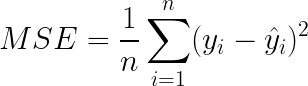

Nesta fórmula, "n" representa o número de observações ou amostras, "y_i" é o valor real da i-ésima observação e "ŷ_i" é o valor predito para a i-ésima observação. O MSE é calculado tomando a diferença entre os valores reais e os valores preditos, elevando ao quadrado, somando todas essas diferenças ao quadrado e, em seguida, dividindo pelo número de observações "n".

Para avaliar a qualidade de um modelo usando o MSE, quanto mais próximo de 0 for o valor do MSE, melhor o modelo está em prever os valores desejados. Isso ocorre porque um MSE de 0 indica que não há diferença entre os valores previstos e os valores reais, ou seja, o modelo está fazendo previsões perfeitas.

Embora o MSE seja uma métrica útil, vale a pena mencionar que ele tem a desvantagem de dar mais peso aos outliers devido ao quadrado de cada termo. Isso pode ser indesejável em muitos casos, levando os pesquisadores a usar alternativas, como o erro absoluto médio (MAE).

A documentação do scikit-learn possui informações que oferecem mais alguns detalhes a respeito dessa métrica em “mean_squared_error”.

## Mean absolute error - MAE

O Erro Absoluto Médio (MAE) é uma medida de erro comum utilizada em modelos de regressão. Ela é calculada tomando a média dos valores absolutos dos erros. Em outras palavras, para cada ponto de dados, nós primeiro calculamos o erro (a diferença entre o valor predito e o valor real), tomamos o valor absoluto desse erro (para garantir que todos os erros sejam positivos), e então calculamos a média de todos esses erros absolutos. O MAE é definido como:

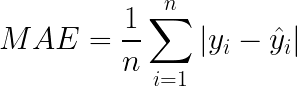

Nesta equação, "n" representa o número de observações ou amostras, "y_i" é o valor real da i-ésima observação e "ŷ_i" é o valor predito para a i-ésima observação. O MAE é calculado tomando a diferença absoluta entre os valores reais e os valores preditos para todas as observações, somando essas diferenças absolutas e, em seguida, dividindo pelo número de observações "n".

A MAE é semelhante à Métrica do Erro Quadrático Médio (MSE), mas ao invés de elevar os erros ao quadrado, ela simplesmente toma o valor absoluto dos erros. Isso faz com que a MAE seja menos sensível a outliers do que a MSE, pois erros grandes não são amplificados pelo quadrado.

Ao avaliar modelos de regressão com a MAE, um valor menor indica um modelo mais preciso. Em outras palavras, quanto menor o MAE, melhor o modelo é em prever o valor correto para novos dados. A MAE possui um limite inferior de 0, que indica um modelo perfeito (ou seja, todas as previsões são exatas).

Vale ressaltar que, embora a MAE seja uma métrica útil, ela não deve ser a única métrica utilizada para avaliar a performance de um modelo de regressão. Outras métricas, como o MSE, a Raiz Quadrada do Erro Quadrático Médio (RMSE), e o Coeficiente de Determinação (R2), também devem ser consideradas para obter uma avaliação completa da capacidade de um modelo de fazer previsões precisas.

A documentação do scikit-learn oferece mais detalhes sobre essa métrica em “MAE”.

## Root Mean Squared Error - RMSE

A Raiz Quadrada do Erro Quadrático Médio (RMSE) é uma métrica de avaliação comumente usada em modelos de regressão, que é essencialmente a raiz quadrada do MSE (Erro Quadrático Médio). O RMSE é calculado tirando a raiz quadrada da média dos erros quadráticos, que são as diferenças entre os valores previstos e os valores reais, elevadas ao quadrado. Matematicamente o RMSE é definido como:

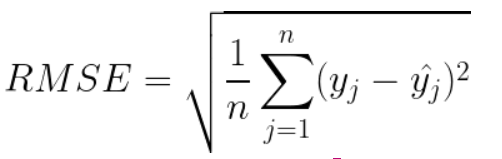

Onde:

 - n é o número de amostras;

 - Ŷ_j é a previsão do modelo para a amostra j;

 - Y_j é a valor real para amostra j.

O RMSE é uma medida da dispersão dos resíduos (erros de previsão) e, assim como o MSE, penaliza erros maiores de forma mais severa que erros menores, devido ao fato de elevar ao quadrado as diferenças. Isso o torna particularmente sensível a grandes erros.

Um valor menor de RMSE indica um ajuste melhor do modelo aos dados, ou seja, as previsões do modelo estão mais próximas dos valores reais. É importante ressaltar que, embora o RMSE seja uma métrica útil, ele não deve ser a única métrica considerada ao avaliar a qualidade de um modelo de regressão.

Você pode acessar a documentação do scikit-learn para saber mais sobre essa métrica: metrics.mean_squared_error .

Mean Squared Logarithmic Error - MSLE
O Erro Logarítmico Quadrático Médio é uma métrica de avaliação usada em problemas de previsão onde a escala dos valores alvo ou das previsões varia significativamente e os erros relativos são mais importantes do que os erros absolutos. O MSLE mede o erro médio quadrático entre os logaritmos naturais dos valores reais e os logaritmos naturais das previsões. Matematicamente pode-se definir MSLE da seguinte forma:

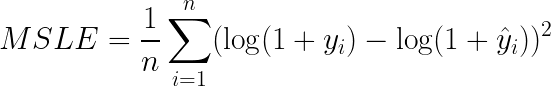

Onde o "n" representa o número de observações ou amostras, "y_i" é o valor real da i-ésima observação e "ŷ_i" é o valor previsto para a i-ésima observação. O MSLE é calculado tomando o logaritmo natural dos valores reais e previstos somados a 1, calculando a diferença entre esses logaritmos, elevando ao quadrado, somando todas essas diferenças ao quadrado e, em seguida, dividindo pelo número de observações "n".

O principal ponto de foco dessa métrica é medir a diferença relativa entre os valores esperados e os preditos pelo modelo, ou seja, verifica a diferença percentual entre eles. De modo que, pequenas diferenças entre valores pequenos são tratados igualmente a grandes diferenças entre valores grandes, diferentemente do que acontece no MSE, como mostrado no exemplo:

| *Valores Verdadeiros* | *Valores Preditos* | *MSE* | *MSLE* |
| ----------------------- | -------------------- | ------- | -------- |
| 50 | 40 | 100.0 | 0.047634 |
| 50000 | 40000 | 100000000.0 | 0.049790 |

sso nos mostra que as grandes diferenças entre os valores reais e preditos tem pouca variação no resultado final da métrica. Portanto, essa métrica é mais utilizada quando não desejamos que grandes erros sejam significativamente mais penalizados que erros pequenos.

Para saber mais sobre essa métrica e como utilizá-la você pode acessar a documentação do scikit-learn: [metrics.mean_squared_log_error](https://).

## Mean Absolute Percentage Error - MAPE

O Mean Absolute Percentage Error é bem similar ao Mean Absolute Error - MAE, com a diferença de que ele mede a precisão como uma porcentagem e pode ser calculado como a porcentagem do MAE para cada amostra. O MAPE é muito utilizado em problemas de regressão pois traz uma interpretação bem intuitiva quanto ao erro relativo. A definição do MAPE é:

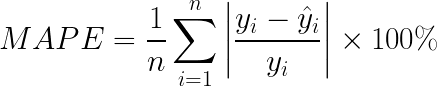

Onde, "n" representa o número de observações ou amostras, "y_i" é o valor real da i-ésima observação, "ŷ_i" é o valor previsto para a i-ésima observação, e o MAPE é calculado como a média das porcentagens absolutas das diferenças entre os valores reais e os valores previstos em relação aos valores reais. O resultado é multiplicado por 100% para expressar o erro como uma porcentagem.

O MAPE é frequentemente usado como uma métrica de erro para avaliar a precisão das previsões em problemas de previsão e é expresso como uma porcentagem do erro médio absoluto em relação aos valores reais. Para saber mais sobre essa métrica e como utilizá-la você pode acessar a documentação do scikit-learn: metrics.mean_absolute_percentage_error.

Se desejar saber mais sobre essas métricas, você pode ler o artigo Métricas de avaliação para séries temporais.

# Mãos na massa: outras estratégias para o DummyRegressor

Conforme indicado na [documentação](https://), observamos que existem várias abordagens disponíveis para implementar o DummyRegressor por meio do parâmetro 'strategy'. Durante o curso, optamos pela estratégia 'mean (média)', na qual a saída corresponde à média do conjunto de dados utilizado para o treinamento. Entretanto, até o momento, não exploramos as demais estratégias disponíveis.

Diante disso sugerimos que você teste as outras estratégias presentes no parâmetro strategy do [DummyRegressor](https://).

## Opinião do instrutor

Resposta:

Para avaliar os modelos precisamos utilizar algumas métricas, portanto, vamos utilizar a função definida durante o curso:

In [5]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

def calcular_metricas_regressao(y_test, y_pred):

    rmse = mean_squared_error(y_test, y_pred, squared=False)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    metricas = {
        'Raiz do Erro Quadrático Médio': round(rmse, 4),
        'Erro Absoluto Médio': round(mae, 4),
        'R2 Score': round(r2, 4)
    }

    return metricas

Para calcular as métricas de acordo com as diferentes estratégias, um exemplo de código é descrito abaixo:

In [7]:
from sklearn.dummy import DummyRegressor

estrategias = ["mean", "median", ("quantile", 0.25), ("constant", 10.0)]

resultados = {}

for estrategia in estrategias:
    if isinstance(estrategia, tuple):
        estrategia, valor = estrategia
        if estrategia == "quantile":
            model_dummy = DummyRegressor(strategy=estrategia, quantile=valor)
        else:
            model_dummy = DummyRegressor(strategy=estrategia, constant=valor)
    else:
        model_dummy = DummyRegressor(strategy=estrategia)

    model_dummy.fit(X_train, y_train)

    y_pred_dummy = model_dummy.predict(X_test)

    metricas = calcular_metricas_regressao(y_test, y_pred_dummy)

    resultados[estrategia] = metricas

for estrategia, metricas in resultados.items():
    print(f"Estratégia: {estrategia}")
    for metrica, valor in metricas.items():
        print(f"{metrica}: {valor}")
    print("\n")

Estratégia: mean
Raiz do Erro Quadrático Médio: 23.2124
Erro Absoluto Médio: 18.625
R2 Score: -0.0001

Estratégia: median
Raiz do Erro Quadrático Médio: 23.4093
Erro Absoluto Médio: 18.5151
R2 Score: -0.0171

Estratégia: quantile
Raiz do Erro Quadrático Médio: 28.8715
Erro Absoluto Médio: 22.1284
R2 Score: -0.5472

Estratégia: constant
Raiz do Erro Quadrático Médio: 23.3724
Erro Absoluto Médio: 18.5142
R2 Score: -0.0139

O DummyRegressor é uma classe do scikit-learn que permite a criação de um modelo simples de referência (ou baseline) para comparação com modelos mais complexos. Este modelo não leva em consideração os dados de entrada e faz previsões com base em uma estratégia simples especificada.

As estratégias utilizadas neste código são: "mean", "median", ("quantile", 0.25), ("constant", 10.0). Cada uma dessas estratégias define como o DummyRegressor faz suas previsões:

 - "mean": prevê a média dos valores de treinamento.

 - "median": prevê a mediana dos valores de treinamento.

 - "quantile": prevê um quantil específico dos valores de treinamento. No caso deste código, o quantil 0.25 é usado.

 - "constant": prevê um valor constante especificado. No caso deste código, o valor 10.0 é usado.

O código percorre cada uma dessas estratégias em um loop, treinando um DummyRegressor com a estratégia correspondente e avaliando seu desempenho usando um conjunto de métricas de regressão. As métricas são calculadas pela função calcular_metricas_regressao.

Os resultados são armazenados em um dicionário, onde a chave é a estratégia utilizada e o valor é um outro dicionário contendo as métricas calculadas. Por fim, o código imprime os resultados para cada estratégia.

### Treinamento e avaliação do RandomForestRegressor

Realizamos o treinamento do nosso modelo dummy, que vai servir de baseline para modelos mais complexos. Chegou o momento de desenvolvermos esses modelos complexos.

Além de como os avaliamos pelas métricas, como podemos desenvolvê-los e como avaliá-los graficamente? O primeiro passo que temos que fazer é escolher um modelo para realizar o seu treinamento para fazer essa comparação. E o modelo que vamos escolher é o Random Forest Regressor. Abriremos a página da documentação do Scikit-Learn do Random Forest Regressor. E esse vai ser o modelo que vamos escolher.

## Implementação

E como podemos implementá-lo aqui no nosso Google Colab?

A primeira coisa que temos que fazer é o seu fit. Mas como no Scikit-Learn praticamente todos os modelos são treinados de forma semelhante, copiaremos o que já fizemos e mudaremos apenas algumas coisas.

Então, copiamos o código que usamos para fazer o ajuste do dummy regressor:

In [8]:
from sklearn.ensemble import RandomForestRegressor

model_rf = RandomForestRegressor(max_depth=5, random_state=42)
model_rf.fit(X_train, y_train)
y_pred_rf = model_rf.predict(X_test)
calcular_metricas_regressao(y_test, y_pred_rf)

Saída: {'Raiz do Erro Quadrático Médio': 13.7301,
 'Erro Absoluto Médio': 11.0138,
 'R2 Score': 0.6505}

Também vamos copiar o código de quando fizemos as previsões para os dados de teste, colocamos o y_pred para ele e o y_pred_dummy, copiamos essa parte também.

E a última parte que vamos copiar é quando calculamos as métricas, utilizando a função que definimos anteriormente.

Agora vamos às modificações. A primeira modificação é o import. Estamos importando o dummy regressor. Então, acessaremos a página da documentação do Scikit-Learn para o Random Forest Regressor, copiaremos esse título maior e o colaremos onde fizemos as cópias dos códigos. Então, colocaremos from sklearn.ensemble, porque o Random Forest é um modelo ensemble, import RandomForestRegressor.

Outra coisa que temos que fazer é, ao invés de instanciar o dummy regressor, instanciarmos o Random Forest Regressor. E estamos colocando o model_dummy. Então, o que vamos fazer? Onde tiver a palavra dummy, vamos substituir por rf de Random Forest.

Selecionaremos a palavra dummy de y_pred_dummy, utilizaremos o atalho "Ctrl + Shift + L", que vai selecionar todas as ocorrências na célula de código, e substituiremos por rf. Dessa forma, mudamos todas as variáveis que possuíam o nome dummy. Podemos, então, executar essa célula com "Shift + Enter".

Executando essa célula, recebemos um erro. Isso aconteceu porque esquecemos de abrir o parêntese aqui no Random Forest Regressor.

In [9]:
from sklearn.ensemble import RandomForestRegressor

model_rf = RandomForestRegressor()
model_rf.fit(X_train, y_train)
y_pred_rf = model_rf.predict(X_test)
calcular_metricas_regressao(y_test, y_pred_rf)

Além dos parênteses, vamos colocar alguns parâmetros no RandomForestRegressor(). Se observarmos a documentação, temos um parâmetro chamado max_depth. Se não setarmos esse parâmetro max_depth, o que pode acontecer é termos um overfitting no nosso modelo. Ou seja, ele se ajusta demais nos dados de treinamento, mas quando vai para os dados de teste, os dados do mundo real, ele não consegue generalizar bem.

Então, é uma prática recomendada sempre setar esse max_depth. Então, vamos fazer isso também. Vamos copiar o parâmetro da documentação e vamos colocá-lo inicialmente com o valor de 5.

Podemos setar também o random_state. Vamos colocar aquele mesmo valor que obtivemos anteriormente para ele, que é 42. Vamos setar somente esses dois parâmetros aqui para o RandomForestRegressor. Executaremos usando o atalho "Shift + Enter" novamente e vamos aguardar finalizar o nosso ajuste.

In [10]:
from sklearn.ensemble import RandomForestRegressor

model_rf = RandomForestRegressor(max_depths=5, random_state=42)
model_rf.fit(X_train, y_train)
y_pred_rf = model_rf.predict(X_test)
calcular_metricas_regressao(y_test, y_pred_rf)

Ao finalizar o ajuste, percebemos que o R2 do modelo dummy era zero. Aqui apresentou 0.65. Então, já é muito maior, visto que esse valor varia de 0 a 1. Então, quanto mais próximo de 1, melhor é o modelo.

Outra coisa que percebemos é que a raiz do erro quadrático médio está em 13.73. Isso significa que, em média, ele erra 13 minutos nas nossas previsões de voos. Já é uma redução bastante interessante do nosso modelo dummy, que apresentou 23 minutos.

O erro absoluto médio no dummy era 18.61. E aqui ficou apenas em 11. Então, já temos um modelo que está se comportando melhor do que a nossa baseline. Mas como interpretar isso graficamente? Até agora, só interpretamos com esses valores numéricos.

## Interpretação gráfica dos dados

Para fazer isso, vamos usar uma biblioteca chamada Yellowbrick, que já fornece para nós alguns gráficos prontos para utilizarmos para analisar modelos de regressão.

## Gráfico de Previsão de Erro

O primeiro gráfico que vamos utilizar é o Prediction Error Plot, que vai plotar os erros de previsões. E aqui na documentação, se descermos um pouco, vai ter um quick method para implementarmos isso aqui de forma rápida.

Copiaremos esse código que tem na documentação e o colaremos no Google Colab. Após colá-lo, temos que fazer algumas modificações. Vamos analisar o que faz sentido termos.

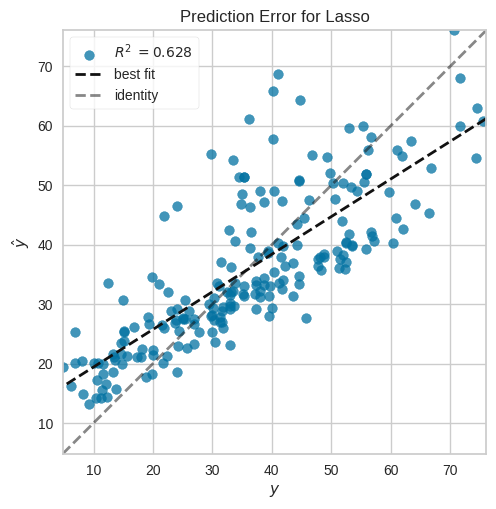

In [11]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split

from yellowbrick.datasets import load_concrete
from yellowbrick.regressor import prediction_error

# Load a regression dataset
X, y = load_concrete()

# Create the train and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Instantiate the linear model and visualizer
model = Lasso()
visualizer = prediction_error(model, X_train, y_train, X_test, y_test)

Faz sentido termos um modelo Lasso? Não, já temos um modelo próprio. Então, vamos excluir a primeira célula com o "Ctrl + Shift + K". Faz sentido termos um train_test_split? Não, porque já fizemos isso. Então, excluiremos também essa célula com o atalho "Ctrl + Shift + K".

Faz sentido termos um conjunto de dados para analisar? Não, já temos nosso próprio conjunto de dados, que é relacionado aos atrasos de voo. Excluiremos essa parte também. E faz sentido termos esse import do PredictionError, que é o nosso plot? Faz sentido, porque é o que queremos plotar.

Então, vou excluir essas outras linhas, onde ele está atribuindo, carregando o conjunto de dados, fazendo o Train Test Split e instanciando o modelo. Fica apenas com uma linha, que é visualizer = prediction_error(model). Qual é o nosso modelo? É o model_rf, Random Forest.

O segundo parâmetro é o X_train, o terceiro, o y_train, e depois X_test e y_test, como definimos no Train Test Split.

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


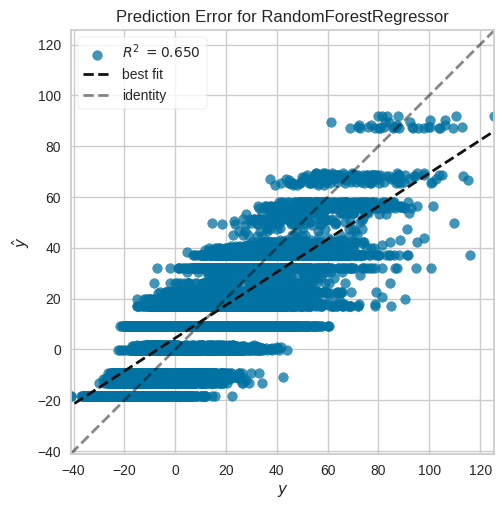

In [ ]:
from yellowbrick.regressor import prediction_error

visualizer = prediction_error(model_rf, X_train, y_train, X_test, y_test)

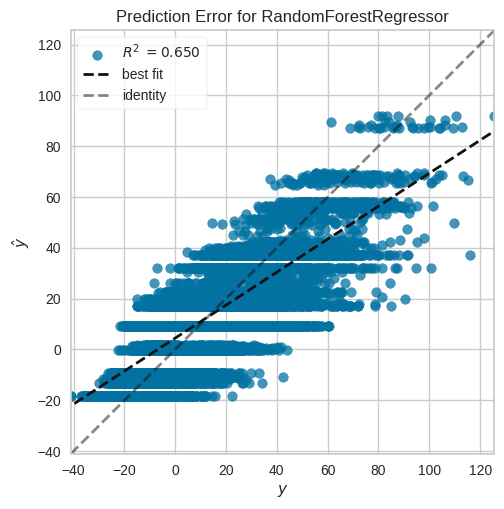

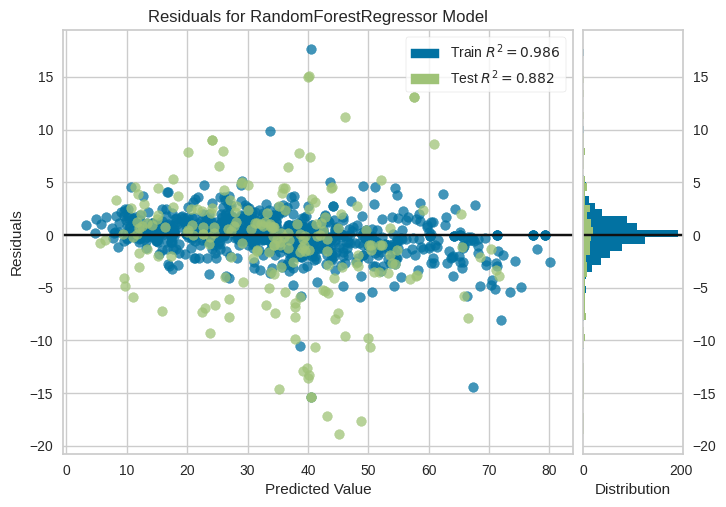

In [12]:
from yellowbrick.regressor import residuals_plot

viz = residuals_plot(model_rf, X_train, y_train, X_test, y_test)

Executaremos essa célula com "Shift + Enter". O que é retornado para nós é justamente um gráfico de erro de previsão. No eixo horizontal, está a nossa variável alvo, a nossa variável real, onde tem os valores variando de menos 40 a 120, e no eixo vertical, está a previsão.

O ideal é que todas as amostras ficassem na linha de identidade, que é a linha mais clara que corta o nosso gráfico na diagonal. Quando isso acontece, significa que todas as variáveis que eram reais foram previstas corretamente. Por exemplo, o valor era 20, foi predito 20. O valor era 60, foi previsto 60 pelo modelo.

O ideal é que isso acontecesse. Quando isso não acontece, está muito espalhado, o que significa que o nosso modelo está ruim. Analisando o nosso caso, ele colocou inclusive o nosso R² de 0.65. Percebemos que há uma certa variabilidade, os dados estão um pouco distantes dessa nossa curva de ajuste, do nosso best fit, mas não estão tão distantes assim.

Eles estão, de certa forma, até concentrados ali na nossa reta. Isso indica que o nosso modelo está prevendo bem os dados. Ele não está errando tanto assim. Se os dados estivessem muito dispersos, isso significaria que o nosso modelo não está legal. Teríamos que fazer uma modificação, tratar melhor os dados ou procurar outro modelo para melhor se ajustar.

## Gráfico de Resíduos

Com esse gráfico de previsão, conseguimos analisar como estão sendo esses erros. Outro gráfico que podemos utilizar é o gráfico de resíduos, o Residuals Plot. Ele vai fornecer justamente um gráfico de resíduos e um histograma mostrando essa distribuição dos resíduos.

    Resíduo é o erro de previsão, o valor previsto menos o valor real.

Então, vamos procurar esse quick method na documentação do Residuals Plot também, vamos copiar e colar em uma nova célula de código.

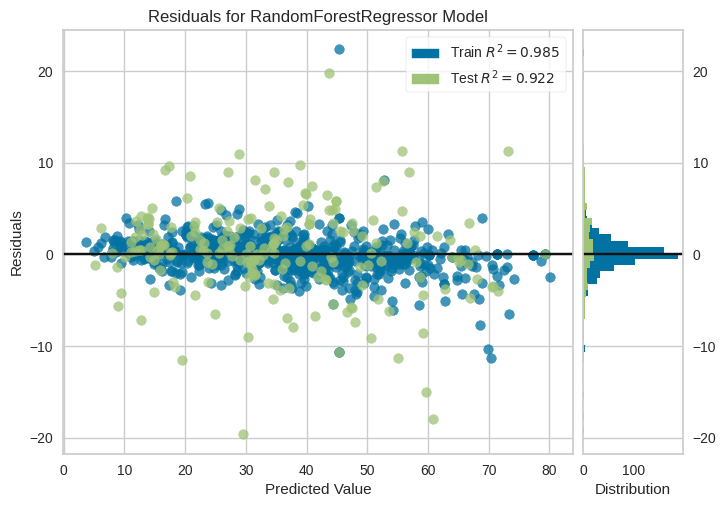

In [13]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split as tts

from yellowbrick.datasets import load_concrete
from yellowbrick.regressor import residuals_plot

# Load the dataset and split into train/test splits
X, y = load_concrete()

X_train, X_test, y_train, y_test = tts(X, y, test_size=0.2, shuffle=True)

# Create the visualizer, fit, score, and show it
viz = residuals_plot(RandomForestRegressor(), X_train, y_train, X_test, y_test)

Temos que fazer novamente aquelas mudanças necessárias. Faz sentido importarmos o Random Forest novamente? Já importamos, já inclusive fizemos o ajuste. Apagaremos o train_test_split, a importação do dataset que ele está trabalhando no exemplo e o carregamento, transformação em train_test_split e a de comentário.

Então, ficamos apenas com viz = residuals_plot, abre parênteses, RandomForestRegressor, que é o modelo, só que já temos o nosso próprio modelo, que é model_rf. Passamos X_train, depois y_train, depois X_test, depois y_test.

In [15]:
from yellowbrick.regressor import residuals_plot

viz = residuals_plot(model.rf, X_train, y_train, X_test, y_test)

Ao executarmos o código, será plotado aqui para nós um gráfico de resíduos.


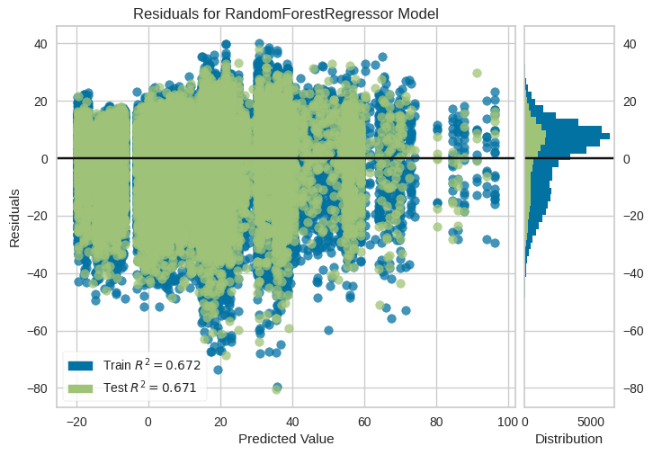

## Como interpretar o gráfico de resíduos?

Para o primeiro gráfico, à esquerda, os valores devem estar distribuídos aleatoriamente em torno da linha 0. Quanto mais distribuídos aleatoriamente em torno dessa linha, melhor é o modelo.

Se os dados estiverem muito concentrados nessa linha, isso significa que o modelo deve ser repensado. No nosso caso, percebemos que está bem distribuído aleatoriamente: Temos pontos mais abaixo do gráfico, outros mais acima, uns mais à direita, uns mais à esquerda e assim por diante.

O gráfico que está à direita, é um histograma de resíduos. Já sabemos como interpretar um histograma, mas, para esse, o ideal é que ele esteja distribuído o mais uniformemente possível em torno do 0.

Se estiver muito assimétrico à esquerda e muito assimétrico à direita, isso significa que o nosso modelo não está legal. Isso porque o resíduo é a diferença entre o valor previsto e o valor real. Se estiver mais próximo do 0, significa que o nosso modelo está acertando mais, está tendo mais assertividade nas respostas, ou chegando o mais próximo possível da resposta. Então, como o nosso gráfico está, de certa forma, até bem próximo da distribuição normal, isso significa que o modelo está se adequando bem aos nossos dados.

Conseguimos, então, construir um modelo mais complexo que o modelo dummy criado e conseguimos avaliá-lo graficamente, assim como nas métricas. Só surge um pequeno detalhe: Corremos o risco de termos ajustado bem os nossos dados para aquela parcela dos dados que dividimos para treino e estarmos avaliando bem aquela parcela dos dados de teste.

Ou seja, corremos o risco de ter um viés daquela parcela dos dados de treino ter sido adequada para o nosso treinamento e a parcela de dados de teste também ter sido adequada para fazer essa avaliação. Como não queremos depender de sorte de ter dividido bem esses dados, temos que validar esse modelo. E esse é o nosso próximo passo.

## Overfitting no RandomForestRegressor

Você é uma pessoa cientista de dados em uma empresa de consultoria financeira e foi solicitado a desenvolver um modelo para prever o preço de ações de uma empresa de tecnologia com base em várias características financeiras e econômicas. Você decidiu utilizar o modelo de regressão Random Forest para criar essa previsão.

Qual das seguintes afirmações sobre o uso do modelo RandomForestRegressor nesta tarefa é correta?

 - O risco de overfitting aumenta consideravelmente quando a profundidade máxima (max_depth) das árvores de decisão é exageradamente aumentada.


O aumento excessivo da profundidade máxima das árvores de decisão no modelo RandomForestRegressor pode torná-lo suscetível ao overfitting. Por isso, é uma boa prática definir o valor do parâmetro max_depth ao trabalhar com modelos baseados em árvores.

 - A combinação de várias árvores de decisão em um ensemble ajuda a reduzir o overfitting, tornando o modelo mais robusto em relação a esse problema.


O modelo RandomForestRegressor é robusto em relação ao overfitting devido à natureza de ensemble dos modelos de árvores de decisão, que reduz o overfitting por meio da média de várias árvores de decisão. Para conhecer mais sobre os modelos ensemble conferir o artigo “Machine Learning: conhecendo as técnicas de bagging e boosting

## Realizando a validação cruzada

Conseguimos construir um modelo melhor do que o nosso Dummy e o avaliamos tanto nas métricas quanto graficamente. Porém, ao final desse processo, surgiu a seguinte dúvida: e se os dados estiverem funcionando bem apenas para aquelas parcelas específicas de dados que dividimos? Ou seja, está indo bem para os dados de treino e de teste, mas isso é específico dessas duas parcelas? Para resolver esse problema, temos a validação cruzada, ou cross-validation, em inglês. Vamos entendê-la.

Abrindo a d[ocumentação da SKlearn sobre cross-validation](https://), temos acesso uma imagem que ilustra bem esse conceito.

| *Split* | *Folds* | *Objetivo* |
| --------- | --------- | ------------ |
| Split 1 | Fold 1, Fold 2, Fold 3, Fold 4, Fold 5 | Finding Parameters |
| Split 2 | Fold 1, Fold 2, Fold 3, Fold 4, Fold 5 | Finding Parameters |
| Split 3 | Fold 1, Fold 2, Fold 3, Fold 4, Fold 5 | Finding Parameters |
| Split 4 | Fold 1, Fold 2, Fold 3, Fold 4, Fold 5 | Finding Parameters |
| Split 5 | Fold 1, Fold 2, Fold 3, Fold 4, Fold 5 | Finding Parameters |
| *Final* | *Test data* | *Final evaluation* |

Temos todo o conjunto de dados e a divisão entre Training data e Test data, que são os dados de treino e os dados de teste, como dividimos no train-test-split. Mais abaixo, quando realizamos a validação cruzada, os nossos dados de treinamento serão divididos em folds, ou seja, em dobras. Neste exemplo, utiliza-se cinco.

Então, serão divididos em cinco dobras, onde quatro dessas parcelas serão separadas para treino e a última que sobrou será usada para avaliar, ou seja, está dividindo igualmente as dobras.

Quando vai para o segundo split, para a segunda divisão, será novamente dividido em cinco, só que agora as parcelas que estão separadas para treino e para avaliar o modelo são diferentes. Por exemplo, no primeiro split, era o primeiro fold. No segundo, já é o segundo fold, enquanto o resto fica para treinamento do modelo. Então, esse é o conceito de validação cruzada, e é isso que vamos implementar.

Voltando ao Google Colab, implementamos o seguinte código:

In [16]:
from sklearn.model_selection import KFold, cross_validate

scoring = {
    'mae': 'neg_mean_absolute_error',
    'rmse': 'neg_root_mean_squared_error',
    'r2': 'r2'
}

cv = KFold(n_splits=5, shuffle=True, random_state=42)

cv_results = cross_validate(model_rf, X_train, y_train, cv=cv, scoring=scoring)
cv_results

{'fit_time': array([0.40622354, 0.41483378, 0.39588165, 0.40081763, 0.40731692]),
 'score_time': array([0.01431847, 0.01498389, 0.01401663, 0.01533842, 0.01429081]),
 'test_mae': array([-3.69012054, -3.14439558, -3.84920406, -3.70869747, -3.84850401]),
 'test_rmse': array([-5.20954463, -4.6640868 , -5.6468221 , -5.50369332, -5.0480921 ]),
 'test_r2': array([0.88586664, 0.92295347, 0.87425776, 0.88816976, 0.91301174])}

Na primeira linha, from sklearn.model_selection import KFold, cross_validate, estamos importando os dois métodos que precisamos para fazer essa validação cruzada. Em seguida, definimos o dicionário de scoring das métricas que queremos, que no caso são mae, rmsee r2.

Aqui, é importante estar atento a um detalhe aqui que visualizaremos mais para frente: a mae está como neg_mean_absolute_error; a rmse também está como neg_root_mean_squared_error; e r2 está simplesmente como r2. Esse neg é de negativo. Os recursos de validação cruzada do SKlearn esperam uma função de utilidade, ou seja, quanto maior, melhor, e não uma função de custo, que é o nosso caso, onde quanto menor o erro, melhor. Para resolver esse problema, transformamos em negativo.

Se temos um erro de 1 e utilizamos somente com a validação cruzada, usando a função de utilidade em que quanto maior, melhor, ele botará, por exemplo, ao final, um erro de 10, o que é maior do que um erro de 1. Mas este não é o nosso caso. Queremos que o erro de 10 seja minimizado, por isso ele se transforma para negativo. Isso porque -10 (menos dez) é menor que -1 (menos um). Então, quando é tratado negativo, ele busca o mais próximo de 0 possível já que, para os números negativos, quanto mais próximo de 0, maior é o número. Dessa forma, conseguimos resolver esse problema da função de utilidade do SKlearn.

Dando continuidade ao nosso código, temos a linha cv = KFold(n_splits=5, shuffle=True, random_state=42). Ou seja, estamos dividindo em 5 splits, igual à imagem que acabamos de ver. shuffle=True significa que estamos embaralhando nossos dados, porque caso haja alguma progressão, o ideal é que façamos esse embaralhamento para misturá-los e não ter o problema de nosso valores serem contínuos. Além disso, estamos definindo um random_state de 42.

Na próxima linha, temos cv_results = cross_validate(model_rf, X_train, y_train, cv=cv, scoring=scoring). O cross_validate é, para de fato, realizarmos a validação cruzada. model_rf é o nosso modelo de regressão random forest, que definimos anteriormente. X_train são os dados de treinamento e y_train a variável de resposta de treinamento. cv=cv corresponde ao KFold, também definido anteriormente, e scoring=scoring significa que queremos avaliar as próprias métricas do dicionário. Por fim, vamos imprimir cv_results para visualizarmos o que é retornado.

Ao executar, nos é retornado um dicionário com as informações utilizadas durante a validação do nosso modelo:

Ao executar, nos é retornado um dicionário com as informações utilizadas durante a validação do nosso modelo:

{'fit_time': array([6.54156256, 6.12426114, 2.97480655, 2.97999072, 3.33922744]),

'score_time': array([0.08172703, 0.05080462, 0.05108714, 0.05009532, 0.07704449]),

'test_mae': array([-11.07421449, -11.30328674, 11.05630068, -11.14454886, -11.17423931]),

'test_rmse': array ([-13.76668658, 14.04881475, -13.79310018, -13.87672957, -13.9303929 ]),

'test_r2': array([0.64679676, 0.62433581, 0.64536956, 0.64090813, 0.63477298])}

 - fit_time corresponde ao tempo de treinamento. Além disso, temos as nossas métricas, test_mae, test_rmse e test_r2, que são justamente as métricas que desejamos obter para avaliar se o nosso modelo está se comportando igual ao que fizemos anteriormente, ou pelo menos parecido, sem utilizar os conceitos de validação cruzada. Mas, da maneira que estão dispostos esses dados, não conseguimos tirar muita informação, por isso vamos reorganizar.

Para isso, usaremos o seguinte código:

In [18]:
for metric in scoring.keys():
    scores = cv_results[f'test_{metric}']
    mean_score = "{:.3f}".format(scores.mean())
    std_score = "{:.3f}".format(scores.std())

    print(f"{metric.upper()} Scores: {[f' {val:.3f}' for val in scores]}")
    print(f"{metric.upper()} Média: {mean_score}, Std: {std_score}")
    print('----------------------------------------------------------------------------------')

MAE Scores: [' -3.690', ' -3.144', ' -3.849', ' -3.709', ' -3.849']
MAE Média: -3.648, Std: 0.261
----------------------------------------------------------------------------------
RMSE Scores: [' -5.210', ' -4.664', ' -5.647', ' -5.504', ' -5.048']
RMSE Média: -5.214, Std: 0.347
----------------------------------------------------------------------------------
R2 Scores: [' 0.886', ' 0.923', ' 0.874', ' 0.888', ' 0.913']
R2 Média: 0.897, Std: 0.018
----------------------------------------------------------------------------------


Nele, fazemos um laço de repetição, passando pelas métricas que definimos no scoring, mae, rmse e r2 , e pelas chaves do dicionário, como scores = cv_results(), que é a variável retornada por cross_validate. Além disso, passamos pelas métricas do teste, então test_{metric}, que serão test_mae, test_rmse e test_r2, que são as métricas definidas em scoring. Para a média mean_scrore, pegamos os scores do array, calculando a média e o desvio padrão.

Por fim, utilizamos os comandos de print para imprimir a saída de forma mais organizada. Nessa impressão, colocamos o nome da métrica em maiúsculo utilizando metric.upper(). Já os scores serão impressos com três casas decimais para cada um. Além disso, imprimimos a média e o desvio padrão e, ao final, inserimos uma linha aqui para deixar mais organizado.

Ao executar essa célula, obtemos o seguinte retorno:

MAE Scores: ['-11.074', '-11.303', '11.056', '-11.145', '-11.174']

MAE Média: 11.151, Std: 0.088

RMSE Scores: ['-13.767', '14.049', '-13.793', '-13.877', '-13.930']

RMSE Média: -13.883, Std: 0.101

R2 Scores: ['0.647', '0.624', '0.645', '0.641', '0.635']

R2 Média: 0.638, Std: 0.008



Note que temos um negativo na MAE e na RMSE, como já explicamos anteriormente. Além disso, a MAE tem uma média de 11.51, retirado dos scores, que foi cada um dos splits da validação cruzada. Então, para cada um daqueles splits, obtevemos esses cinco valores, que é a quantidade que definimos no nosso KFold (n_splits=5). Se voltarmos na MAE que obtivemos anteriormente, percebemos que tínhamos um valor de 11.01, então está bem próximo.

Já no RMSE, obtemos a média de 13.88. Se voltarmos no nosso treinamento sem validação cruzada, vemos que tínhamos 13.73, ou seja, também muito próximo. No R2, a média deu 0.638, enquanto no nosso valor anterior tínhamos 0.65, também bem próximo. Isso significa que os valores que obtivemos anteriormente realmente correspondem aos valores reais. Não tivemos apenas sorte nessa divisão de treinamento e teste, pois realmente o nosso modelo está se ajustando bem para os nossos dados.

Se tivesse dado uma grande diferença entre estes valores e os que obtivemos anteriormente, significaria que o nosso modelo não está bom, então teríamos que fazer algumas modificações e realizar outros treinamentos. Significaria, também, que aqueles dados que escolhemos para dividir em treino e teste não estavam bons. Logo, teríamos que realizar mais modificações ou trabalhar melhor o nosso modelo.

Note, também, que o desvio padrão está muito baixo, pois obtivemos, respectivamente, 0.088, 0.101 e 0.008, representando poucas variações. Com isso, percebemos que as métricas se mantiveram praticamente inalteradas, o que é bom. Ainda assim, podemos tentar melhorar o nosso modelo. É o que faremos a seguir!

## Revisando a validação cruzada

Você é uma pessoa cientista de dados trabalhando em um projeto de previsão de preços de imóveis. Você coletou um conjunto de dados com informações sobre vários imóveis, como tamanho, número de quartos, localização, etc., e deseja treinar um modelo de regressão para prever os preços dos imóveis com base nesses atributos.

Para avaliar o desempenho do modelo de regressão que você está desenvolvendo, você decide usar a validação cruzada. Qual das seguintes afirmações é verdadeira sobre a validação cruzada?

 C - É uma técnica que divide o conjunto de dados em k partes iguais, treina o modelo em k-1 partes e avalia o modelo na parte restante. Isso é repetido k vezes, cada vez com uma parte diferente sendo usada como conjunto de teste.


A validação cruzada é uma técnica robusta usada para avaliar a performance de um modelo de aprendizado de máquina. Ela divide o conjunto de dados em 'k' partes iguais, ou 'folds', treina o modelo em 'k-1' dessas partes e testa o modelo na parte restante. Este processo é repetido 'k' vezes, cada vez com uma parte diferente sendo usada como conjunto de teste. Cada uma dessas iterações é chamada de 'fold', e a média da medida de desempenho em todas as 'k' iterações fornece uma estimativa mais confiável do desempenho do modelo.

# Faça como eu fiz

Nesta aula, treinamos um modelo dummy e o avaliamos utilizando as métricas MAE, RMSE e R2. Esse modelo foi utilizado como baseline para um modelo de aprendizado de máquina mais complexo. Logo em seguida, utilizamos o RandomForestRegressor para superar o modelo dummy e, por fim, realizamos a validação cruzada para avaliar o modelo de forma mais precisa.

Portanto, é hora de você seguir o procedimento efetuado durante a aula.

Se surgirem questionamentos, verifique o progresso do seu projeto ao selecionar a alternativa Feedback do instrutor que está logo abaixo.

## **Opinião do instrutor**

1 - Treinamento do DummyRegressor

Vamos dividir o conjunto de dados em treino e teste.

In [19]:
from sklearn.model_selection import train_test_split

X = df_clean.drop(['delay'], axis=1)
y = df_clean['delay']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

E então realizar o treinamento do modelo DummyRegressor.

In [ ]:
from sklearn.dummy import DummyRegressor

model_dummy = DummyRegressor()
model_dummy.fit(X_train, y_train)
y_pred_dummy = model_dummy.predict(X_test)

Agora é necessário avaliar esse modelo. Para fazer isso, vamos construir uma função calcular_metricas_regressao para calcular a MAE, RMSE e R2.

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

def calcular_metricas_regressao(y_test, y_pred):

    rmse = mean_squared_error(y_test, y_pred, squared=False)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    metricas = {
        'Raiz do Erro Quadrático Médio': round(rmse, 4),
        'Erro Absoluto Médio': round(mae, 4),
        'R2 Score': round(r2, 4)
    }

    return metricas

E então, calculamos as métricas para o modelo desenvolvido.

In [ ]:
calcular_metricas_regressao(y_test, y_pred_dummy)

2 - Treinamento do RandomForestRegressor

Chegou o momento de construir um modelo que supere o modelo dummy. Para isso vamos utilizar o RandomForestRegressor.

In [ ]:
from sklearn.ensemble import RandomForestRegressor

model_rf = RandomForestRegressor(max_depth=5, random_state=42)
model_rf.fit(X_train, y_train)
y_pred_rf = model_rf.predict(X_test)
calcular_metricas_regressao(y_test, y_pred_rf)

Além de avaliar o modelo RandomForestRegressor utilizando as métricas, vamos avaliá-lo graficamente usando a biblioteca Yellowbrick. Iremos criar dois gráficos: um para os 'erros de predição' e outro para o 'gráfico de resíduos'.

In [ ]:
from yellowbrick.regressor import prediction_error

visualizer = prediction_error(model_rf, X_train, y_train, X_test, y_test)

In [ ]:
from yellowbrick.regressor import residuals_plot

viz = residuals_plot(model_rf, X_train, y_train, X_test, y_test)

3 - Validação cruzada

Por fim, vamos realizar a validação cruzada para avaliar o modelo de forma mais assertiva.

In [ ]:
from sklearn.model_selection import KFold, cross_validate

scoring = {
    'mae': 'neg_mean_absolute_error',
    'rmse': 'neg_root_mean_squared_error',
    'r2': 'r2'
}

cv = KFold(n_splits=5, shuffle=True, random_state=42)

cv_results = cross_validate(model_rf, X_train, y_train, cv=cv, scoring=scoring)

for metric in scoring.keys():
    scores = cv_results[f'test_{metric}']
    mean_score = "{:.3f}".format(scores.mean())
    std_score = "{:.3f}".format(scores.std())

    print(f"{metric.upper()} Scores: {[f'{val:.3f}' for val in scores]}")
    print(f"{metric.upper()} Média: {mean_score}, Std: {std_score}")
    print('----------------------------------------------------------------')

## **O que aprendemos?**

## Nessa aula, você aprendeu a:

 - Construir um modelo de machine learning para baseline;

 - Avaliar o modelo de baseline de acordo com as métricas RMSE, MAE e R2;

 - Superar o modelo de baseline com um modelo mais complexo
(RandomForestRegressor);

 - Avaliar o RandomForestRegressor graficamente e com as métricas RMSE, MAE e R2;

 - Realizar a validação cruzada com o RandomForestRegressor.

## Otimização de hiperparâmetros

Construímos um modelo para servir de baseline (linha de base) e superamos essa baseline com o modelo Random Forest Regressor. Além disso, realizamos a validação cruzada para obter a capacidade de generalização do modelo de forma mais assertiva, sem o viés de treino e teste.

Outra etapa muito importante na construção de um modelo de machine learning é entender quais são as features mais importantes, ou seja, quais são as features que estão impactando no nosso modelo.

Para fazer isso, será que é possível retreinar o modelo somente com essas features mais importantes, a fim de reduzir sua complexidade, porém, sem perda de performance? É isso que vamos verificar agora.

Vamos começar imprimindo as features mais importantes. Para realizar essa tarefa, utilizaremos mais uma vez o YellowBrick . Este pacote nos oferece um método específico para isso, chamado FeatureImportances, que traduzindo seria "importância das funcionalidades".

    Trecho de código retirado da documentação:

### Seleção de recursos

In [21]:
from yellowbrick.model_selection import FeatureImportances

viz = FeatureImportances(model_rf, relative=False, topn=10)
viz.fit(X_train, y_train)
viz.show()

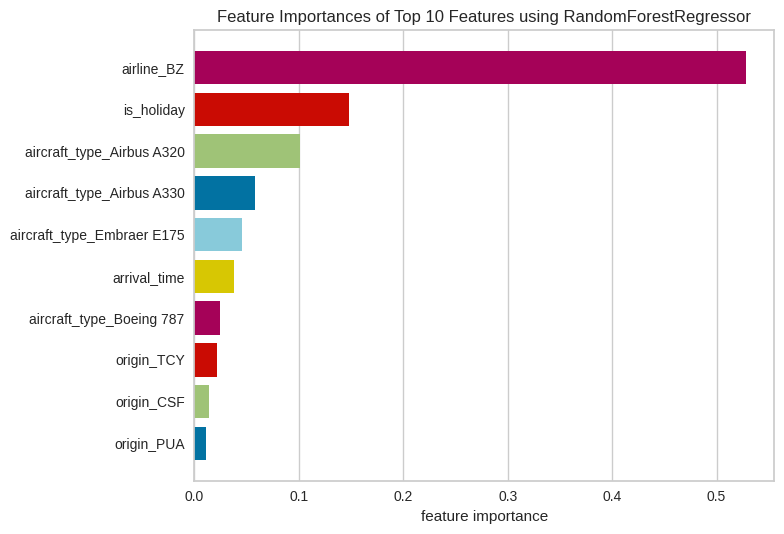

Assim, iremos extrair o código correspondente dessa funcionalidade na documentação e colamos na célula do Google Colab. Atualmente, estamos na página de documentação, selecionaremos o código localizado no centro da página e o colaremos no nosso notebook. A partir daí, examinaremos quais partes fazem sentido manter e quais podemos ajustar conforme necessário.

Na primeira linha, está importando o modelo RandomForestClassifier, não faz sentido termos isso. Na outra linha, ele está importando o código de dados load_occupancy, também não faz sentido termos isso. Na outra, está importando o método FeatureImportances, faz sentido termos isso. Está dividindo os dados load_occupancy em X e Y, já temos o nosso X e Y. Está instanciando o modelo, também não faz sentido termos, porque já temos um modelo instanciado, que é o model_rf.

As três últimas linhas fazem sentido termos, que é viz = FeatureImportances(model), passamos o model_rf. Na outra, está ajustando com X e Y, quero ajustar com x_train e y_train e vis.show().

In [22]:
from yellowbrick.model_selection import FeatureImportances

viz = FeatureImportances(model_rf)
viz.fit(X_train, Y_train)
viz.show()

Executando essa célula com "Ctrl+Enter", temos o seguinte resultado: que a feature mais importante é airline_BZ, seguida por is_holiday.

    Foi exibido um gráfico de barras intitulado "Feature Importances of 30 Features using RandomForestRegressor".

As primeiras features conseguimos até visualizar uma barrinha, mas as últimas features não conseguimos visualizar nada dessas features, provavelmente, praticamente não têm importância para o nosso modelo.

Devemos observar atentamente que está sendo destacada a importância relativa. Daí vem a razão pela qual o airline_BZ está registrado com 100%, indicando total relevância. Não estamos buscando apenas a importância relativa, mas sim a absoluta. Todas as features, inclusive aquelas que talvez não façam sentido para a análise, estão sendo apresentadas. Contudo, surge a dúvida: como podemos imprimir apenas as dez primeiras, por exemplo?

Para isso, vamos colocar relative=False dentro de FeatureImportances(), para que não exiba a importância relativa, e topn=10 para exibir os 10 primeiros.

In [24]:
model_rf.feature_importances_

array([0.32665613, 0.0768538 , 0.02060907, 0.12691037, 0.05308386,
       0.02956096, 0.03475379, 0.33157202])

Se executarmos dessa forma, teremos um array de números:

array([1.31626589e-06, 3.76138301e-02, 1.47833079e-01, 5.9650545e-05, 5.28603645e-01, 1.60841898e-05, 2.48182752e-05, 1.00718794e-01, 5.82214910e-02, 4.69919215e-04, 8.35839732e-05, 2.46628788e-02, 4.56185393e-02, 1.65605360e-04, 1.91475449e-04, 1.39789803e-02, 1.24159939e-05, 6.24380717e-05, 7.07424055e-04, 1.13850156e-02, 2.21200449e-02, 5.97040341e-03, 2.34582771e-04, 8.54699803e-04, 1.13652488e-04, 2.25460487e-05, 4.18885809e-05, 3.28751328e-05, 1.29406516e-04, 5.36014573e-05])

No entanto, dessa forma, não diz muita coisa; por exemplo, não sabemos o que o 1.31 corresponde, a qual coluna, não conseguimos afirmar.

Então, vamos organizar isso.

Organizando o array de números
Para realizar isso, vamos atribuir esse array a uma nova variável que chamaremos de importances. Em seguida, criaremos um data frame utilizando pd.DataFrame() e um par de colchetes e aspas simples dentro do parênteses.

Nesse data frame, teremos duas colunas: a primeira será composta pelas features, ou seja, as colunas de X representadas por X.columns, e a segunda será a coluna de importances, que reflete a importância associada a cada uma dessas features. Portanto, importances será simplesmente o array que obtivemos.

In [25]:
importances = model_rf.feature_importances_
pd.DataFrame({'Feature': X.columns, 'Importances': importances})

,Feature,Importances
0,cement,0.326656
1,slag,0.076854
2,ash,0.020609
3,water,0.126910
4,splast,0.053084
5,coarse,0.029561
6,fine,0.034754
7,age,0.331572


In [23]:
from yellowbrick.model_selection import FeatureImportances

viz = FeatureImportances(model_rf, relative=False, topn=10)
viz.fit(X_train, Y_train)
viz.show()

Dessa forma, conseguimos visualizar quais são as dez features mais importantes e que airline_BZ corresponde a aproximadamente 0,52% de importância e is_holiday por volta de 0,15%. Então, conseguimos verificar essas importâncias dessa forma.

Outra forma, de um jeito mais numérico de visualizar isso, é pegando a propriedade do model_rf, do nosso modelo random forest regressor. Para isso, vamos digitar em uma nova célula model_rf.feature_importances_.

In [26]:
importances = model_rf.feature_importances_

feature_importances = pd.DataFrame({'Features': X.columns, 'Importances': importances})
feature_importances.sort_values('Importances', ascending=False)

,Features,Importances
7,age,0.331572
0,cement,0.326656
3,water,0.126910
1,slag,0.076854
4,splast,0.053084
6,fine,0.034754
5,coarse,0.029561
2,ash,0.020609


A única diferença é que agora estamos organizando esses dados em um data frame, atribuindo-os a essa estrutura tabular para facilitar a manipulação e análise subsequente.

Atribuímos a um data frame que chamaremos de feature_importance. Queremos visualizar esses valores de forma ordenada. Para isso, utilizaremos feature_importance.sort_values(). Quem ordenará os valores? Ordenaremos pela coluna de importances. E queremos os valores de forma decrescente, ou seja, os maiores primeiro. Portanto, usaremos ascending=False.

In [30]:
importances = model_rf.feature_importances_
feature_importances = pd.DataFrame({'Feature': X.columns, 'Importances': importances})
feature_importances.sort_values('Importances', ascending=False)

,Feature,Importances
7,age,0.331572
0,cement,0.326656
3,water,0.126910
1,slag,0.076854
4,splast,0.053084
6,fine,0.034754
5,coarse,0.029561
2,ash,0.020609


Obtemos:

O retorno abaixo foi parcialmente transcrito. Para conferi-lo na íntegra, execute o código na sua máquina.

| *#* | *Feature* | *Importance* |
| ----- | ----------- | -------------- |
| 4 | airline_BZ | 0.528604 |
| 2 | is_holiday | 0.147833 |
| 7 | aircraft_type_Airbus A320 | 0.100719 |
| 8 | aircraft_type_Airbus A330 | 0.058221 |
| 12 | aircraft_type_Embraer E175 | 0.045619 |
| 1 | arrival_time | 0.037614 |
| 11 | aircraft_type_Boeing 78 | 0.024663 |


Dessa maneira, percebemos que, no nosso conjunto de dados, airline_bz corresponde a cerca de 53%, enquanto is_holiday representa aproximadamente 14%.

Mas voltamos à pergunta: será que é possível retreinar o nosso modelo somente com essas features mais importantes, a fim de não ter perda de performance e com o objetivo de reduzir a complexidade do modelo?

Para isso, em uma nova célula de código, colamos um código que já deixei pré-pronto.

In [31]:
results_df = pd.DataFrame(index=['RMSE', 'MAE', 'R2'])

model_selected_features = RandomForestRegressor(random_state=42, max_depth=5)

for count in [1, 5, 10, 15, 20, 25, 30]:
selected_features = feature_importances['Features'].values[:count]

X_train_selected = X_train[selected_features]
X_test_selected = X_test[selected_features]

model_selected_features.fit(X_train_selected, y_train)

y_pred = model_selected_features.predict(X_test_selected)

metricas = calcular_metricas_regressao(y_test, y_pred)

results_df[count] = list(metricas.values())

results_df

Na primeira linha do código, estamos criando um data frame chamado results_df, com os RMSE, MAE e R2, que representam as notas de nossas métricas. Na linha seguinte, estamos instanciando o modelo RandomForestRegressor com os parâmetros random_state=42 e max_depth=5.

Em seguida, iniciamos um laço de repetição for, onde percorremos for count in [1, 5, 10, 15, 20, 30]. Queremos obter a primeira feature mais importante, seguida das 5 features mais importantes, depois as 10 features mais importantes e assim por diante.

Depois, selecionamos essas features de acordo com o data frame criado anteriormente. Na próxima linha, pegamos a primeira feature mais importante, depois as 5 features mais importantes, e selecionamos o nome dessas features. Então, colocamos selected_features = feature_importances['Features'].values[:count].

Na sequência, criamos duas variáveis, X_train_selected e X_test_selected, onde pegamos o x_train e o x_test que dividimos anteriormente, e selecionamos de acordo com essas features que estamos colocando no nosso laço de repetição, de acordo com a linha anterior.

Logo após fazer essa seleção do conjunto de dados com as features mais importantes, estamos ajustando com o x_train_selected e o y_train. O y_train não muda justamente porque é só uma coluna. Depois, realizamos a predição de acordo com o x_test_selected.

Na próxima linha, calculamos as métricas de acordo com o y_pred que calculamos anteriormente, e criamos em results_df novas colunas de acordo com o count. Esse count vai ser uma coluna para uma feature mais importante, 5 features mais importantes, 10 features, que vai ter os valores dessas métricas, correspondentes aos índices que criamos anteriormente.

Portanto, vamos conseguir visualizar as métricas para uma feature mais importante, depois para as 5 features mais importantes, depois para as 10 features mais importantes. Por último, imprimimos esse data frame.

Vamos executar e verificar a saída.

Neste momento, o instrutor obteve um erro e retornou ao código anterior e alterou de "Feature" para "Features".

In [32]:
importances = model_rf.feature_importances_
feature_importances = pd.DataFrame({'Features': X.columns, 'Importances': importances})
feature_importances.sort_values('Importances', ascending=False)

,Features,Importances
7,age,0.331572
0,cement,0.326656
3,water,0.126910
1,slag,0.076854
4,splast,0.053084
6,fine,0.034754
5,coarse,0.029561
2,ash,0.020609


| *#* | *RMSE* | *MAE* | *R2* |
| ----- | -------- | ------- | ------ |
| 1 | 23.0970 | 18.5637 | 0.0109 |
| 5 | 14.9389 | 12.0211 | 0.5862 |
| 10 | 14.3002 | 11.4904 | 0.6208 |
| 15 | 13.7406 | 11.0253 | 0.6499 |
| 20 | 13.7387 | 11.0242 | 0.6500 |
| 25 | 13.7284 | 11.0127 | 0.6506 |
| 30 | 13.7301 | 11.0138 | 0.6505 |

Observamos que há uma variação significativa nas métricas entre 10 e 15 features, ou seja, no intervalo de 1 a 10 features. No entanto, a partir de 15 features, os valores praticamente se estabilizam. Portanto, se já possuo 15 features consideradas mais importantes no conjunto de dados e adiciono mais 15 features, os valores praticamente não sofrem alterações.

Então, talvez seja interessante verificar entre esses dois extremos, entre 10 e 15, onde esse valor para de ter variações, para então selecionar essas features mais importantes. Para isso, vamos copiar o código que acabamos de fazer, e colamos em uma célula abaixo.

Na linha da lista de [1, 5, 10, 15] colocamos um range de 10 até 15. Então, inserimos 16, porque o 16 não é incluso, o último valor não é incluso.

In [ ]:
results_df = pd.DataFrame(index=['RMSE', 'MAE', 'R2'])

model_selected_features = RandomForestRegressor(random_state=42, max_depth=5)

for count in range(10, 16):
    selected_features = feature_importances['Features'].values[:count]

    X_train_selected = X_train[selected_features]
    X_test_selected = X_test[selected_features]

    model_selected_features.fit(X_train_selected, y_train)

    y_pred = model_selected_features.predict(X_test_selected)

    metricas = calcular_metricas_regressao(y_test, y_pred)

    results_df[count] = list(metricas.values())

results_df

,10,11,12,13,14,15
RMSE,14.3002,14.3002,14.3939,13.7410,13.7410,13.7406
MAE,11.4904,11.4904,11.4096,11.0256,11.0254,11.0253
R2,0.6208,0.6208,0.6159,0.6499,0.6499,0.6499


Notamos que o valor do R2 para nós é por volta dos 13. De 12 para 13 features, há um certo acréscimo interessante ali no nosso R2, por volta de 0,04, ou seja, um acréscimo de 4%, mas a partir disso, por exemplo, o R2 não se altera.

A mesma análise vale para as outras métricas. O RMSE estabiliza em 13,74 e o MAE estabiliza em 11,02. Vamos trabalhar somente com as 13 features mais importantes desse conjunto de dados.

Iremos selecionar essas features. Para isso, vamos copiar este código de selected_features = feature_importances['Features'].values[:count]. No entanto, não queremos até count, desejamos até 13. Agora, temos que selecionar o nosso X somente com essas features, porque vamos querer dividir o X em X_train e y_train, para então retreinar o nosso modelo. Então, X_select_features = X[select_features], selecionando as features mais importantes.

In [ ]:
selected_features = feature_importances['Features'].values[:13]

X_select_features = X[selected_features]

Executamos a célula. Podemos verificar qual é esse resultado copiando X_select_features, colando em uma nova célula e executando.

Percebemos que tem somente as nossas 13 features mais importantes na tabela gerada. E agora, temos que redividir em X_train e Y_train. Portanto, X_train, X_test, y_train, y_test = train_test_split(X_select_features, y, random_state=42).

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_select_features, y, random_state=42)

Pronto, realizamos essa divisão.

Dessa forma, conseguimos diminuir a complexidade dos nossos dados para ser inserido em um modelo de machine learning. Assim, reduzimos a complexidade desse modelo. Com isso vai ajudar, inclusive, o desempenho do modelo.

Vai ser mais rápido de treinar, justamente porque tem menos dados. No entanto, ainda não melhoramos a performance desse modelo. Apenas selecionamos as features mais importantes.

Vamos analisar como podemos melhorar a performance desse modelo no próximo vídeo!

# **<font color=green>Aula 04 -  Otimizando os hiperparâmetros com o GridSearchCV</font>**

Selecionamos as melhores features para inserir no modelo de Machine Learning. No entanto, surge uma dúvida: será que o modelo que temos é o melhor possível?

Uma das etapas cruciais para o desenvolvimento de um modelo de Machine Learning é o seu aprimoramento, melhorando o desempenho através dos hiperparâmetros, que são os parâmetros que alteramos para modificar a qualidade dos resultados. Então, como podemos melhorar nosso modelo?


Com o Colab já aberto, em uma célula de Markdown, com o escrito "Otimizando e Preparando com GridSearch"; e uma célula de código com uma variável, que é um dicionário também já preparado, onde temos alguns valores nesse dicionário: max_depth, que é uma lista contendo 5, 10, 15; min_samples_leaf, que é uma lista contendo 1, 2, 3; min_samples_split, que é uma lista contendo 2, 4 e 6; e n_estimators também, que é uma lista contendo 100, 150 e 200.

In [33]:
param_grid = {
      'max_depth': [5, 10, 15],
      'min_samples_leaf': [1, 2, 3],
      'min_samples_split': [2, 4, 6],
      'n_estimators': [100, 150, 200]
 }

Esses são os parâmetros que nosso Random Forest possui. Como encontramos esses valores? Podemos consultar a Documentação do Random Forest Regressor .

Abrindo a aba da documentação, percebemos que há vários outros hiperparâmetros que podemos explorar e testar, como criterion, n_jobs e muitos outros. Mas por que estamos definindo isso? Porque essa será a grade onde faremos as combinações dos nossos parâmetros.

Por exemplo, na primeira execução será max_depth igual a 5, min_samples_leaf igual a 1, min_samples_split igual a 2, n_estimators igual a 100. Para a segunda execução, serão os mesmos parâmetros para max_depth, min_samples_leaf e min_samples_split, mas n_estimators igual a 150. Vamos fazer essa combinação.

Executamos essa célula com "Shift + Enter".

Precisamos encontrar uma forma de fazer essa combinação, porque fazê-la manualmente, por exemplo, através de vários laços for, não seria prático. Para isso, o scikit-learn nos fornece um método bem interessante, que é o GridSearchCV.

**Documentação GridSearchCV**

Consultando a documentação, ele mostra os parâmetros desse GridSearchCV e vamos fazer a importação. Como importamos? Copiamos o título da página (sklearn.model_selection.GridSearchCV), colamos no Colab e digitamos: from sklearn.model_selection import GridSearchCV.

In [34]:
from sklearn.model_selection import GridSearchCV

Executamos a célula e o método está importado.

E agora, como utilizamos esse método? Copiamos também a declaração dessa classe da própria documentação que está abaixo do título que copiamos.

In [35]:
cv = KFold(n_splits=5, shuffle=True, random_state=42)

model_grid = GridSearchCV(RandomForestRegressor(random_state=42), param_grid=param_grid,
             scoring='r2', cv=cv)

model_grid.fit(X_train, y_train)

GridSearchCV(cv=KFold(n_splits=5, random_state=42, shuffle=True),
             estimator=RandomForestRegressor(random_state=42),
             param_grid={'max_depth': [5, 10, 15],
                         'min_samples_leaf': [1, 2, 3],
                         'min_samples_split': [2, 4, 6],
                         'n_estimators': [100, 150, 200]},
             scoring='r2')

Vamos apenas atribuir os valores dos parâmetros. Então, o que temos aqui? Nosso estimator é o modelo que estamos usando, o RandomForestRegressor.

Abrimos e fechamos parênteses e definimos nosso random_state para garantir resultados reprodutíveis. O param_grid é a grade onde faremos essa busca, que já definimos anteriormente. Vamos apenas copiar o nome de lá e colar. O que esse método faz? Combinamos todos esses valores definidos na nossa grade. Apagamos o astersco.

A seguir, abordamos o parâmetro scoring. Qual método queremos maximizar? Preferimos maximizar o R2, então usamos "R2". Podemos remover o n_jobs=None. O refit serve para reajustar nosso modelo com o conjunto de dados inteiro após encontrar os melhores hiperparâmetros. Após isso, ele reajusta o conjunto de dados, isso porque usamos o cv.

In [37]:
GridSearchCV(RandomForestRegressor(random_state=42), param_grid=param_grid, scoring='r2', cv=None, verbose=0, pre_dispatch='2*n_jobs', error_score=nan, return_train_score=False)

O parâmetro cv é a nossa validação cruzada. Vamos utilizar o que já usamos anteriormente, que é o KFold. Então cv igual a KFold(n_splits=5, shuffle=True, random_state=42) . E vamos colocar =cv no nosso GridSearchCV e remover o resto.

Atrubuímos isso a uma variável, um novo modelo que vamos chamar de model_grid. Por que novo modelo? Porque vamos retreinar. e devolverá o melhor modelo. Agora temos que treinar de fato: model_grid.fit(X_train, Y_train).

In [38]:
model_grid.best_params_

{'max_depth': 15,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 200}

{'max_depth': 10,
 'min_samples_leaf': 3,
 'min_samples_split': 2,
 'n_estimators': 200}

O desempenho máximo foi alcançado com max_depth igual a 10, min_samples_split igual a 3, min_samples_leaf igual a 2, e n_estimators igual a 200.

No entanto, ainda não conhecemos o valor específico desse desempenho. Portanto, calcularemos agora as métricas para esse modelo, que identificamos como o melhor.

Para isso, vamos até mesmo copiar o código que fizemos anteriormente, quando estávamos selecionando as features.

In [41]:
metricas = calcular_metricas_regressao(y_test, y_pred)

Agora, substituímos e colocamos metricas_model_grid igual a calcular_metricas_regressao(y_test, y_pred). No entanto, ainda não temos o y_pred do nosso modelo. Portanto, digitamos acima na célula y_pred_model_grid será igual a model_grid.predict(X_test).

Agora, temos nosso y_pred_model_grid. Verificamos essas métricas no final, colocando metricas_model_grid na última linha. Definimos o Y_pred_model_grid fazendo a predição através do model_grid, calculamos as métricas com a função que definimos anteriormente, e metricas_model_grid para visualizar essas métricas.

In [42]:
y_pred_model_grid = model_grid.predict(X_test)

metricas_model_grid = calcular_metricas_regressao(y_test, y_pred_model_grid)
metricas_model_grid

Obtemos como retorno:

{'Raiz do Erro Quadrático Médio': 13.2635,
'Erro Absoluto Médio': 10.6731,
'R2 Score': 0.6738}

Obtivemos um valor de 13 para a raiz do erro quadrático médio (RMSE), um erro absoluto médio (MAE) de 10,67 e um R2 score de 0,6732. Será que esses valores, comparados aos obtidos anteriormente, estão melhores ou piores?

Vamos verificar.

Para isso, copiamos também esse último código da seleção de features e colamos na célula embaixo.

In [43]:
results_df[count] = list(metricas.values())

Então results[model_grid], sendo model_grid o novo nome das colunas. E as métricas que desejamos listar será metricas_model_grid. Imprimimos novamente o results embaixo.

In [44]:
results_df['model_grid'] = list(metricas_model_grid.values())
results_df

| *#* | *RMSE* | *MAE* | *R2* |
| ----- | -------- | ------- | ------ |
| 10 | 14.3002 | 11.4904 | 0.6208 |
| 11 | 14.3002 | 11.4904 | 0.6208 |
| 12 | 14.3939 | 11.4096 | 0.6159 |
| 13 | 13.7410 | 11.0256 | 0.6499 |
| 14 | 13.7410 | 11.0254 | 0.6499 |
| 15 | 13.2635 | 10.6731 | 0.6738

Obtivemos um modelo melhor do que os que tínhamos anteriormente, que era o nosso objetivo. Por exemplo, com 12 features, nosso RMSE era de 13,74. Conseguimos um RMSE de 13,26. O MAE era 11,02. Conseguimos um MAE de 10,67. E o R2, que foi a métrica que otimizamos no nosso GridSearchCV, era de 0,65 aproximadamente, e agora está 0,6732.

De fato conseguimos um modelo melhor do que os anteriores, dado aquelas combinações na grade que foram definidas.

## Próximos Passos

Agora precisamos disponibilizar esse modelo para ser utilizado nas outras etapas do processo de otimização. Essa será nossa próxima tarefa: deixar esse modelo disponível.

Lembrando que isso já é com as nossas melhores features selecionadas. Executando com "Shift + Enter", aguardamos o processo ser executado.

Concluímos a execução do nosso GridSearchCV, que levou cerca de 14 minutos. Agora, vamos visualizar os parâmetros que proporcionaram o melhor resultado, utilizando model_grid.best_params_ em uma nova célula.

In [ ]:
results_df['model_grid'] = list(metricas_model_grid.values())
results_df

,10,11,12,13,14,15,model_grid
RMSE,14.3002,14.3002,14.3939,13.7410,13.7410,13.7406,13.2635
MAE,11.4904,11.4904,11.4096,11.0256,11.0254,11.0253,10.6731
R2,0.6208,0.6208,0.6159,0.6499,0.6499,0.6499,0.6738


## Quantidade de combinações

Ao usar o GridSearchCV para otimizar hiperparâmetros, é fundamental entender quantas vezes o algoritmo é treinado e testado para determinar a complexidade computacional e o tempo necessário para a busca de hiperparâmetros. No código abaixo, analise quantas vezes o algoritmo é treinado e avaliado:

In [46]:
from sklearn.model_selection import GridSearchCV

param_grid = {
 'max_depth': [5, 10, 15],
 'min_samples_leaf': [1, 2, 3],
 'min_samples_split': [2, 4, 6],
 'n_estimators': [100, 150, 200]
 }

model_grid = GridSearchCV(RandomForestRegressor(random_state=42), param_grid=param_grid, cv=3, scoring='r2')
model_grid.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=RandomForestRegressor(random_state=42),
             param_grid={'max_depth': [5, 10, 15],
                         'min_samples_leaf': [1, 2, 3],
                         'min_samples_split': [2, 4, 6],
                         'n_estimators': [100, 150, 200]},
             scoring='r2')

243


Para calcular quantas vezes o algoritmo é treinado e testado, multiplicamos o número de combinações únicas de hiperparâmetros pelo número de folds na validação cruzada. Existem 3 opções para 'max_depth', 3 para 'min_samples_leaf', 3 para 'min_samples_split' e 3 para 'n_estimators'. Portanto, o número total de combinações únicas de hiperparâmetros é 3 * 3 * 3 * 3 = 81. Como estamos usando validação cruzada de 3 folds, cada conjunto de hiperparâmetros será treinado e testado 3 vezes. Portanto, o algoritmo será treinado e testado 81 * 3 = 243 vezes no tota

# Para saber mais: hiperâmetros do RandomForestRegresso

O RandomForestRegressor é um modelo de conjunto que combina várias árvores de decisão para fazer previsões mais robustas e precisas por meio da técnica de Bagging. Para conferir mais detalhes sobre essa técnica, acesse o artigo "Machine Learning: conhecendo as técnicas de bagging e boosting".

Os hiperparâmetros são configurações que você pode ajustar para controlar o comportamento do RandomForestRegressor. Abaixo está uma lista dos principais hiperparâmetros:

1 - n_estimators:

 - Este hiperparâmetro especifica o número de árvores de decisão que serão criadas na floresta aleatória. Quanto maior o número de estimadores, maior será a capacidade do modelo de se ajustar aos dados. No entanto, um número muito alto pode levar a um aumento no tempo de treinamento.

2 - criterion:

 - O hiperparâmetro criterion determina a função de medição da qualidade de uma divisão durante a construção das árvores. Para regressão, o valor padrão é "mse" (Erro Quadrático Médio), que calcula a média dos quadrados dos erros. Outra opção é "mae" (Erro Absoluto Médio), que usa a média dos valores absolutos dos erros.

3 - max_depth:

 - Este hiperparâmetro controla a profundidade máxima das árvores de decisão na floresta. Limitar a profundidade pode ajudar a evitar overfitting, pois impede que as árvores se ajustem muito aos dados de treino e não consigam fazer boas previsões para novos dados.

4 - min_samples_split:

 - O min_samples_split determina o número mínimo de amostras necessárias para dividir um nó interno da árvore. Isso ajuda a controlar o crescimento das árvores e evita divisões que levam a nós com poucas amostras.

5 - min_samples_leaf:

 - Este hiperparâmetro define o número mínimo de amostras exigidas em uma folha (nó terminal) da árvore. Isso ajuda a controlar a granularidade da árvore e pode impedir que folhas contenham muito poucas amostras.

6 - max_features:

 - max_features especifica o número máximo de características a serem consideradas ao procurar a melhor divisão em cada nó. Valores comuns incluem "auto" (sqrt(n_features)), "sqrt" (também sqrt(n_features)), "log2" (log2(n_features)), ou um número inteiro que representa a quantidade exata de características a serem consideradas.

7 - random_state:

 - Este hiperparâmetro define uma semente para o gerador de números aleatórios usado para criar a floresta aleatória. Definir um valor fixo para random_state garante que o modelo seja reproduzível.

8 - n_jobs:

 - n_jobs especifica o número de núcleos de CPU a serem usados para treinamento em paralelo. Se definido como -1, todos os núcleos disponíveis serão usados.

Estes são alguns dos principais hiperparâmetros do RandomForestRegressor no scikit-learn. A escolha adequada desses hiperparâmetros pode afetar significativamente o desempenho e a capacidade de generalização do modelo para tarefas de regressão. Para conferir os outros hiperparâmetros faltantes, você pode consultar a [documentação oficial do scikit-learn](https//).

# Salvando o modelo

Já realizamos todos os procedimentos necessários para construir e otimizar o nosso modelo de machine learning capaz de prever atraso de voo. Mas falta uma etapa crucial, que é justamente disponibilizar esse modelo para uso posterior. Afinal, não é muito prático. Toda vez que desejarmos utilizar esse modelo, executamos todos esses passos que definimos no notebook.

Como salvar e disponibilizar o modelo
Como podemos salvar e disponibilizar esse modelo? No Google Colab, já deixei uma célula de código pronta para ser digitada. Nela, iremos importar a biblioteca pickle para fazer tal procedimento. Digitamos import pickle.

## **import pickle**

In [47]:
  import pickle

Executamos a célula com "Shift + Enter".

E agora temos que, de fato, salvar. Para salvar, vamos abrir um arquivo no formato de escrita binária e escrever o melhor modelo, no caso, encontrado dentro desse arquivo. Abrimos uma célula com with open().

In [50]:
with open()

Digitamos dentro dos parênteses o nome do modelo e a sua localização. Ele vai estar solto na nossa pasta de arquivos. Então, modelo_producao.pkl, que é o formato pickle, vírgula. Qual o formato que desejamos abrir esse arquivo? Desejamos abrir no formato de escrita binária. Então, wb entre aspas simples. Fora do parênteses digitamos as file, que vai ser o nome que vamos dar para esse nosso arquivo

In [49]:
try:
  with open('model_producao.pkl', 'wb') as file:
    pickle.dump(model_grid.best_estimator_, file)
  print('Modelo salvo com sucesso!!!')
except Exception as e:
  print('Ocorreu um erro ao salvar o modelo: ', str(e))

Modelo salvo com sucesso!!!


In [51]:
with open('model_producao.pkl', 'wb') as file:

Na linha seguinte, digitamos pickle.dump() para escrever. Qual o modelo que desejamos escrever? Queremos escrever o model_grid.best_estimator_. Por qual motivo não estamos escrevendo o model_grid, de fato? Porque o model_grid contém outras informações que não são interessantes para nós.

Ele retorna, por exemplo, um dicionário contendo todas as informações de cada uma das dobras, como o tempo de treinamento, o score da dobra 1, 2, e assim sucessivamente. E tem informações que não são relevantes, só queremos utilizar esse modelo. Então pegamos somente o melhor modelo, que é justamente o best_estimator_, vírgula, e onde iremos salvar? Em file.

In [ ]:
with open('model_producao.pkl', 'wb') as file:
    pickle.dump(model_grid.best_estimator_, file)

Para ter certeza que dará certo ao executarmos essa célula, faremos uma etapa de segurança. Vamos tentar salvar. Do contrário, se lançar uma exceção, ele não vai. Vamos fazer essa tratativa de erro. E como fazemos essa tratativa de erro?

No Python, try, except. Então, try:, tenta fazer isso que definimos, abrir e escrever o nosso modelo. Caso funcione, colocamos um print('') abaixo do pickle.dump() e escrevemos "Modelo salvo com sucesso". Do contrário, ele vai lançar uma exceção. Então, except Exception as e:, na linha seguinte print('') e passamos "Ocorreu um erro ao salvar o modelo:", e imprimimos o erro str(e) para transformar em string.

In [52]:
try:
    with open('model_producao.pkl', 'wb') as file:
        pickle.dump(model_grid.best_estimator_, file)
    print('Modelo salvo com sucesso!!!')
except Exception as e:
    print ('Ocorreu um erro ao salvar o modelo: ', str(e))

Modelo salvo com sucesso!!!


Vamos executar.

Obtemos, "Modelo salvo com sucesso". Se formos ao quarto ícone à esquerda, onde tem um símbolo de uma pasta, e clicar nele, teremos o nosso modelo modelo_producao.pkl. Nosso modelo foi salvo com sucesso no ambiente do Google Colab.

## Conclusão

Concluímos então o modelo capaz de antecipar os atrasos nos voos. E essa informação pode ser integrada com outros processos aeroportuários, visando a otimização da operação desse aeroporto, contribuindo para uma redução tanto em tempo quanto em custo.



# Mãos na massa: utilizando o modelo salvo

Concluímos o processo de desenvolvimento, otimização e salvamento do modelo. No entanto, surge a questão de como utilizar efetivamente esse modelo em situações práticas. Como podemos aproveitar o modelo que foi salvo para realizar previsões atualizadas?

Diante disso, construa um código que carregue o modelo salvo e realize a previsão para a seguinte amostra:

In [53]:
nova_amostra = [0.0, 10.8941, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0]

Onde os valores são correspondentes a:

In [55]:
schengen: 0
arrival_time: 10.8941
is_holiday: 0
is_weekend: 0
airline_BZ: 0
airline_MM: 0
airline_YE: 1
aircraft_type_Airbus A320: 1
aircraft_type_Airbus A330: 0
aircraft_type_Boeing 737: 0
aircraft_type_Boeing 777: 0
aircraft_type_Boeing 787: 0
aircraft_type_Embraer E175: 0

## **Opinião do instrutor**

Resposta:

Para realizar o carregamento e conseguir prever uma nova amostra vamos adotar os passos abaixo:

1 - Certifique-se de ter o arquivo do modelo salvo em um local acessível. Por exemplo, o caminho do arquivo pode ser ./modelo_producao.pkl.

2 - Importe a biblioteca pickle no seu código:

In [56]:
import pickle

3 - Carregue o modelo salvo utilizando a função pickle.load():

In [57]:
file_path = './modelos/modelo_producao.pkl'

try:
    with open(file_path, 'rb') as file:
        model = pickle.load(file)
    print("Modelo carregado com sucesso!")
except Exception as e:
    print("Ocorreu um erro ao carregar o modelo:", str(e))

Ocorreu um erro ao carregar o modelo: [Errno 2] No such file or directory: './modelos/modelo_producao.pkl'


O parâmetro 'rb' no método open() do Python significa "read binary" (ler binário). Após isso o modelo está carregado e salvo na variável model.

4 - Agora você pode usar o modelo carregado para fazer previsões nos novos dados. Certifique-se de que os dados de entrada estejam no formato esperado pelo modelo.

In [ ]:
# Exemplo de previsão com dados de entrada 'X'
model.predict([nova_amostra])[0]

Dessa forma, conseguimos utilizar o modelo salvo previamente para fazer previsões em novos dados.

# **Faça como eu fiz**

Nesta aula, nosso foco foi a otimização de hiperparâmetros do modelo RandomForestRegressor. Passamos pela seleção de features, na qual escolhemos as 13 features mais importantes do conjunto de dados e retreinamos o modelo sem perda de desempenho. Logo após, realizamos a otimização de hiperparâmetros utilizando a técnica GridSearchCV e, por fim, salvamos o modelo otimizado para uso futuro.

Agora, é a hora de você seguir as etapas que foram feitas durante a aula.

Se surgir algo que você ficou em dúvida, verifique o andamento do seu projeto ao clicar na alternativa Feedback do instrutor que está na sequência.

# **Opinião do instrutor**

1 - Seleção de recursos

Vamos imprimir quais são as features mais importantes do conjunto de dados para o modelo RandomForestRegressor.

In [ ]:
from yellowbrick.model_selection import FeatureImportances

viz = FeatureImportances(model_rf, relative=False)
viz.fit(X_train, y_train)
viz.show()

E vamos obter um DataFrame com as impotâncias das features no conjunto de dados.

In [ ]:
importances = model_rf.feature_importances_

feature_importances = pd.DataFrame({'Features': X.columns, 'Importances': importances})
feature_importances.sort_values('Importances', ascending=False)

Nosso próximo passo é realizar o treinamento e avaliação do RandomForestRegressor com as 10 a 15 features mais importantes:

In [ ]:
results_df = pd.DataFrame(index=['RMSE', 'MAE', 'R2'])

model_selected_features = RandomForestRegressor(random_state=42, max_depth=5)

for count in range(10, 16):
    selected_features = feature_importances['Features'].values[:count]

    X_train_selected = X_train[selected_features]
    X_test_selected = X_test[selected_features]

    model_selected_features.fit(X_train_selected, y_train)

    y_pred = model_selected_features.predict(X_test_selected)

    metricas = calcular_metricas_regressao(y_test, y_pred)

    results_df[count] = list(metricas.values())

results_df

E então vamos separar novamente em treino e teste com as 13 features mais importantes do conjunto de dados:

In [ ]:
selected_features = feature_importances['Features'].values[:13]
X_select_features = X[selected_features]
X_train, X_test, y_train, y_test = train_test_split(X_select_features, y, random_state=42)

2 - Otimizando os hiperparâmetros com o GridSearchCV

Para realizar a otimização de hiperparâmetros precisamos definir o espaço de busca que será utilizado pelo GridSearchCV.

In [ ]:
param_grid = {
      'max_depth': [5, 10, 15],
      'min_samples_leaf': [1, 2, 3],
      'min_samples_split': [2, 4, 6],
      'n_estimators': [100, 150, 200]
 }

E então realizamos a busca dos melhores hiperparâmetros.

In [ ]:
from sklearn.model_selection import GridSearchCV

cv = KFold(n_splits=5, shuffle=True, random_state=42)

model_grid = GridSearchCV(RandomForestRegressor(random_state=42), param_grid=param_grid,
             scoring='r2', cv=cv)

model_grid.fit(X_train, y_train)

Chegou o momento de avaliar o modelo otimizado utilizando a função para calcular as métricas.

In [ ]:
y_pred_model_grid = model_grid.predict(X_test)
metricas_model_grid = calcular_metricas_regressao(y_test, y_pred_model_grid)
metricas_model_grid

3 - Salvando o modelo

In [ ]:
  import pickle

try:
  with open('model_producao.pkl', 'wb') as file:
    pickle.dump(model_grid.best_estimator_, file)
  print('Modelo salvo com sucesso!!!')
except Exception as e:
  print('Ocorreu um erro ao salvar o modelo: ', str(e))

## **O que aprendemos?**

Nessa aula, você aprendeu a:

 - Selecionar as features mais importantes para o modelo;

 - Retreinar o modelo com as features mais importantes sem a perda de performance;

 - Realizar a otimização de hiperparâmetros do modelo utilizando GridSearchCV;

 - Salvar o modelo construído.

# **Referências**

 - [Mãos à obra aprendizado de máquina com Scikit-Learn, Keras e TensorFlow: conceitos, ferramentas e técnicas para a construção de sistemas inteligentes](https://).

 - James, G., Witten, D., Hastie, T., & Tibshirani, R. (2013). An introduction to statistical learning: with applications in R. New York: Springer.